In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('seaborn-v0_8-colorblind')

from src.utils.ds_formatter import format_all
from src.dataset import *

OLD_F_METADATA = "./data/HT_Sensor_metadata.dat"
F_METADATA = "./data/HT_Sensor_metadata_new.dat"
OLD_F_DATASET = "./data/HT_Sensor_dataset.dat"
F_DATASET = "./data/HT_Sensor_dataset_new.dat"

## Analisis de metadatos

Text(0, 0.5, '')

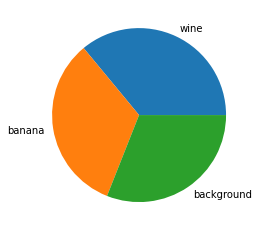

In [2]:
metadata = pd.read_csv(F_METADATA, sep=",")
ax = metadata["class"].value_counts().plot(kind="pie")
ax.set_ylabel('')

In [3]:
md_mean = metadata['dt'].mean()
md_std = metadata['dt'].std()
print(f'ventana dt:\n\tMedia: {md_mean}\n\tDesv.Std.: {md_std}')

ventana dt:
	Media: 0.7515999999999998
	Desv.Std.: 0.4284237494477972


## Analisis de Dataset definitivo

In [4]:
# Indicar en la flag si se recalcula o se usa el fichero ya hecho
df = get_dataset(build_dataset=False, time_window=5)
df.head()

R1  R1_mean  R1_median   R1_dev       R2  R2_mean  R2_median   R2_dev  \
0  12.8102  10.3665    10.4529  11.6742  13.4941  13.2749    8.30531  9.04553   
1  12.8097  10.3655    10.4523  11.6734  13.4934  13.2740    8.30527  9.04545   
2  12.8088  10.3645    10.4516  11.6731  13.4930  13.2730    8.30523  9.04538   
3  12.8080  10.3638    10.4508  11.6727  13.4922  13.2719    8.30520  9.04516   
4  12.8078  10.3628    10.4503  11.6722  13.4914  13.2708    8.30517  9.04511   

        R3  R3_mean   ...      R8_dev     Temp.  Temp._mean  Temp._median  \
0  26.4234  59.4725   ...    9.055249  9.055620    0.005040     26.455933   
1  26.4241  59.4745   ...    9.055189  9.055575    0.005092     26.455474   
2  26.4246  59.4763   ...    9.055130  9.055535    0.005143     26.455001   
3  26.4251  59.4779   ...    9.055071  9.055490    0.005194     26.454513   
4  26.4256  59.4793   ...    9.055012  9.055460    0.005246     26.454013   

   Temp._dev  Humidity   Hum_mean  Hum_median   Hum_dev   class  
0   26.46000  0.053836  58.967841    58.95435  0.253568  banana  
1   26.45905  0.053763  58.969056    58.95435  0.255458  banana  
2   26.45860  0.053666  58.970404    58.95435  0.257481  banana  
3   26.45820  0.053545  58.971872    58.95435  0.259607  banana  
4   26.45740  0.053402  58.973448    58.95435  0.261813  banana  

[5 rows x 41 columns]

In [5]:
df.shape

(253699, 41)

Text(0, 0.5, '')

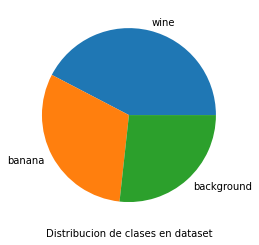

In [6]:
ax = df["class"].value_counts().plot(kind="pie")
ax.set_xlabel('Distribucion de clases en dataset')
ax.set_ylabel('')

['_mean', '_median', '_dev']
['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']


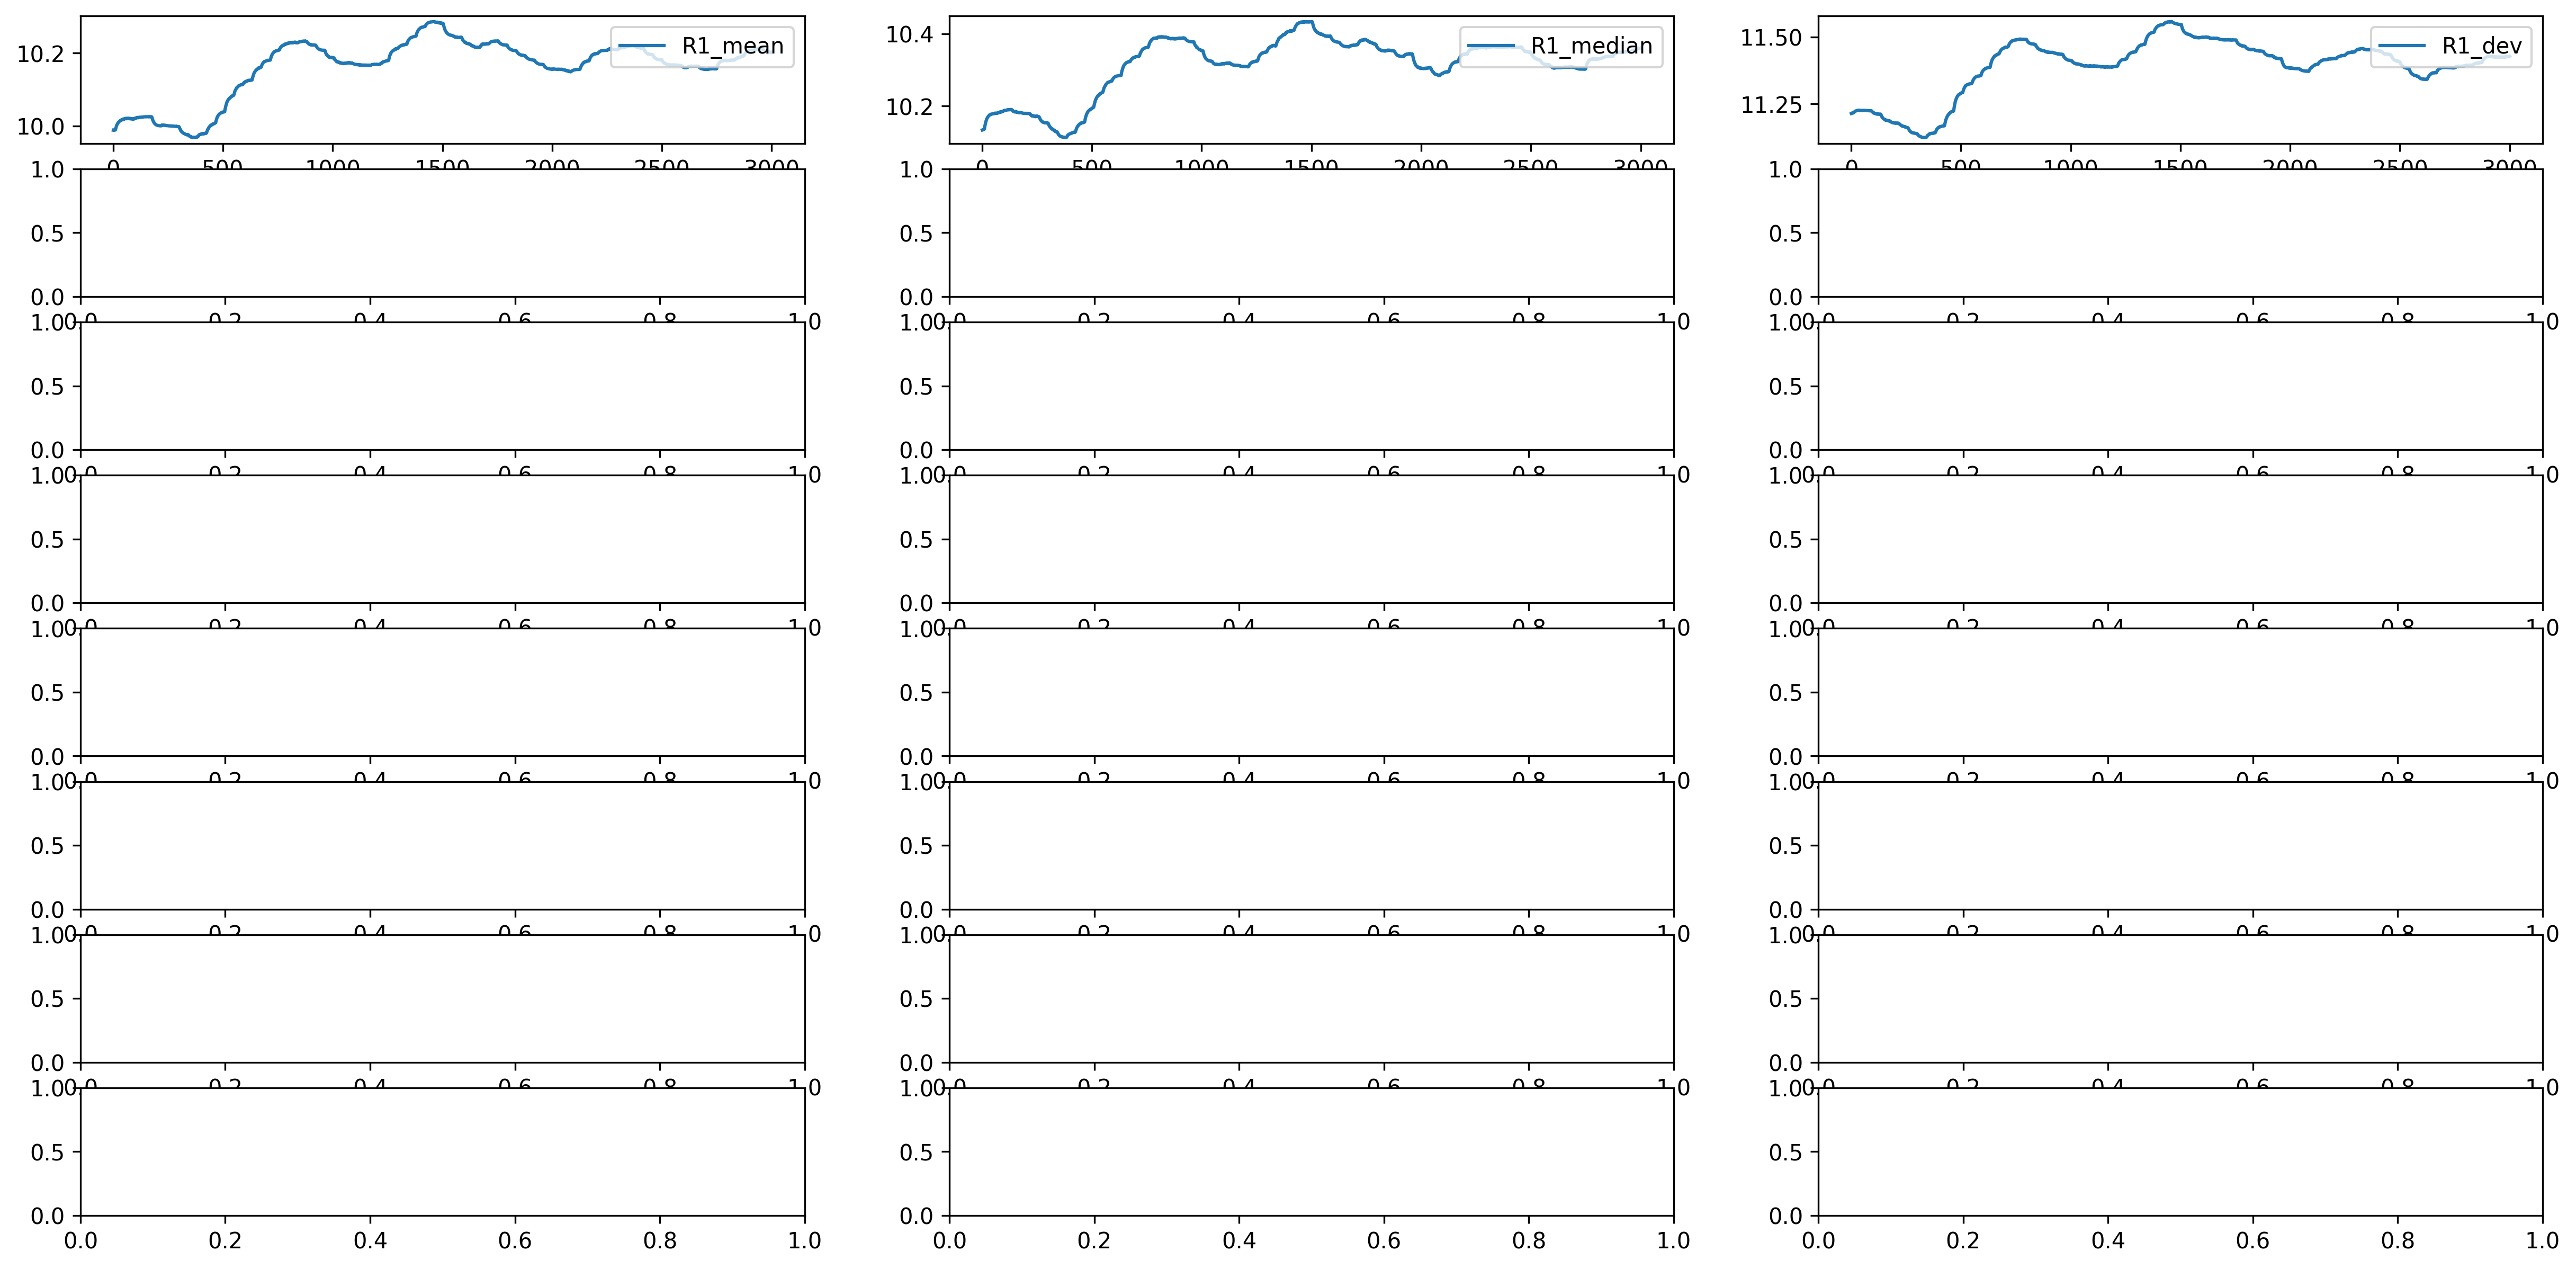

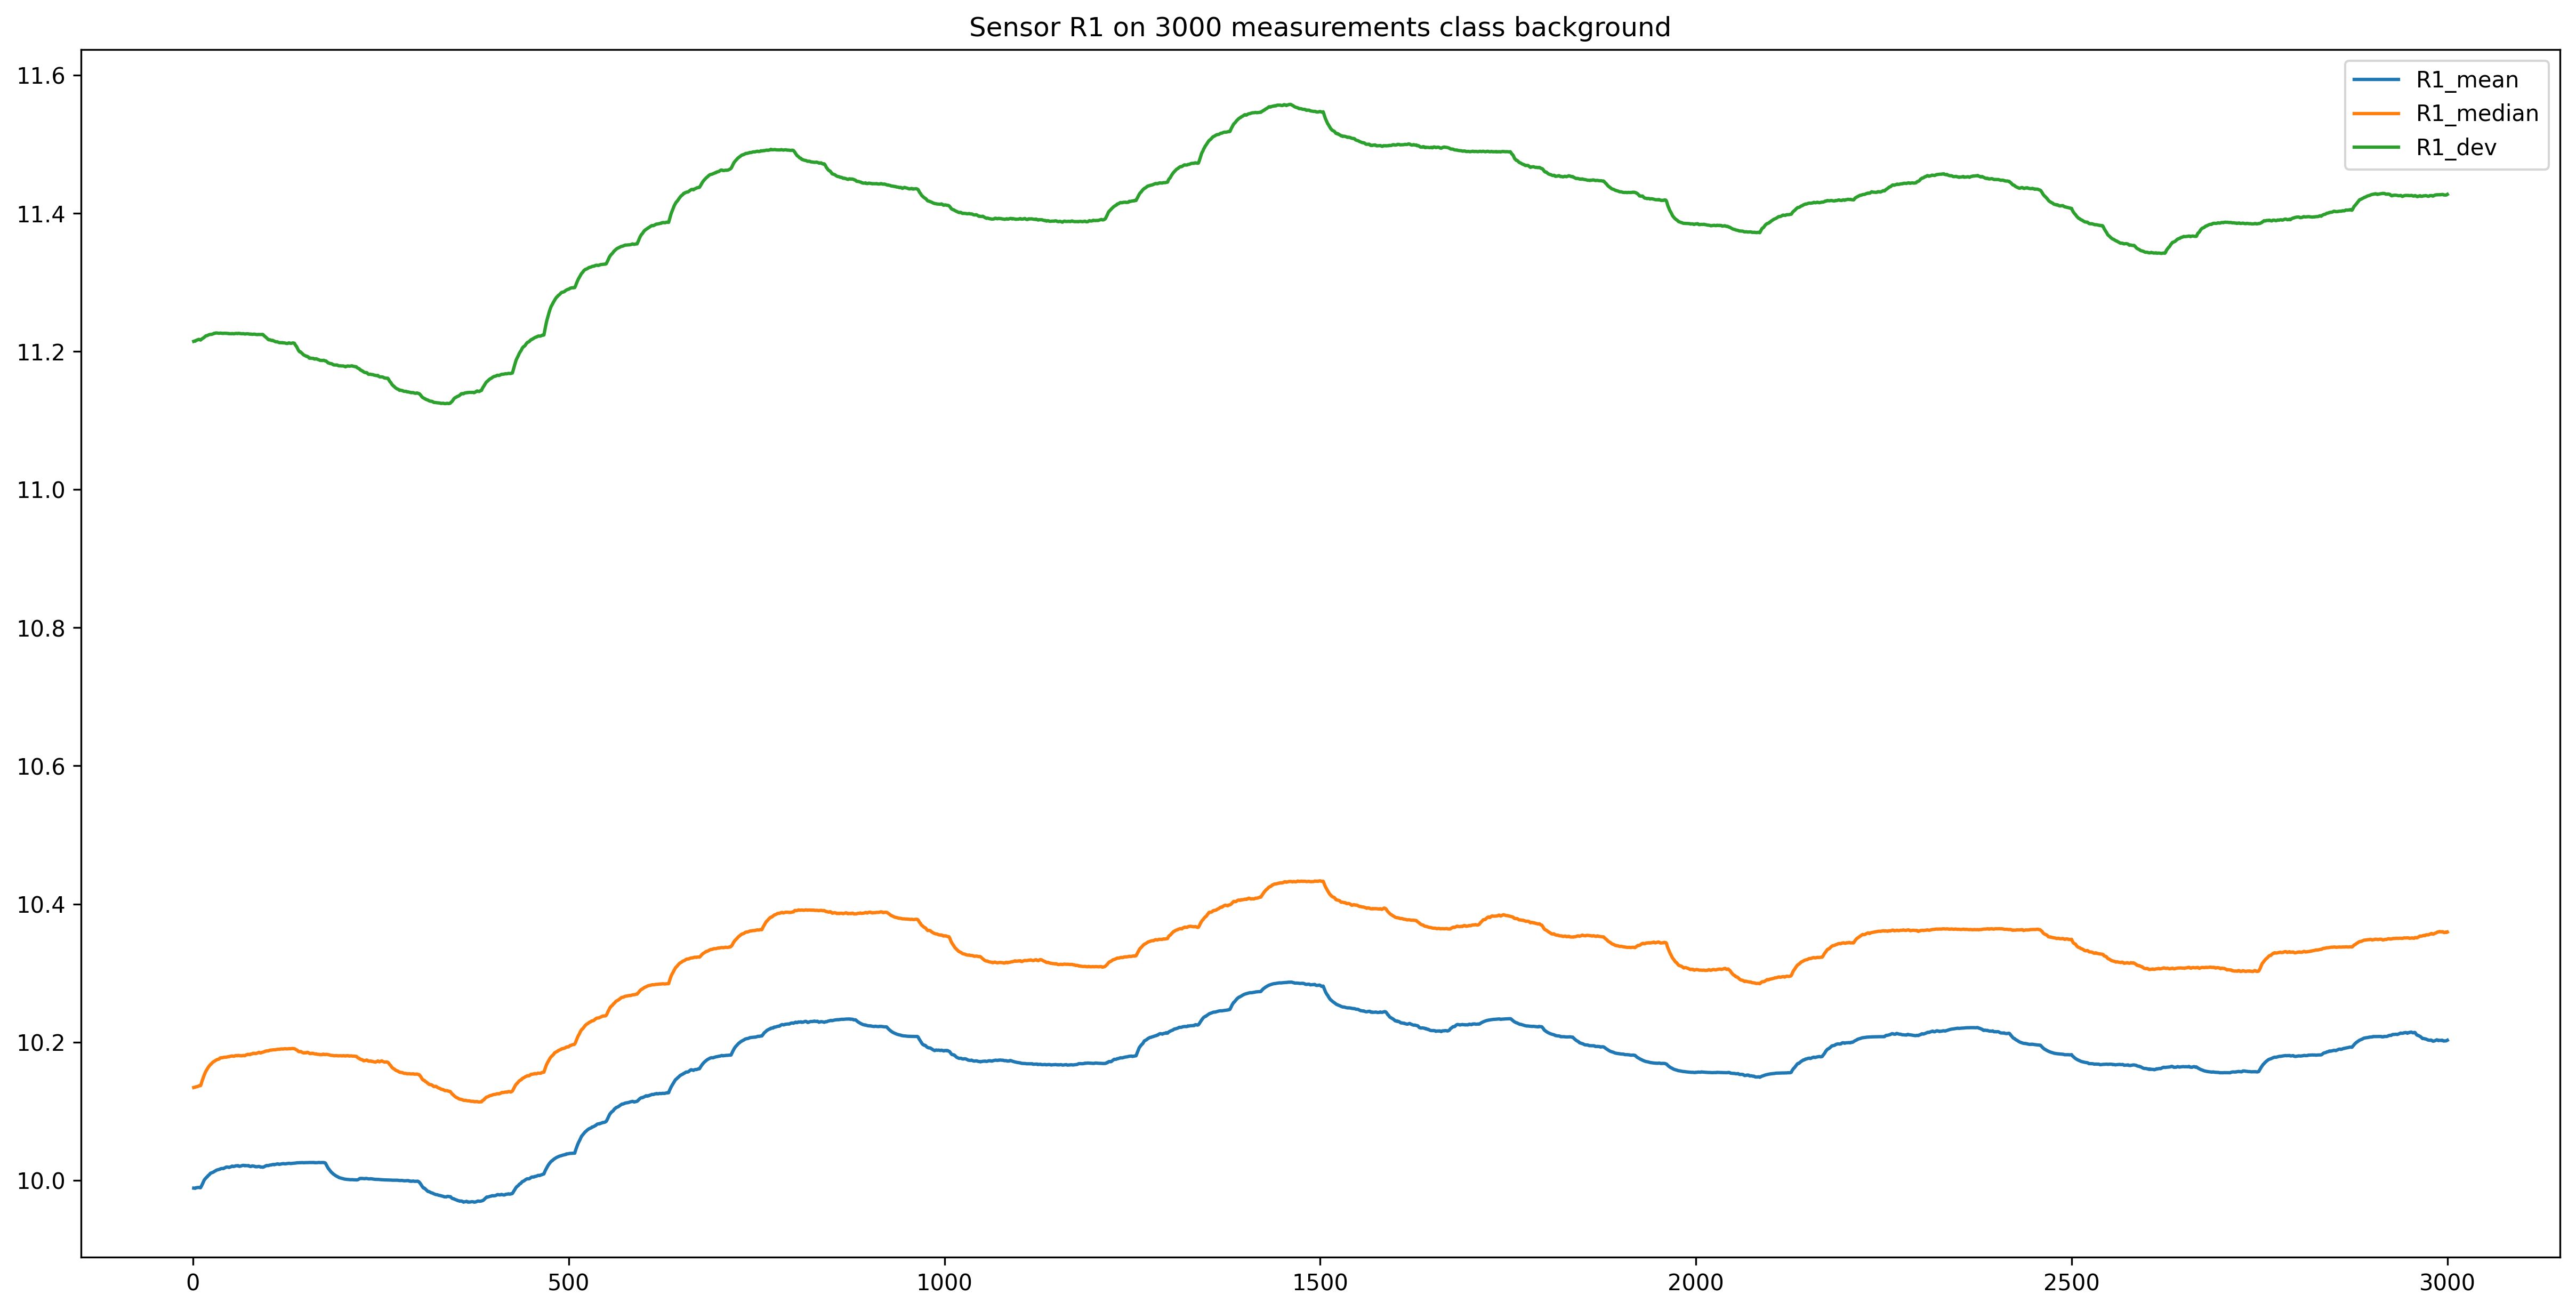

<Figure size 6000x3000 with 0 Axes>

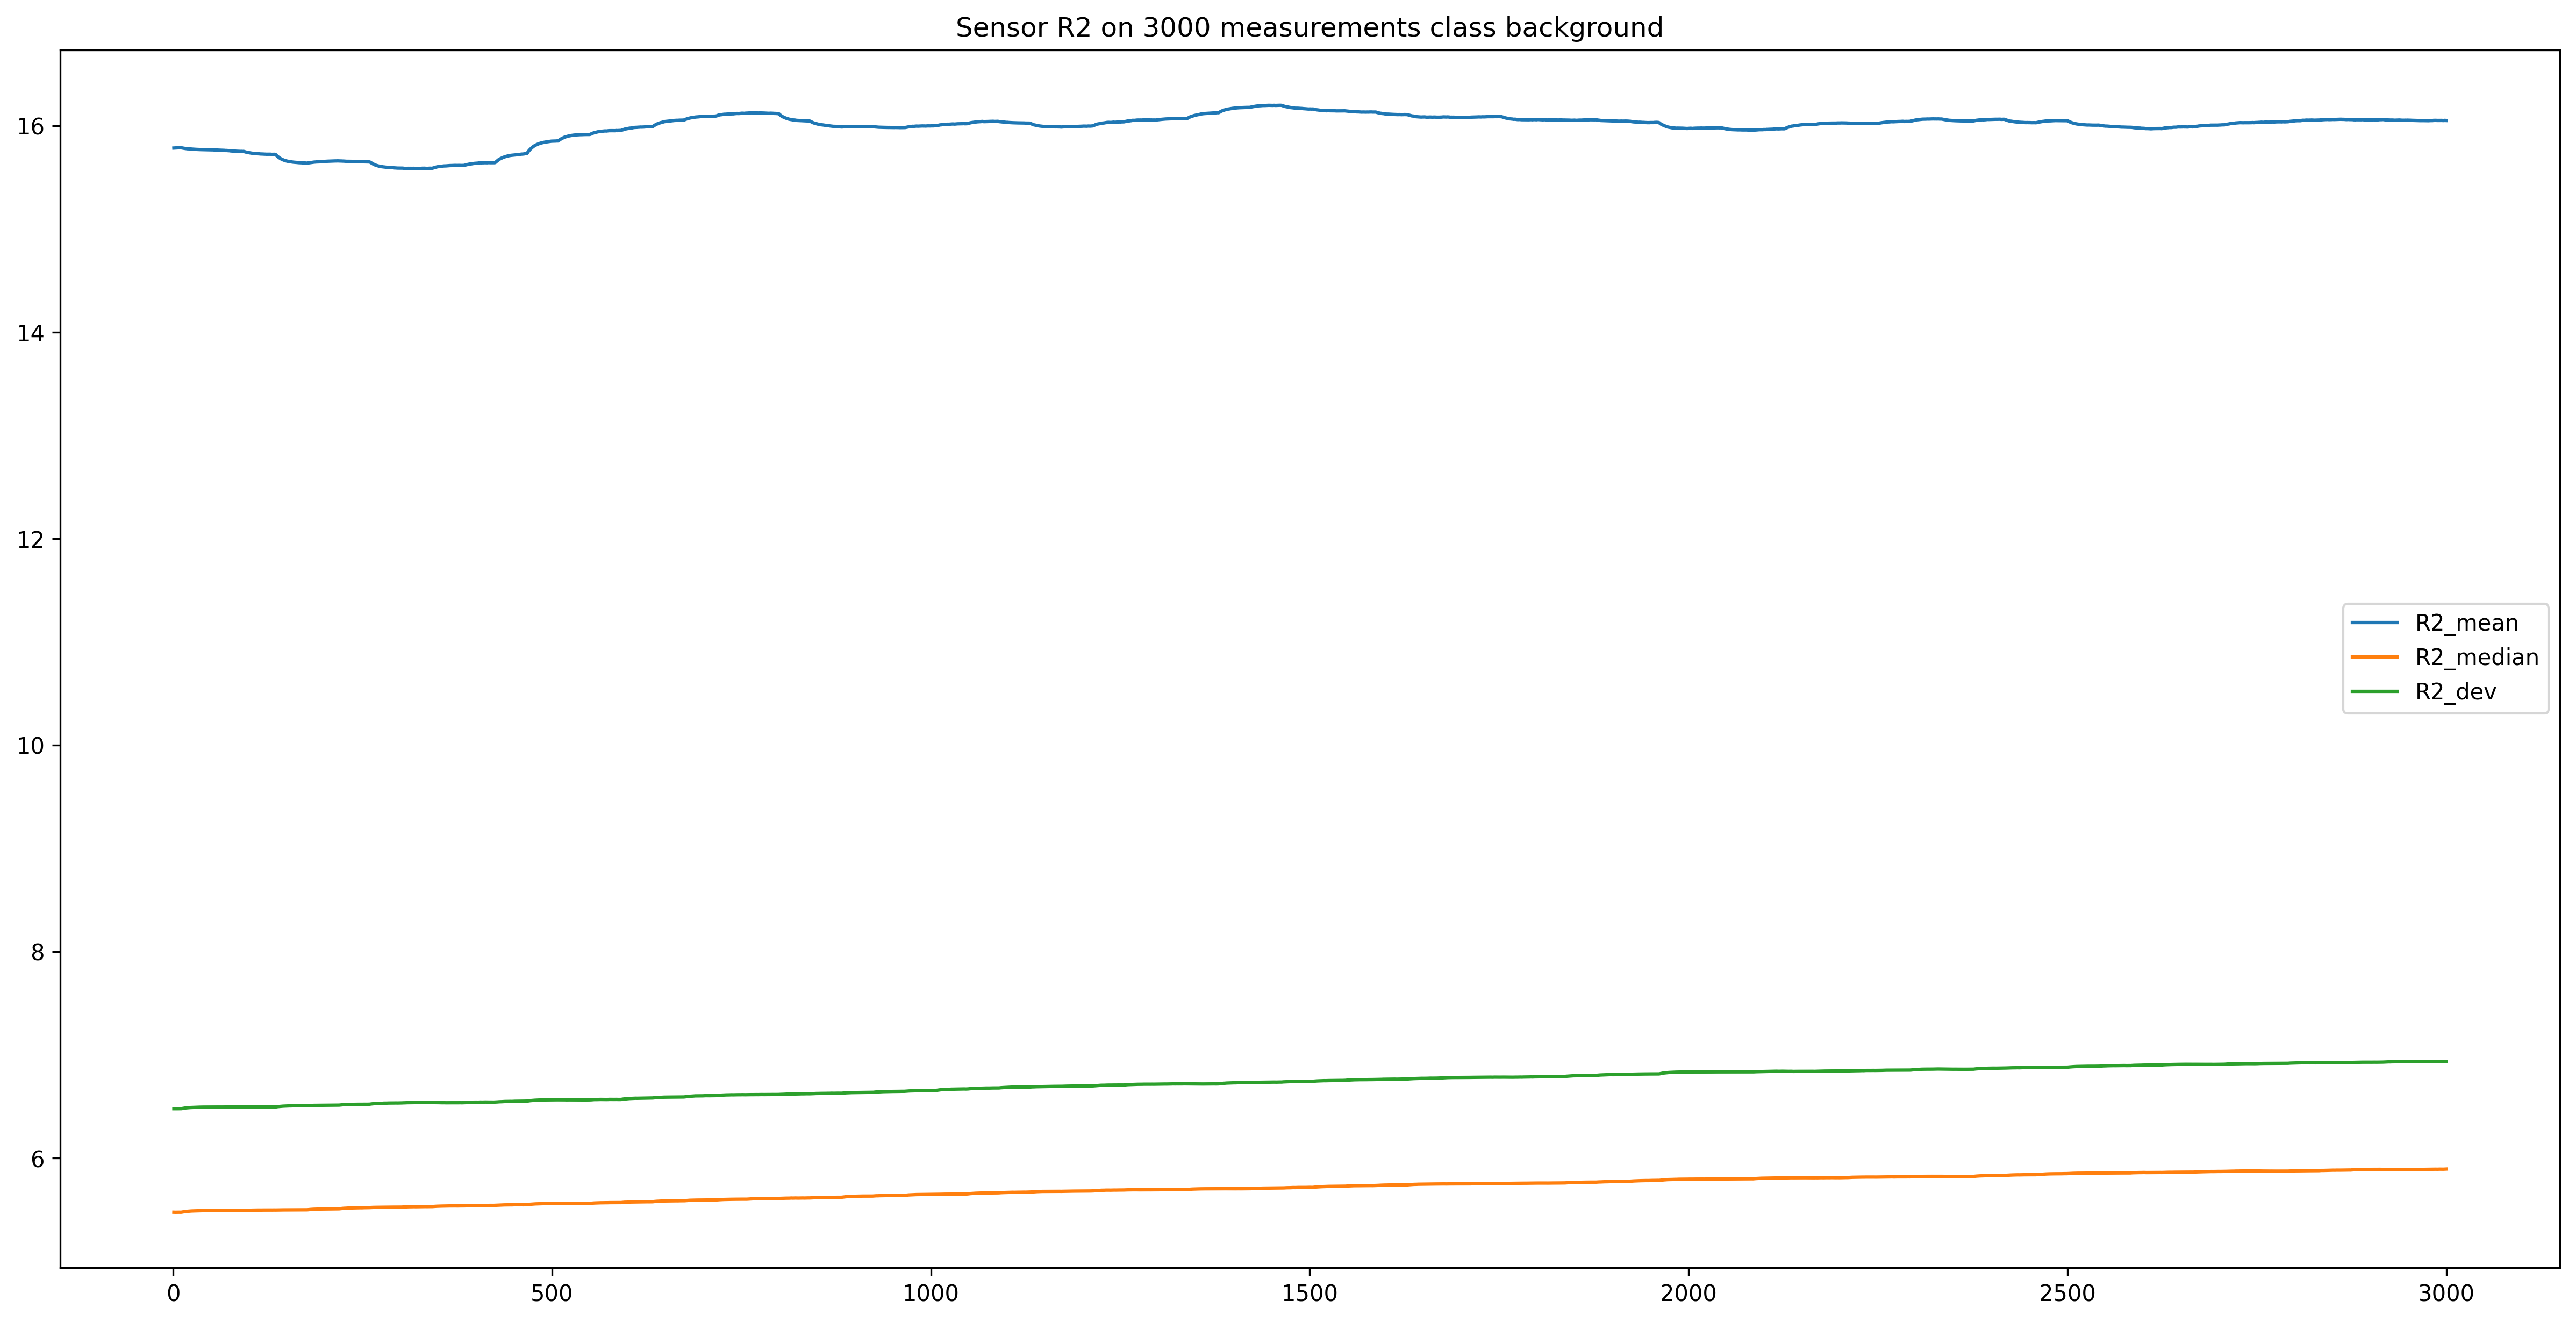

<Figure size 6000x3000 with 0 Axes>

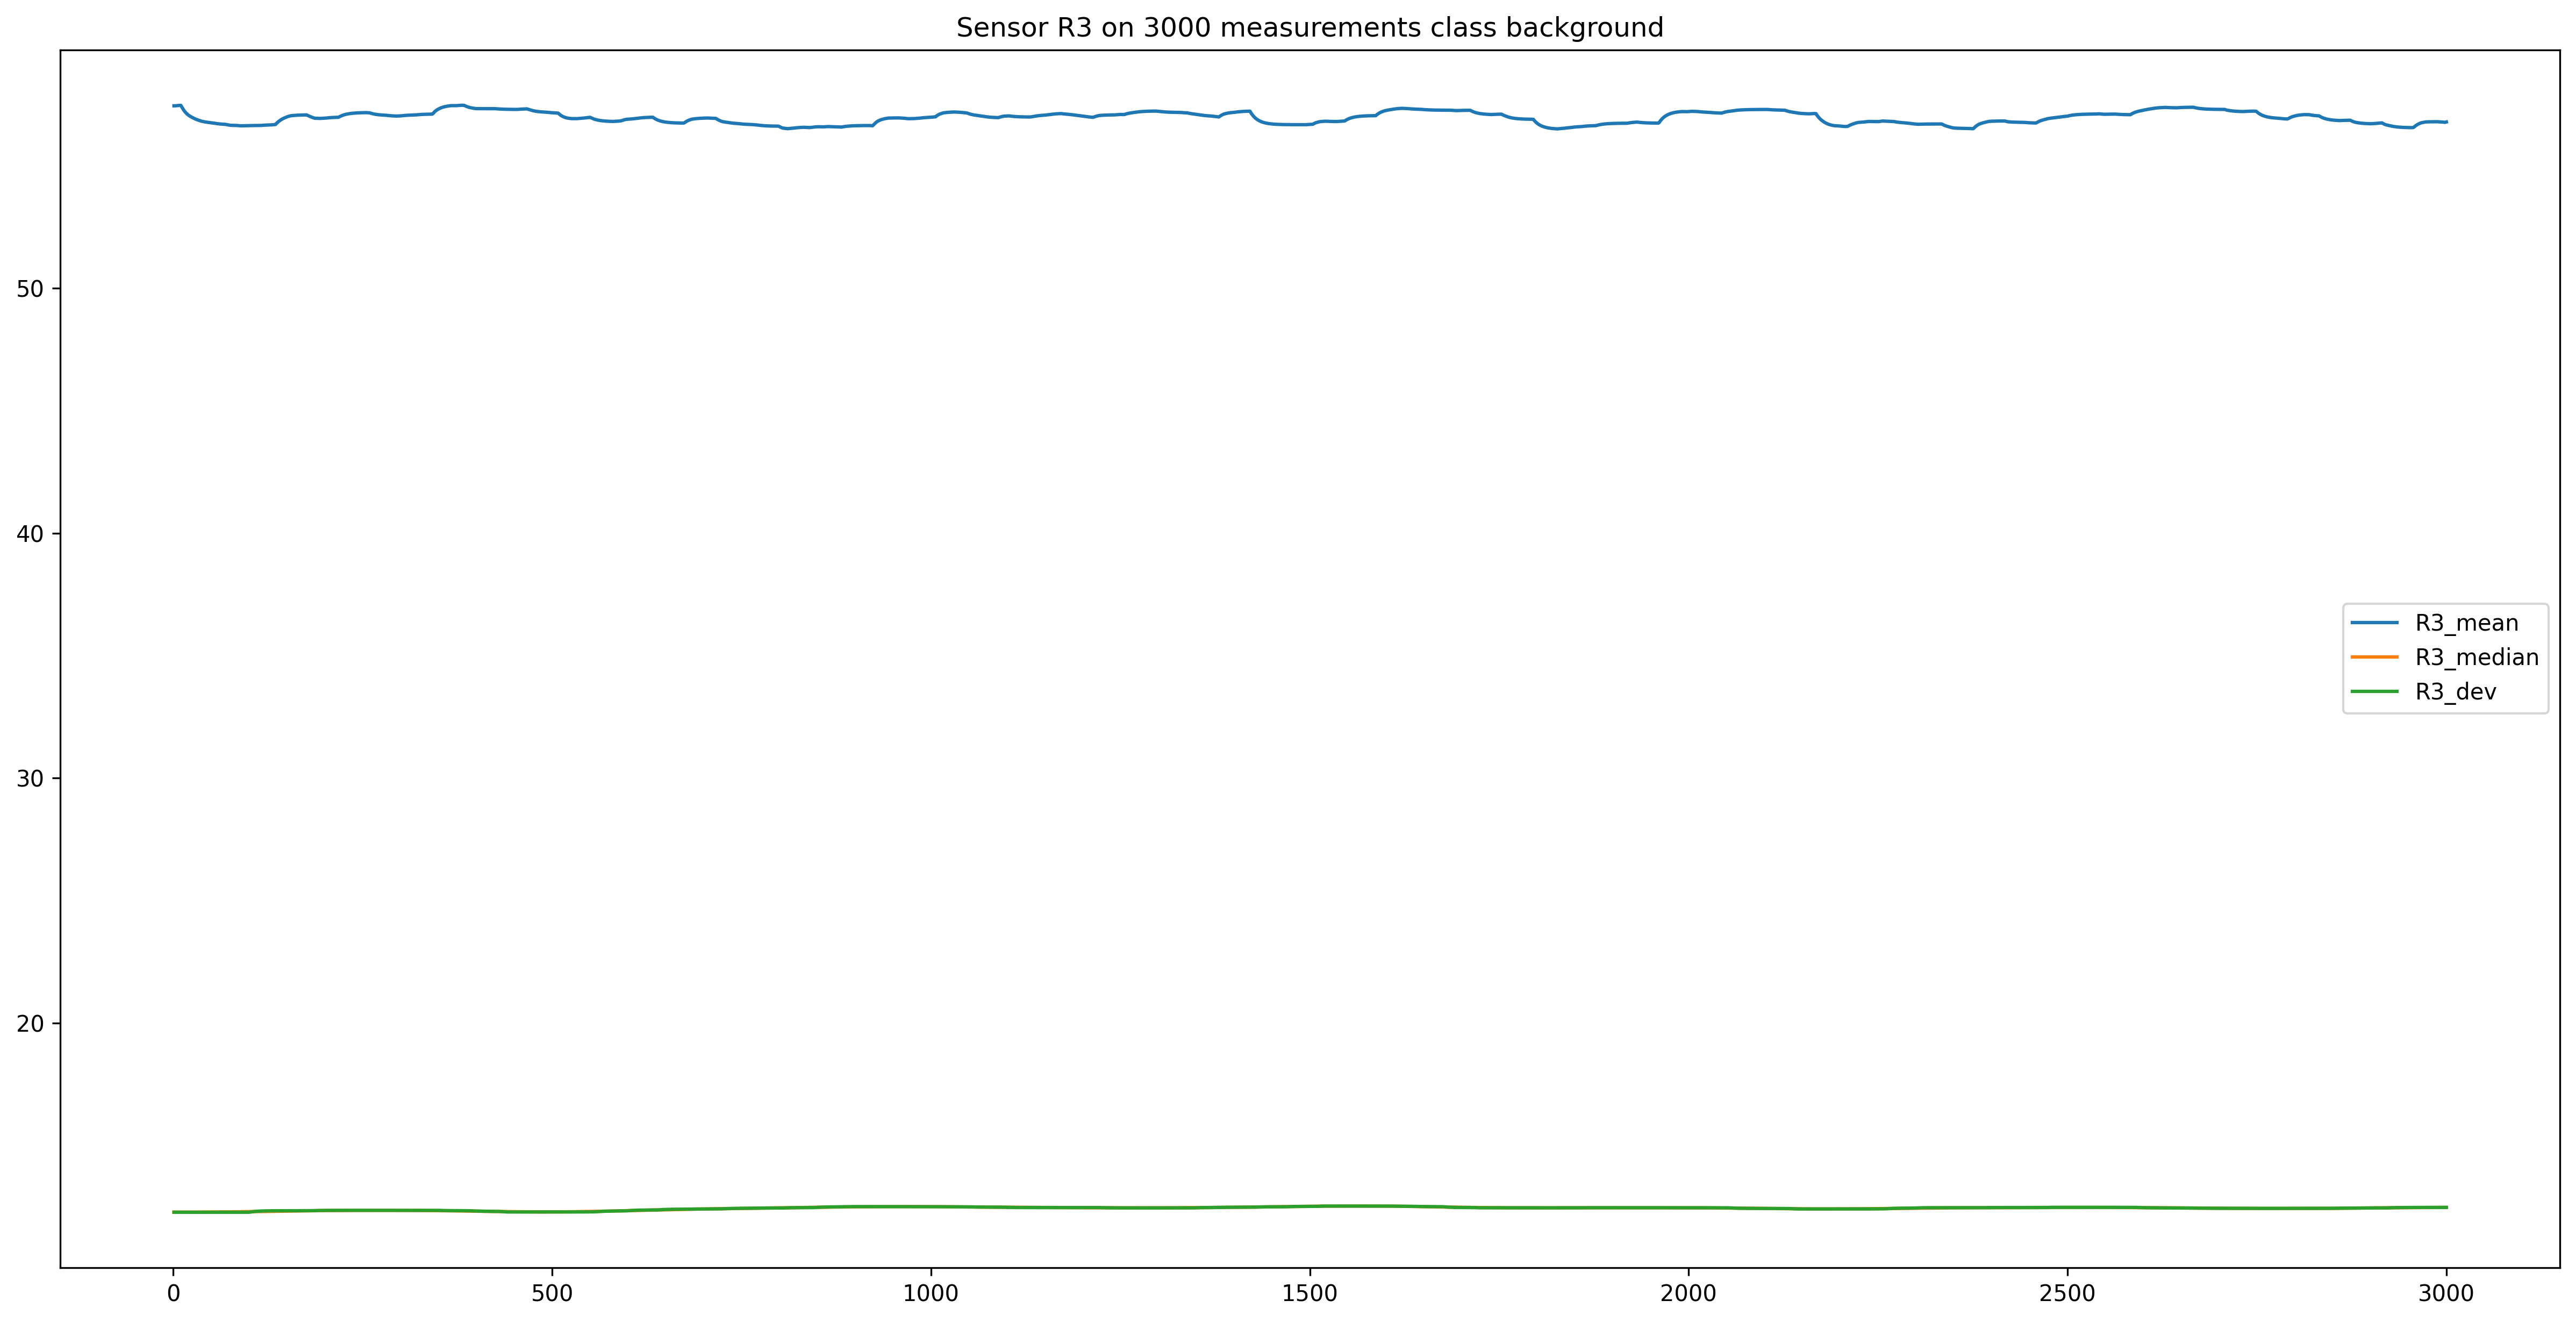

<Figure size 6000x3000 with 0 Axes>

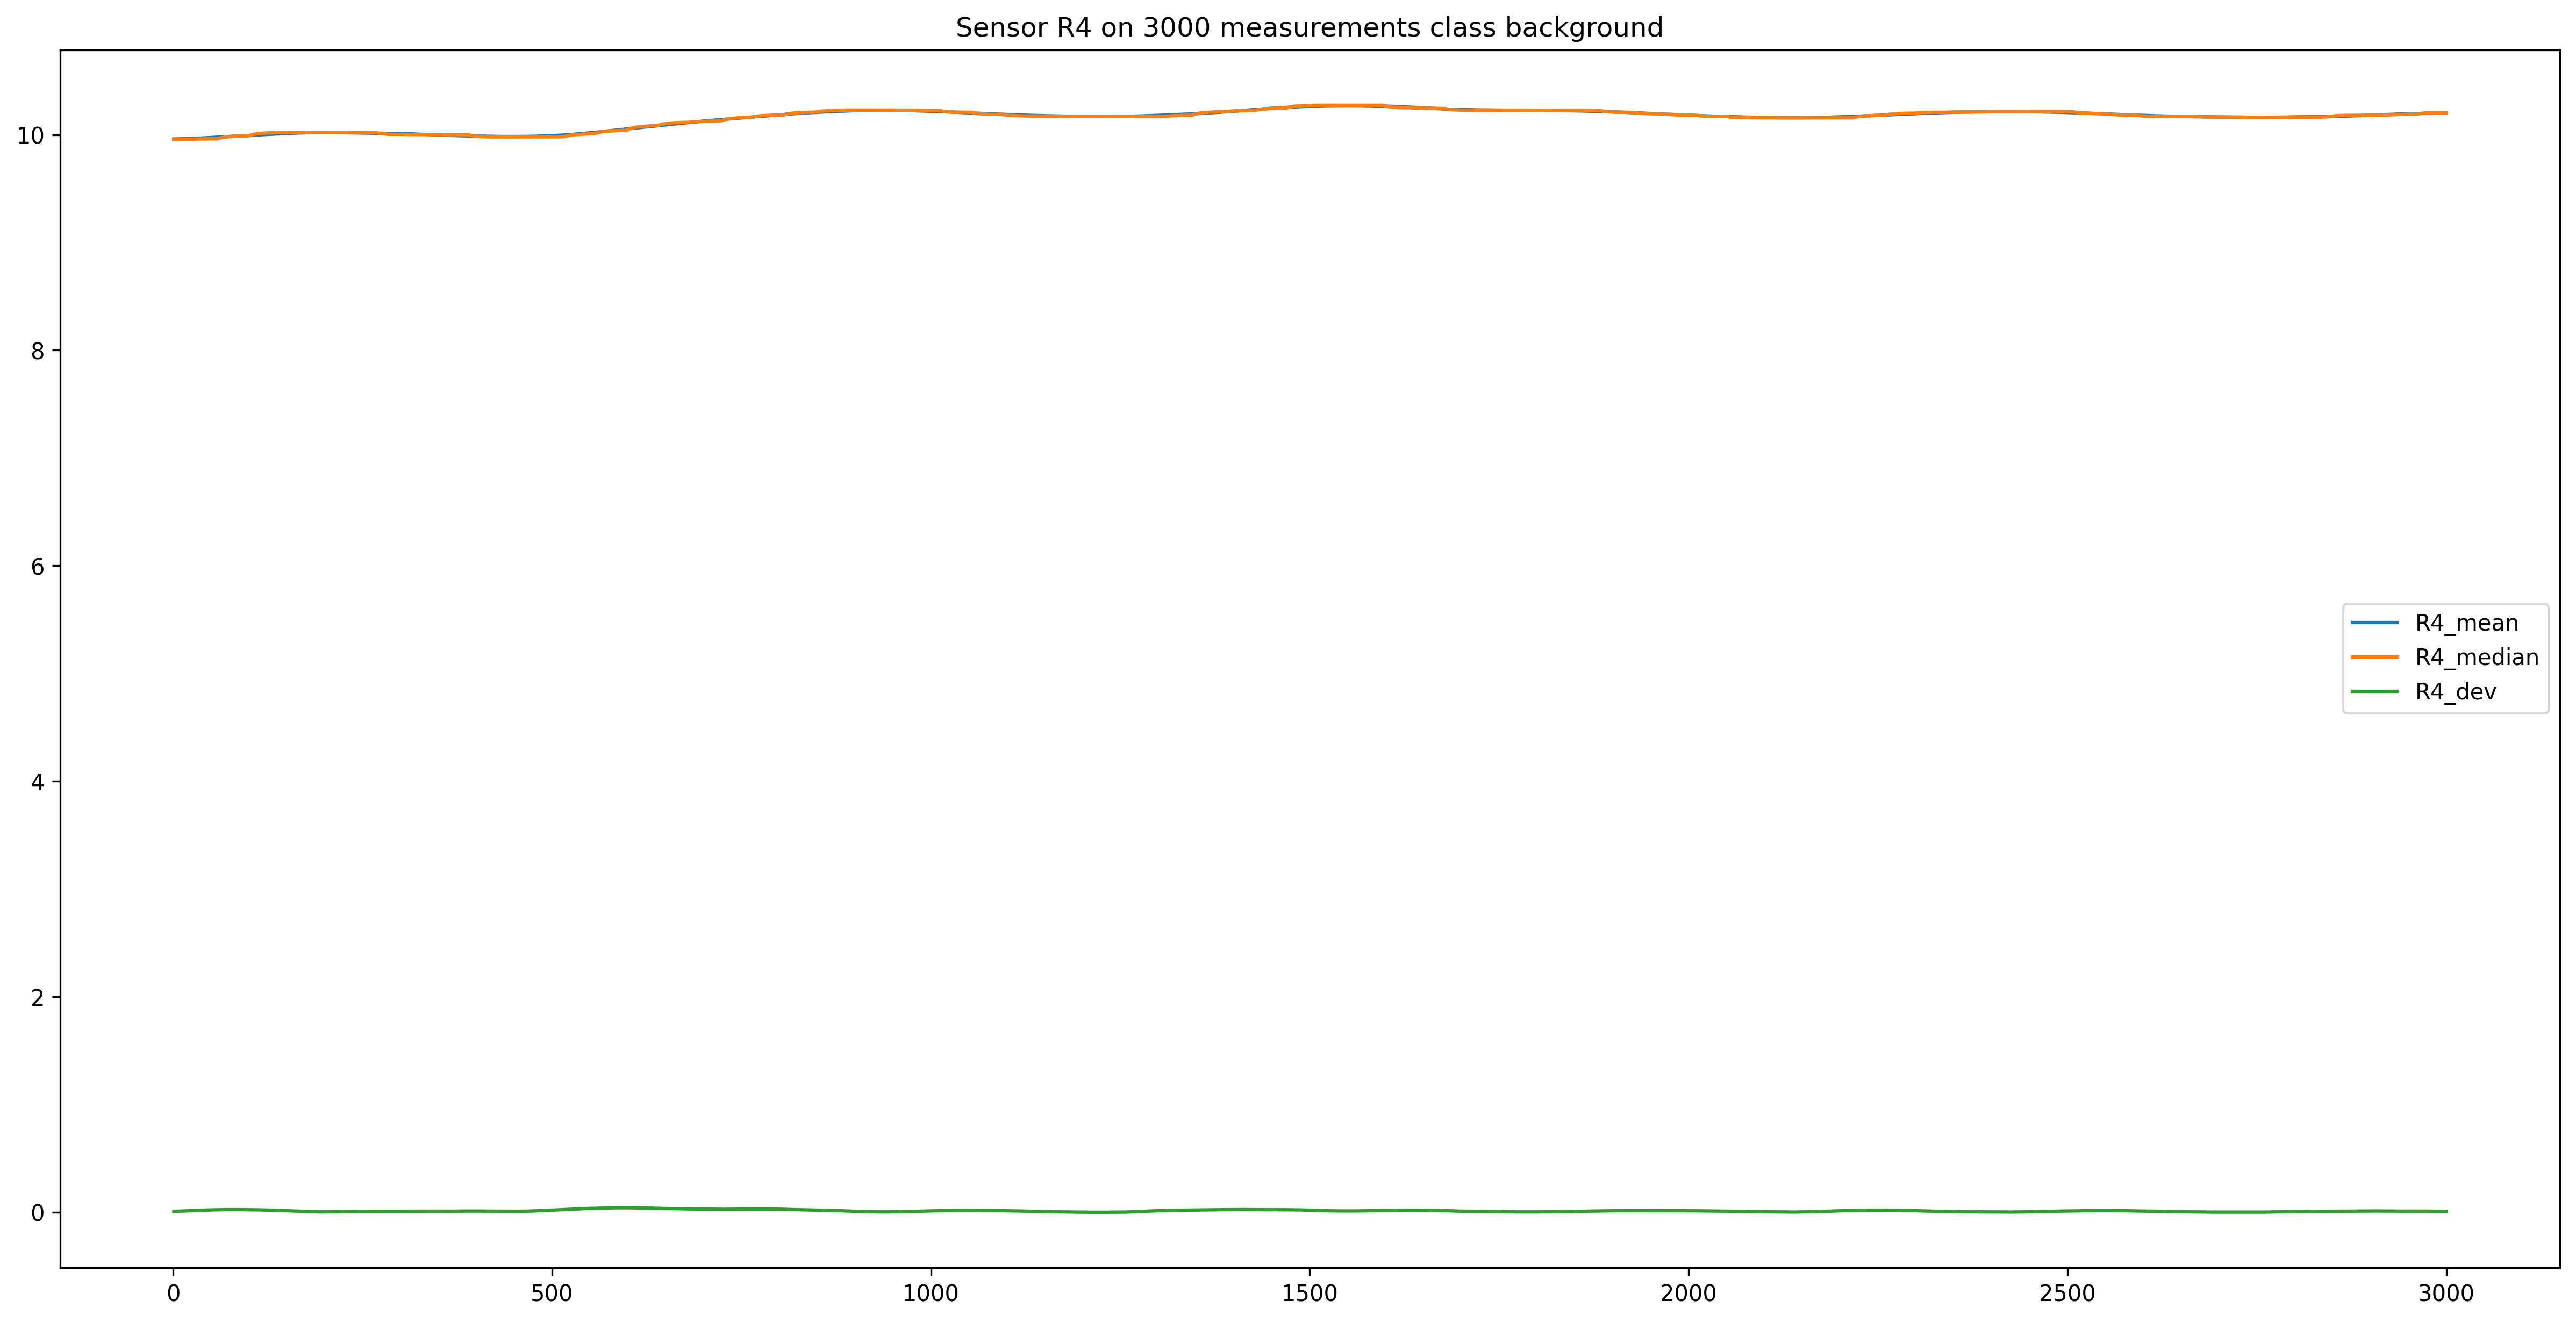

<Figure size 6000x3000 with 0 Axes>

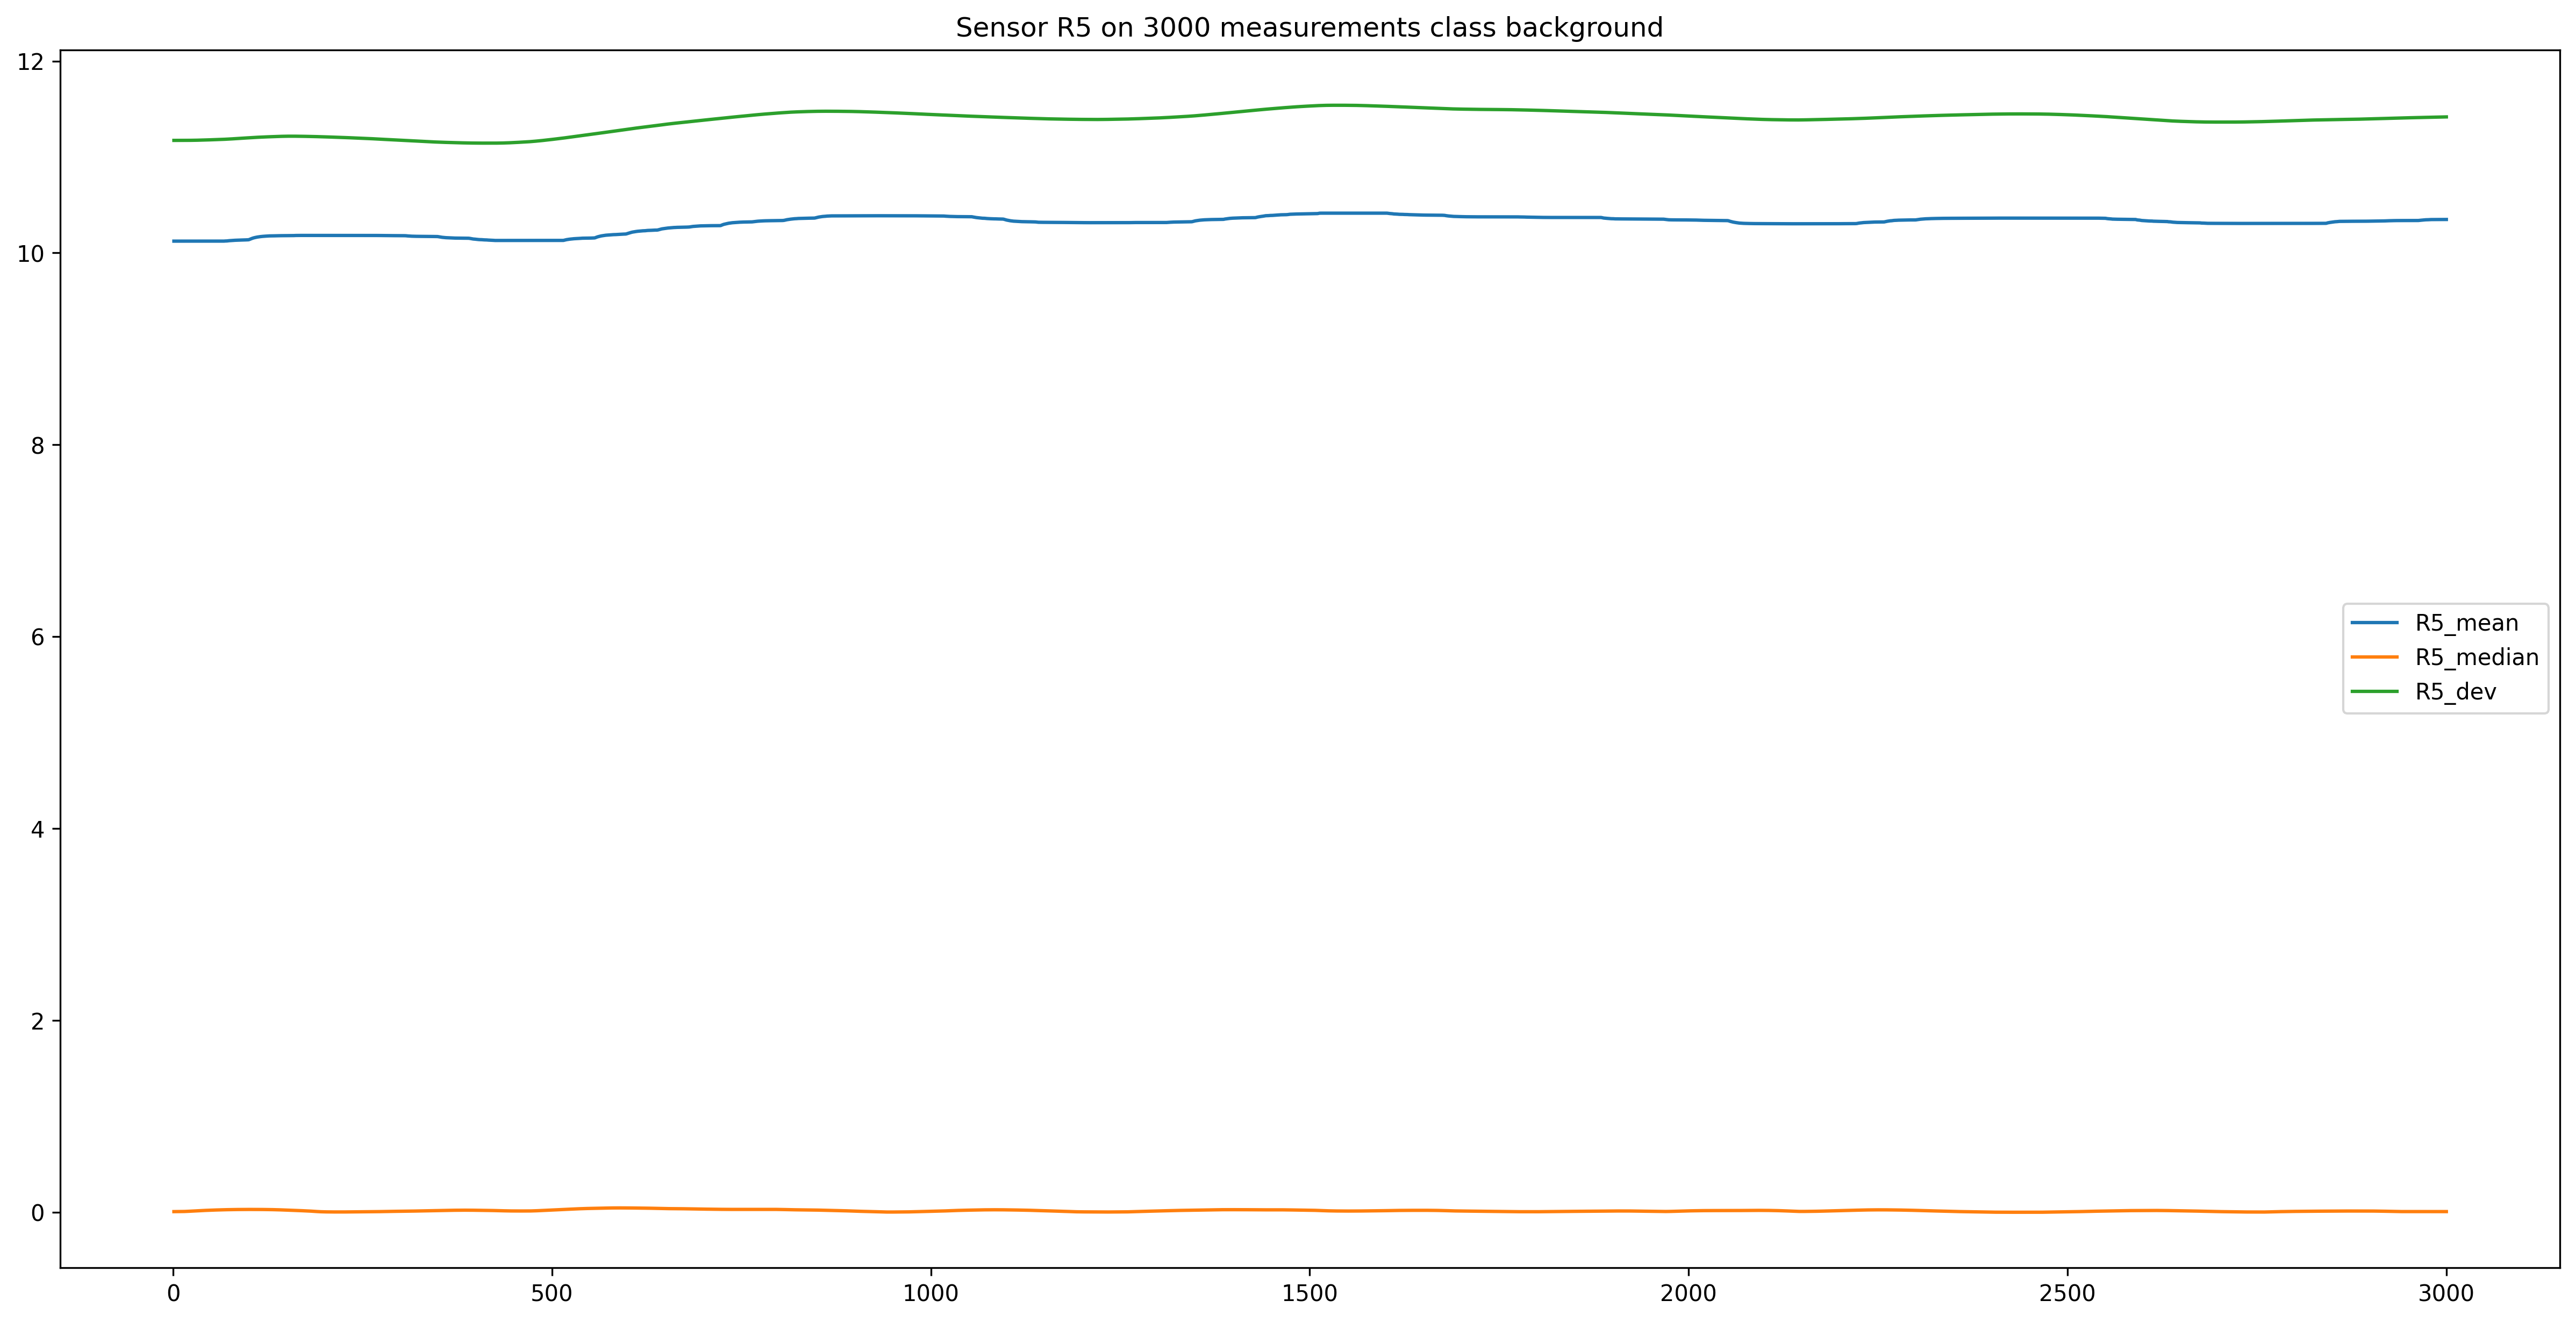

<Figure size 6000x3000 with 0 Axes>

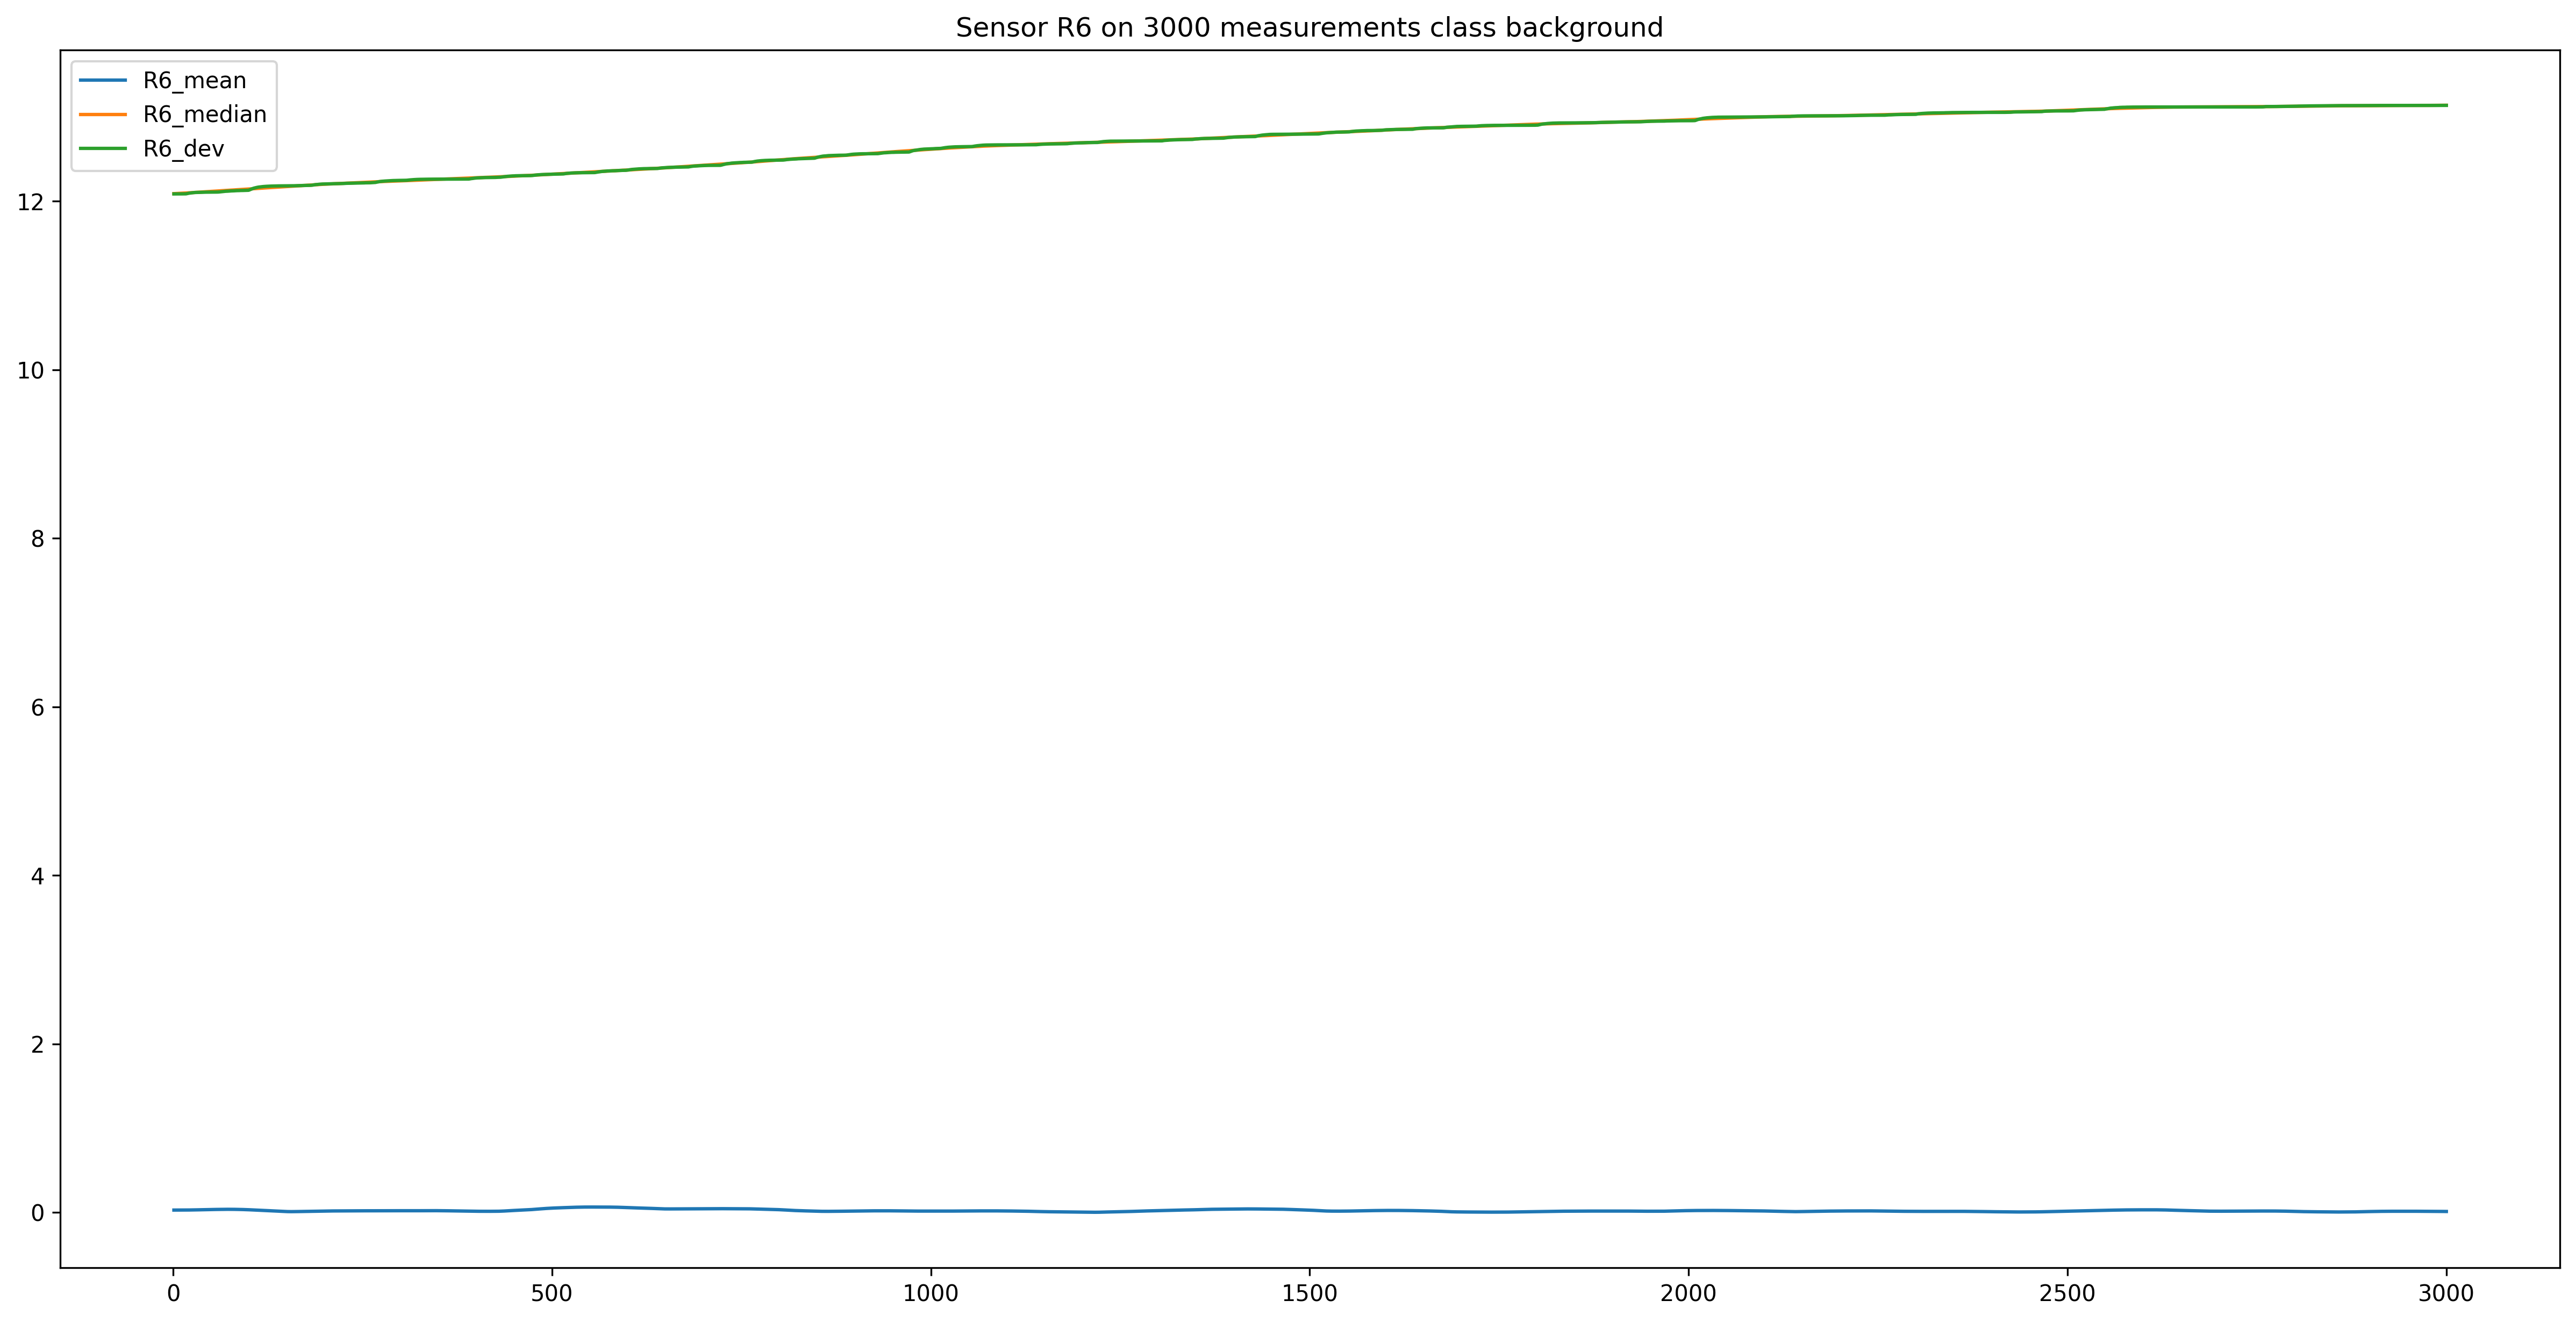

<Figure size 6000x3000 with 0 Axes>

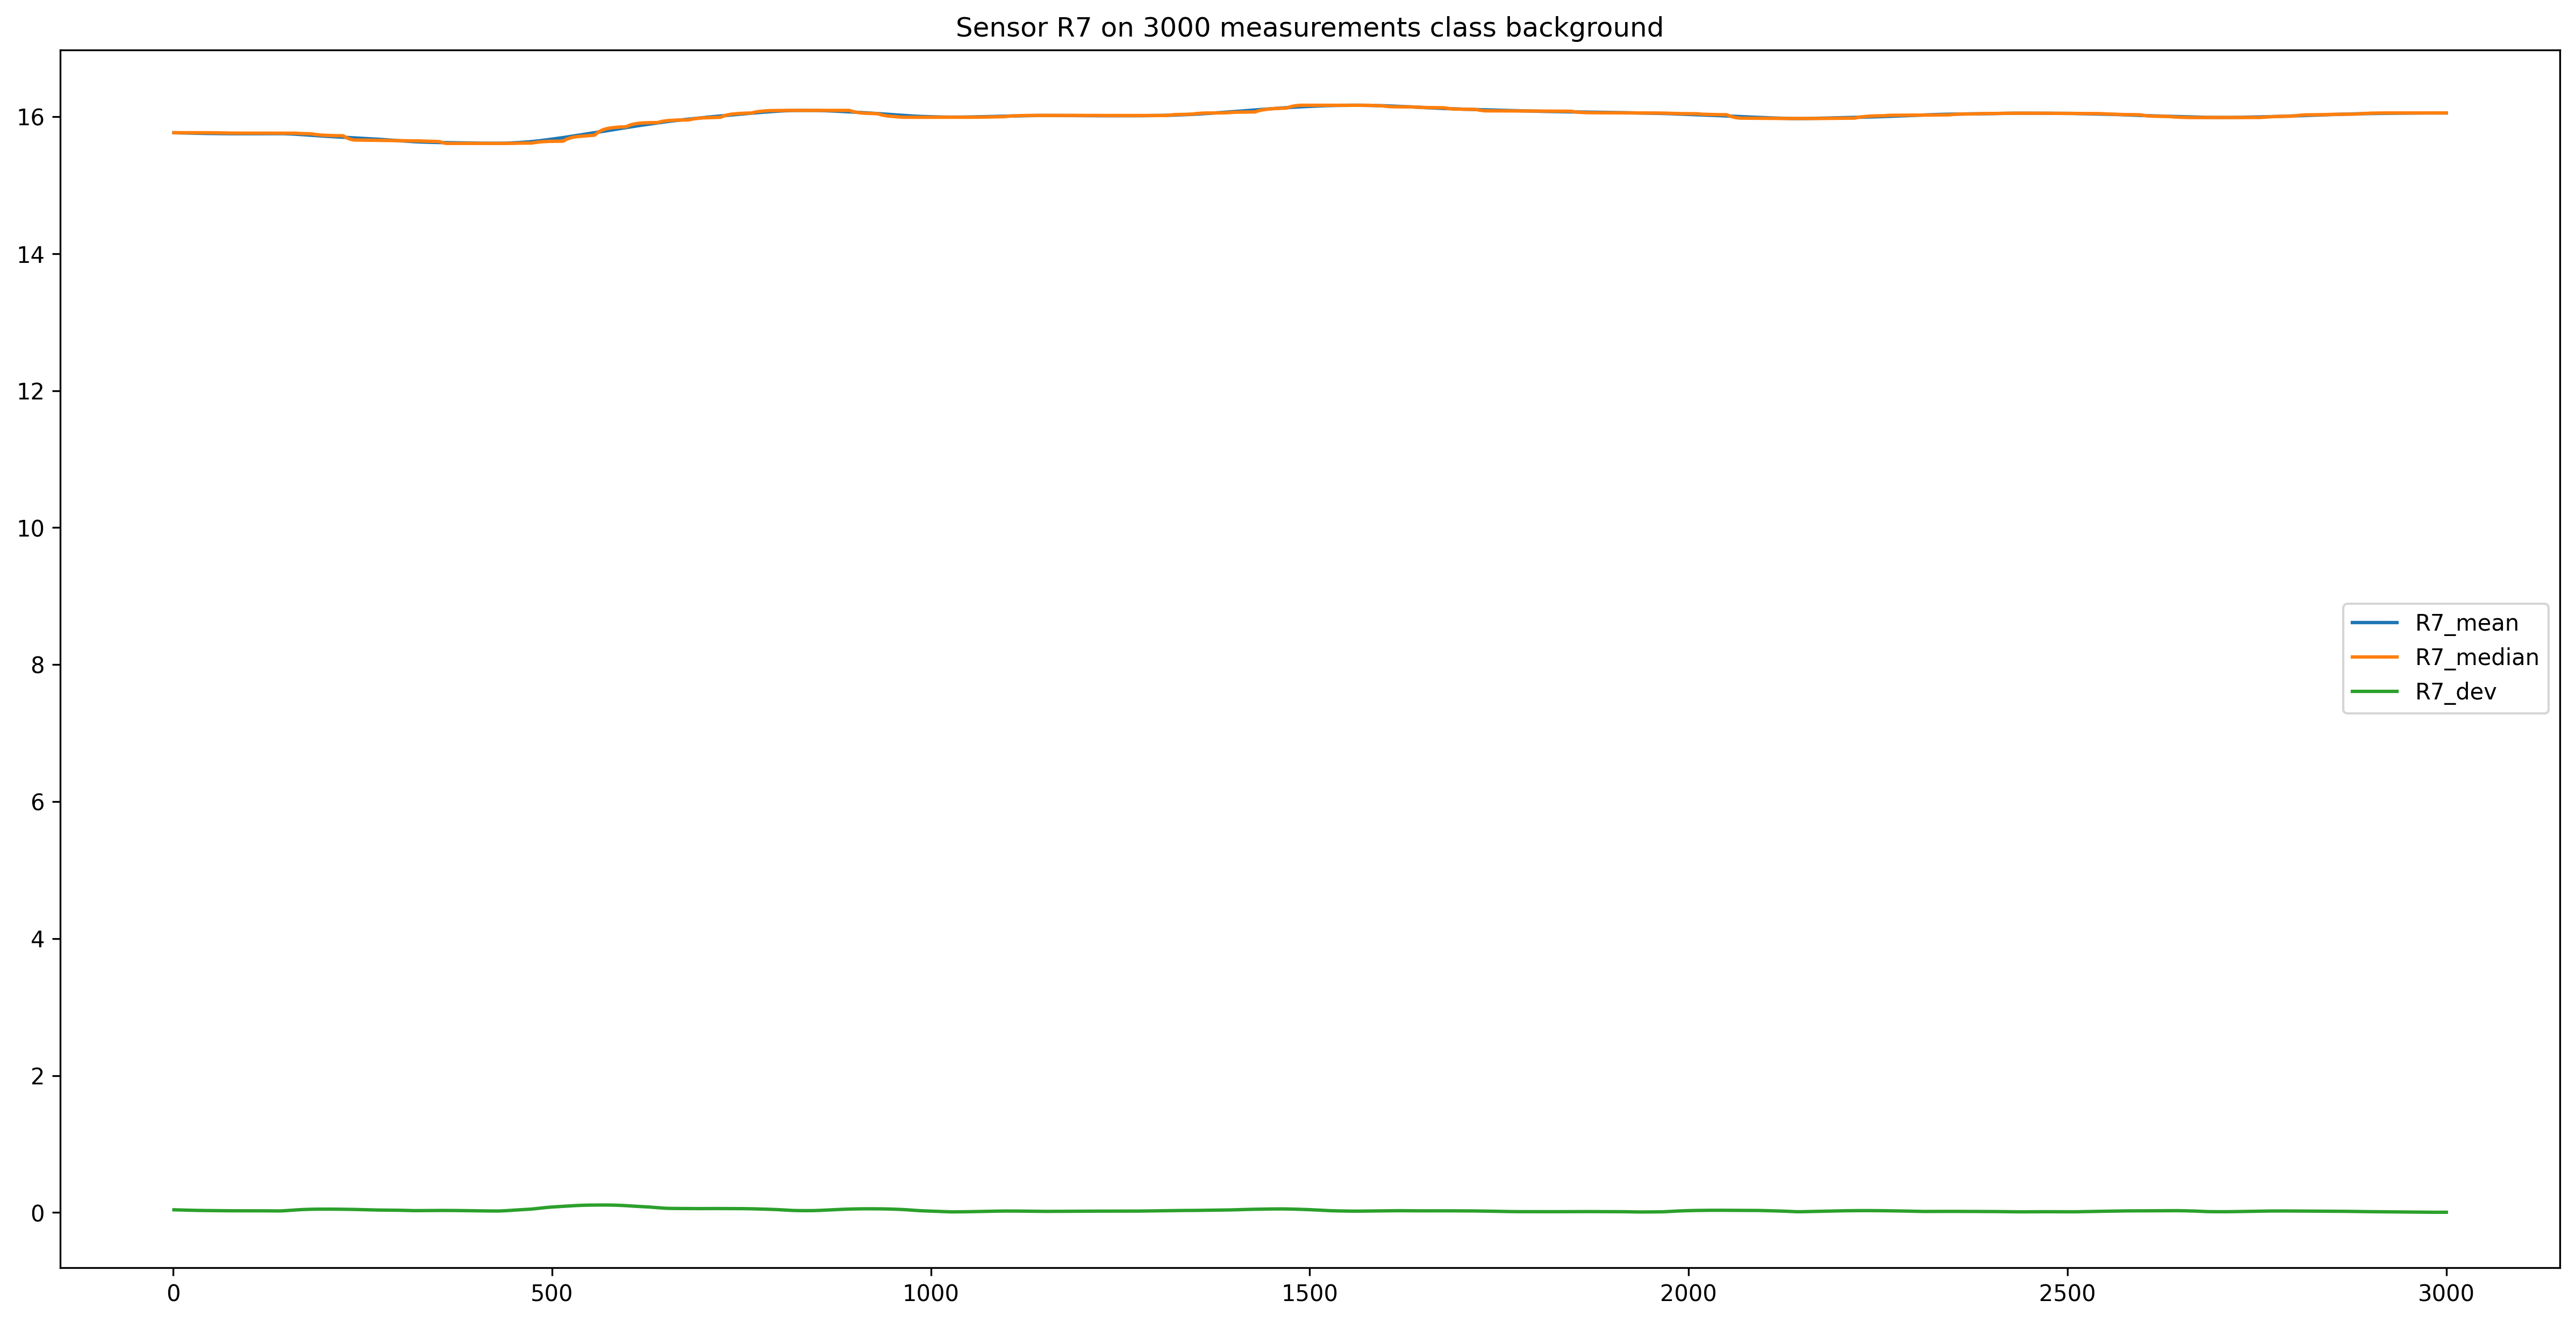

<Figure size 6000x3000 with 0 Axes>

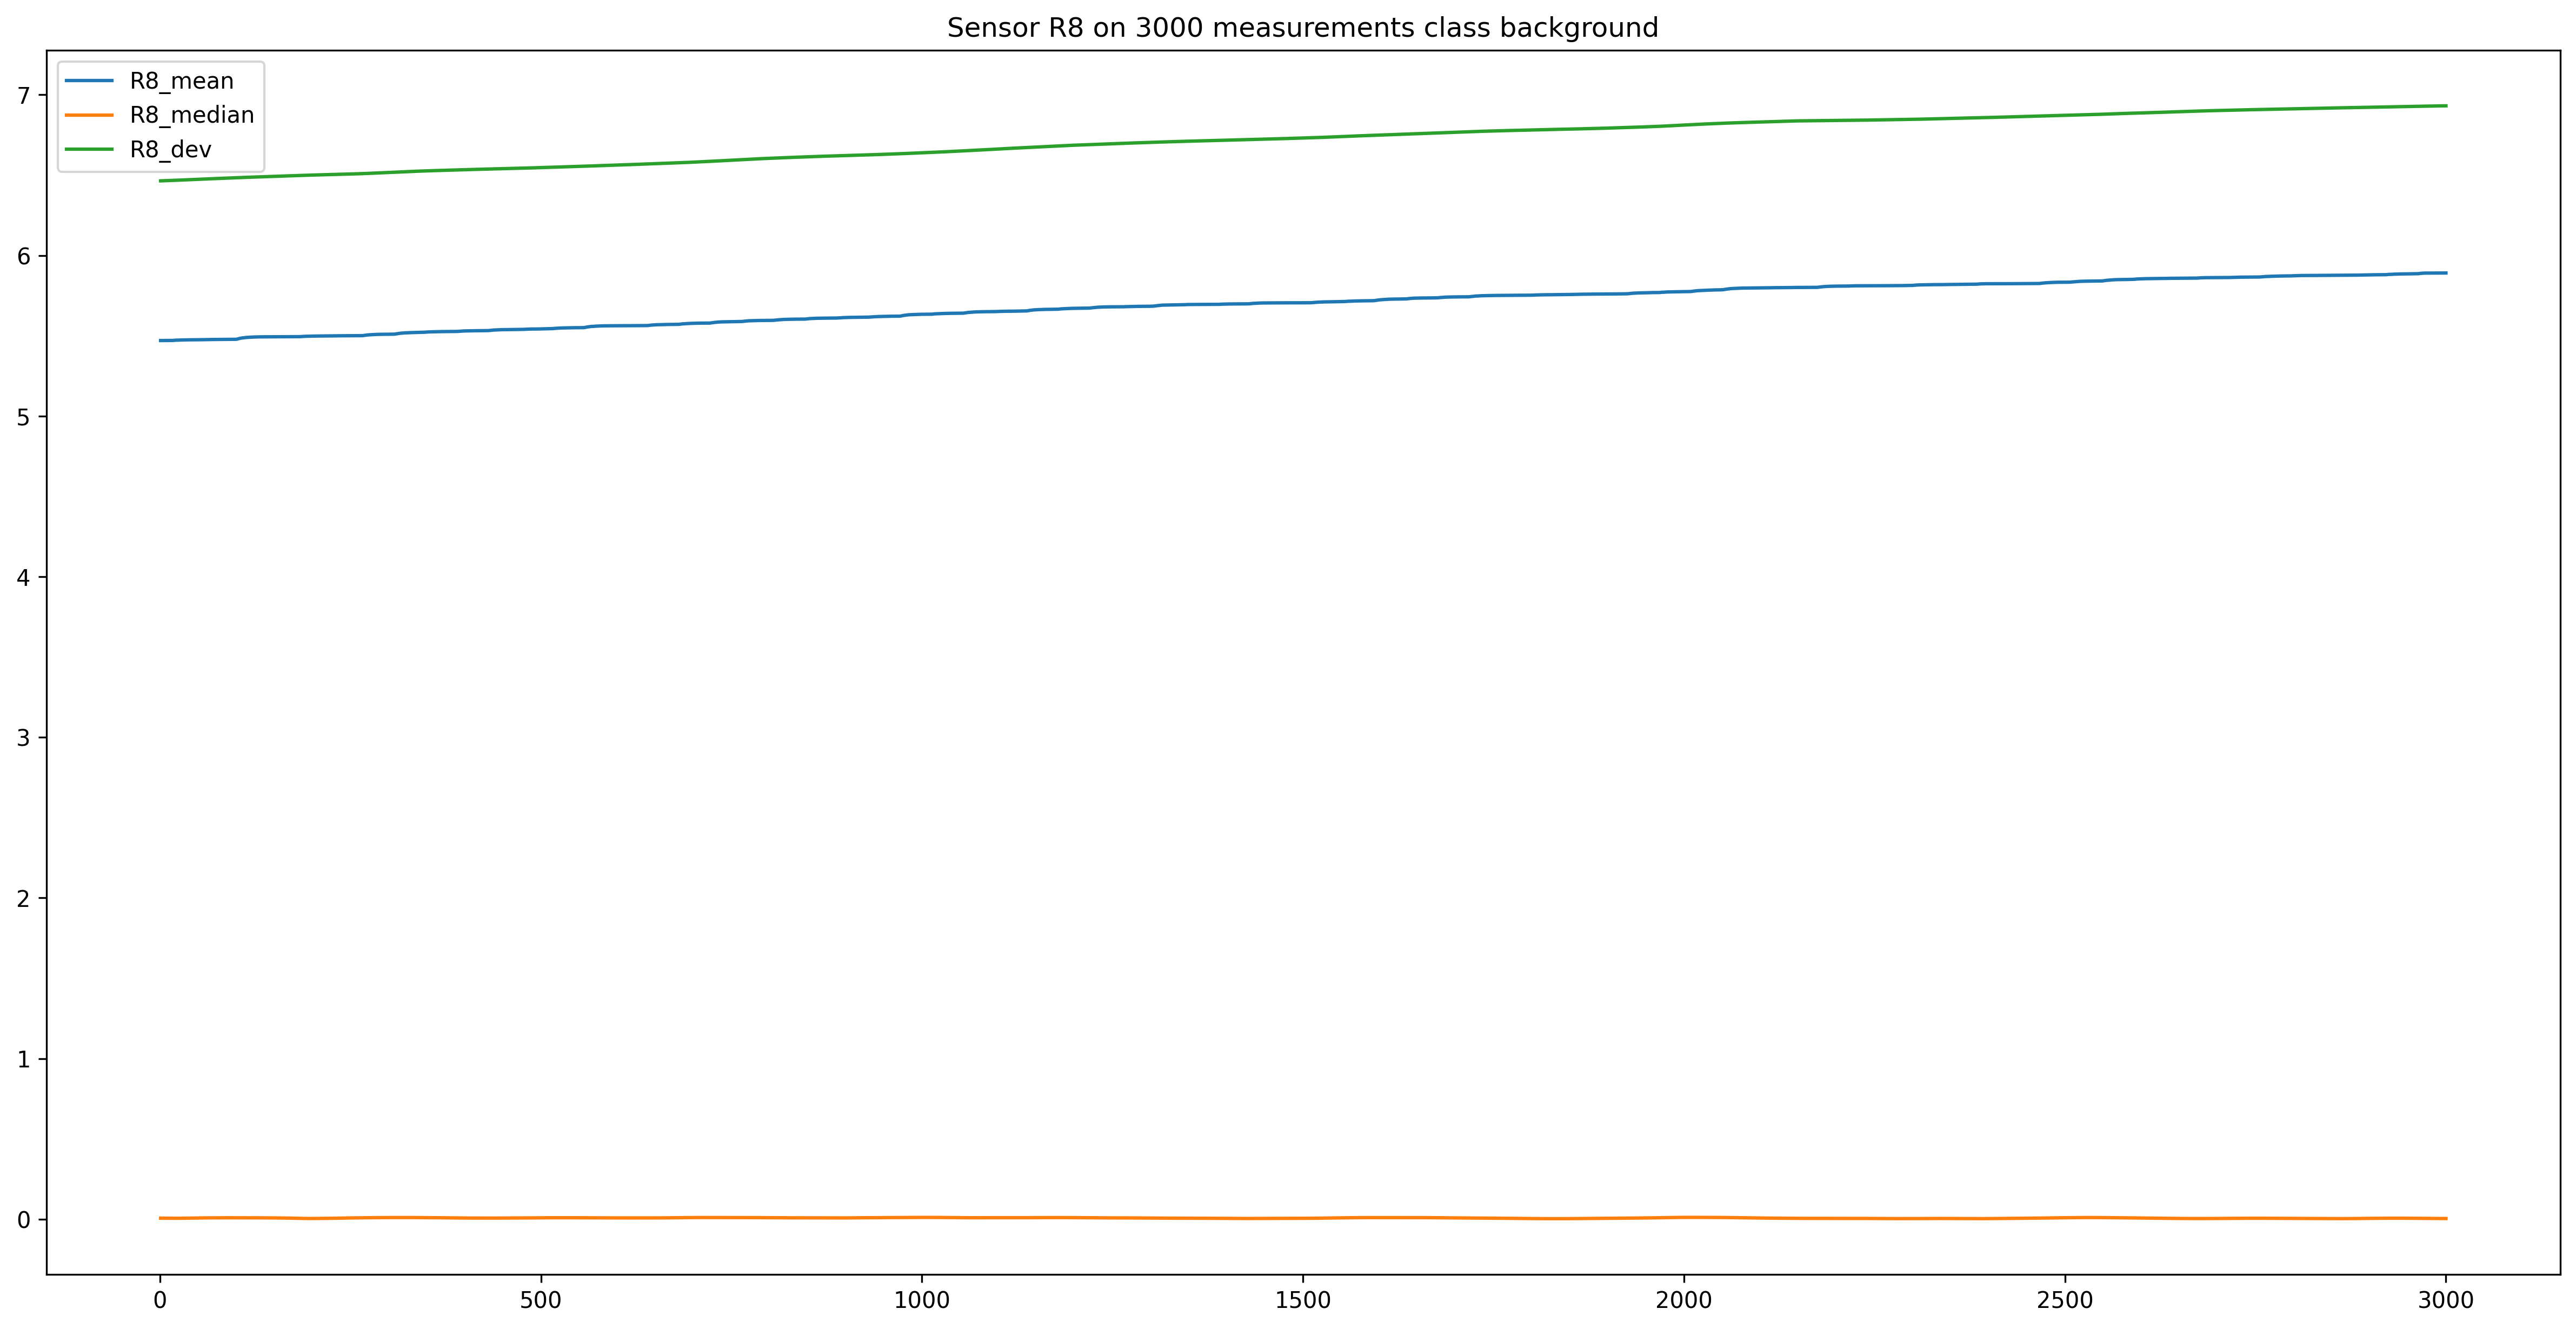

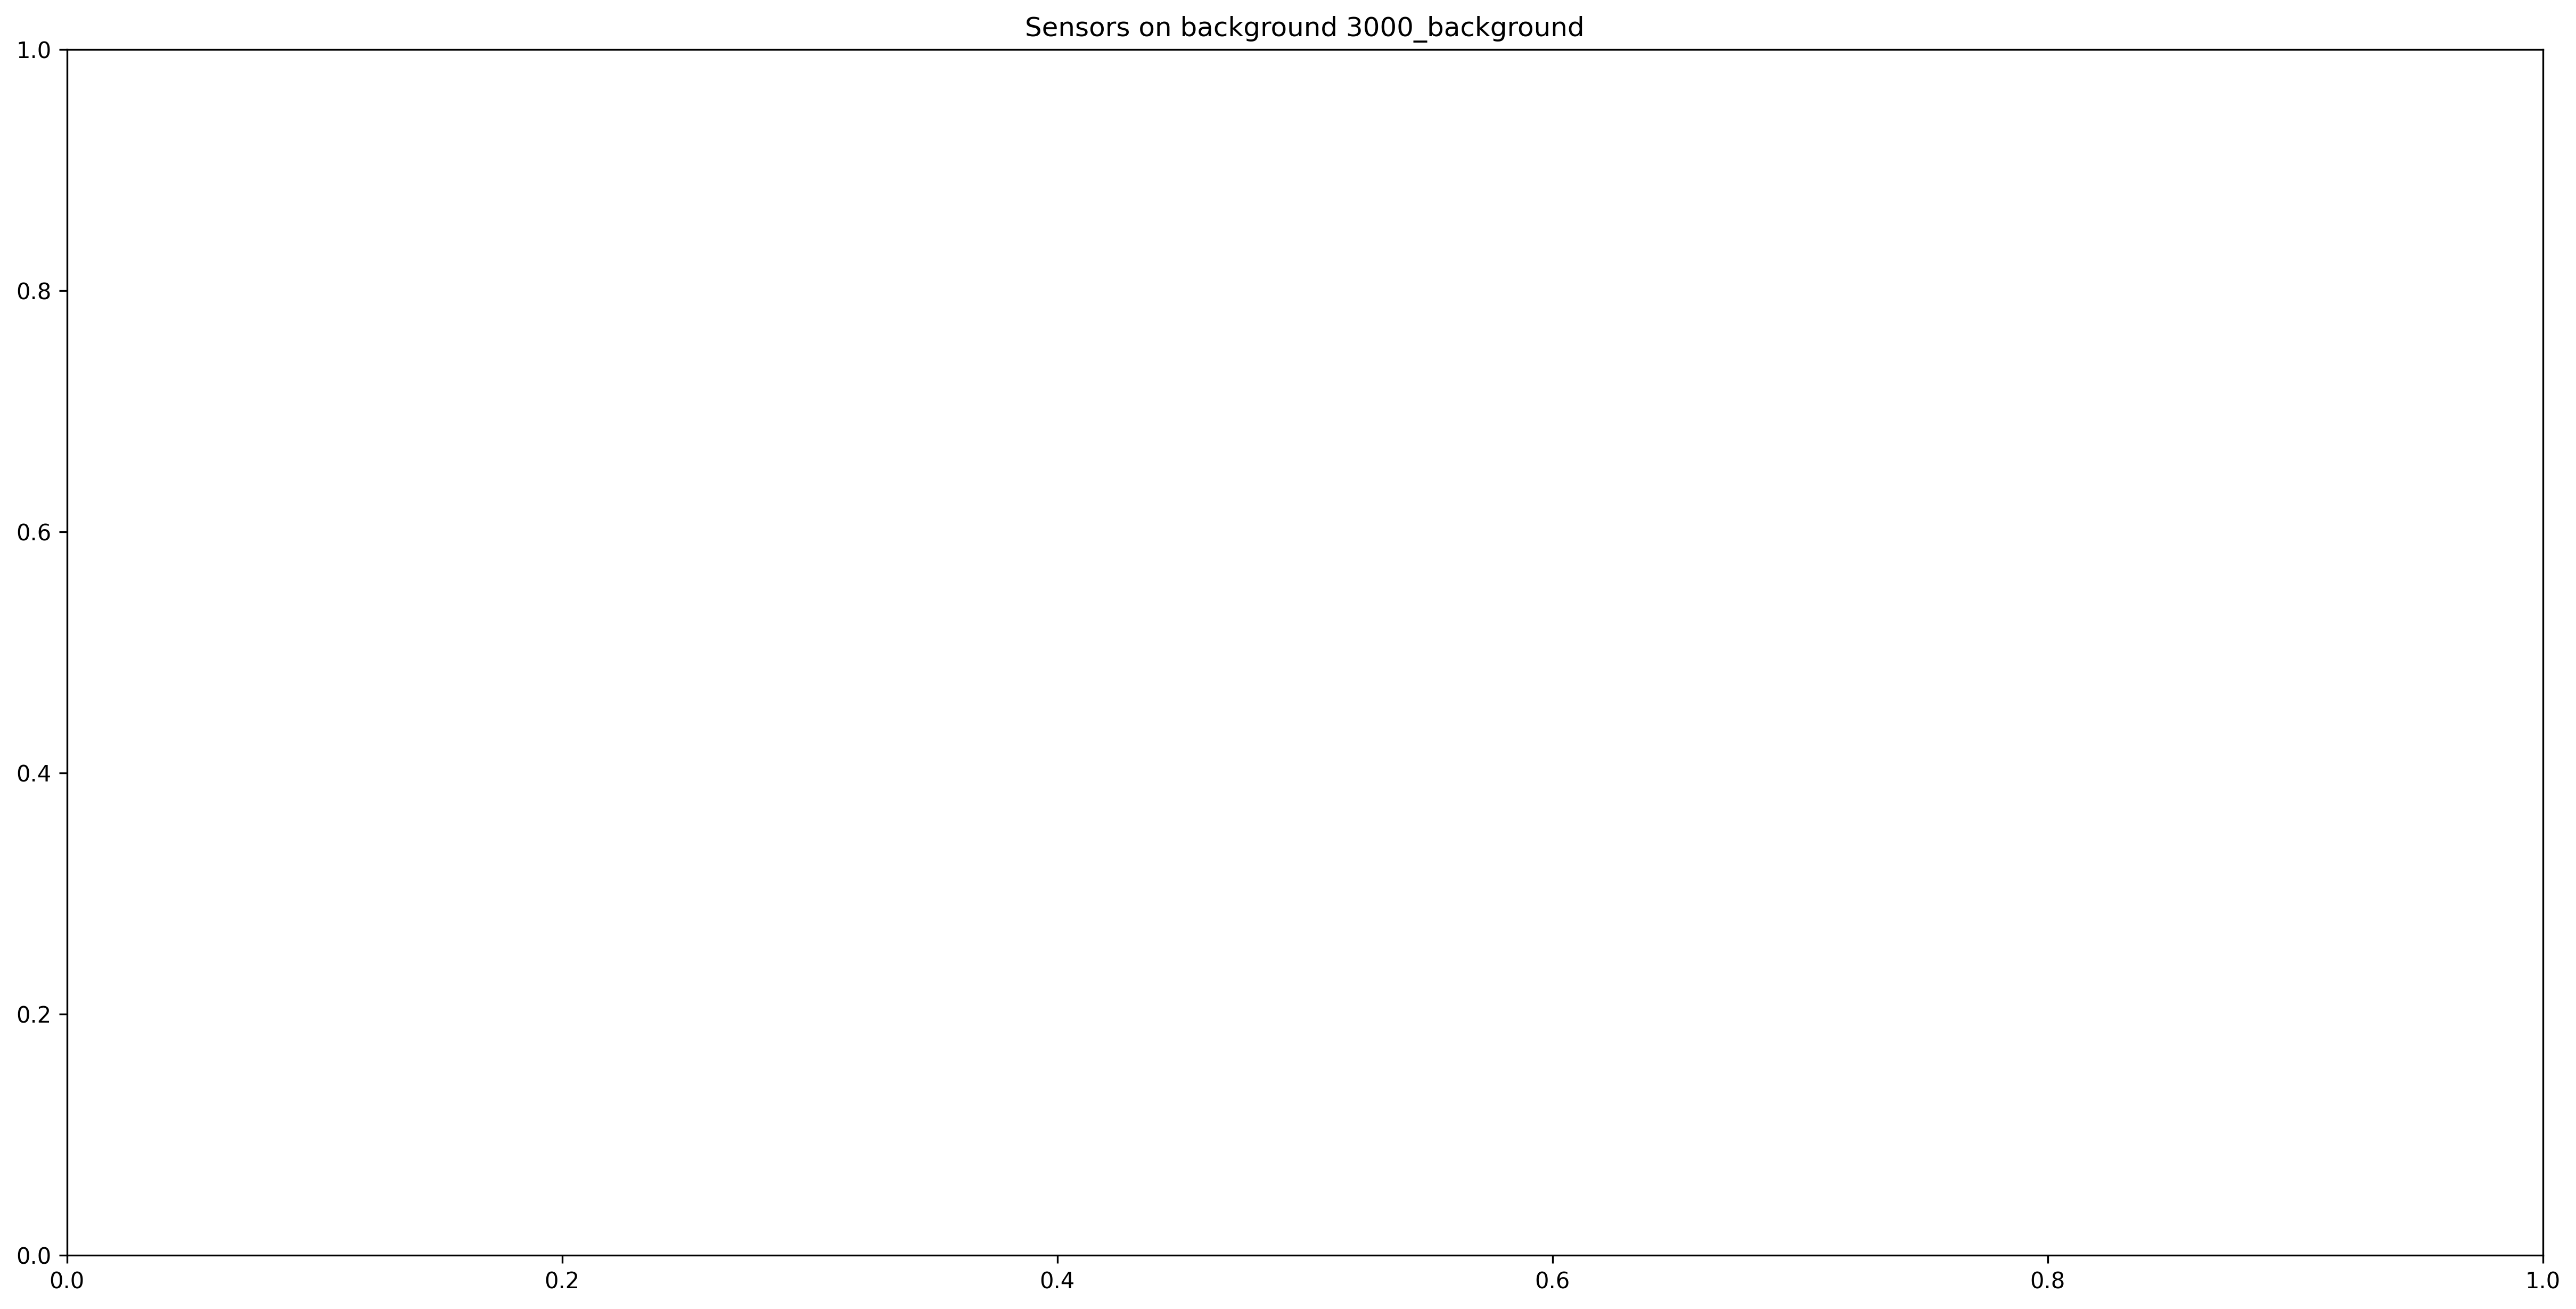

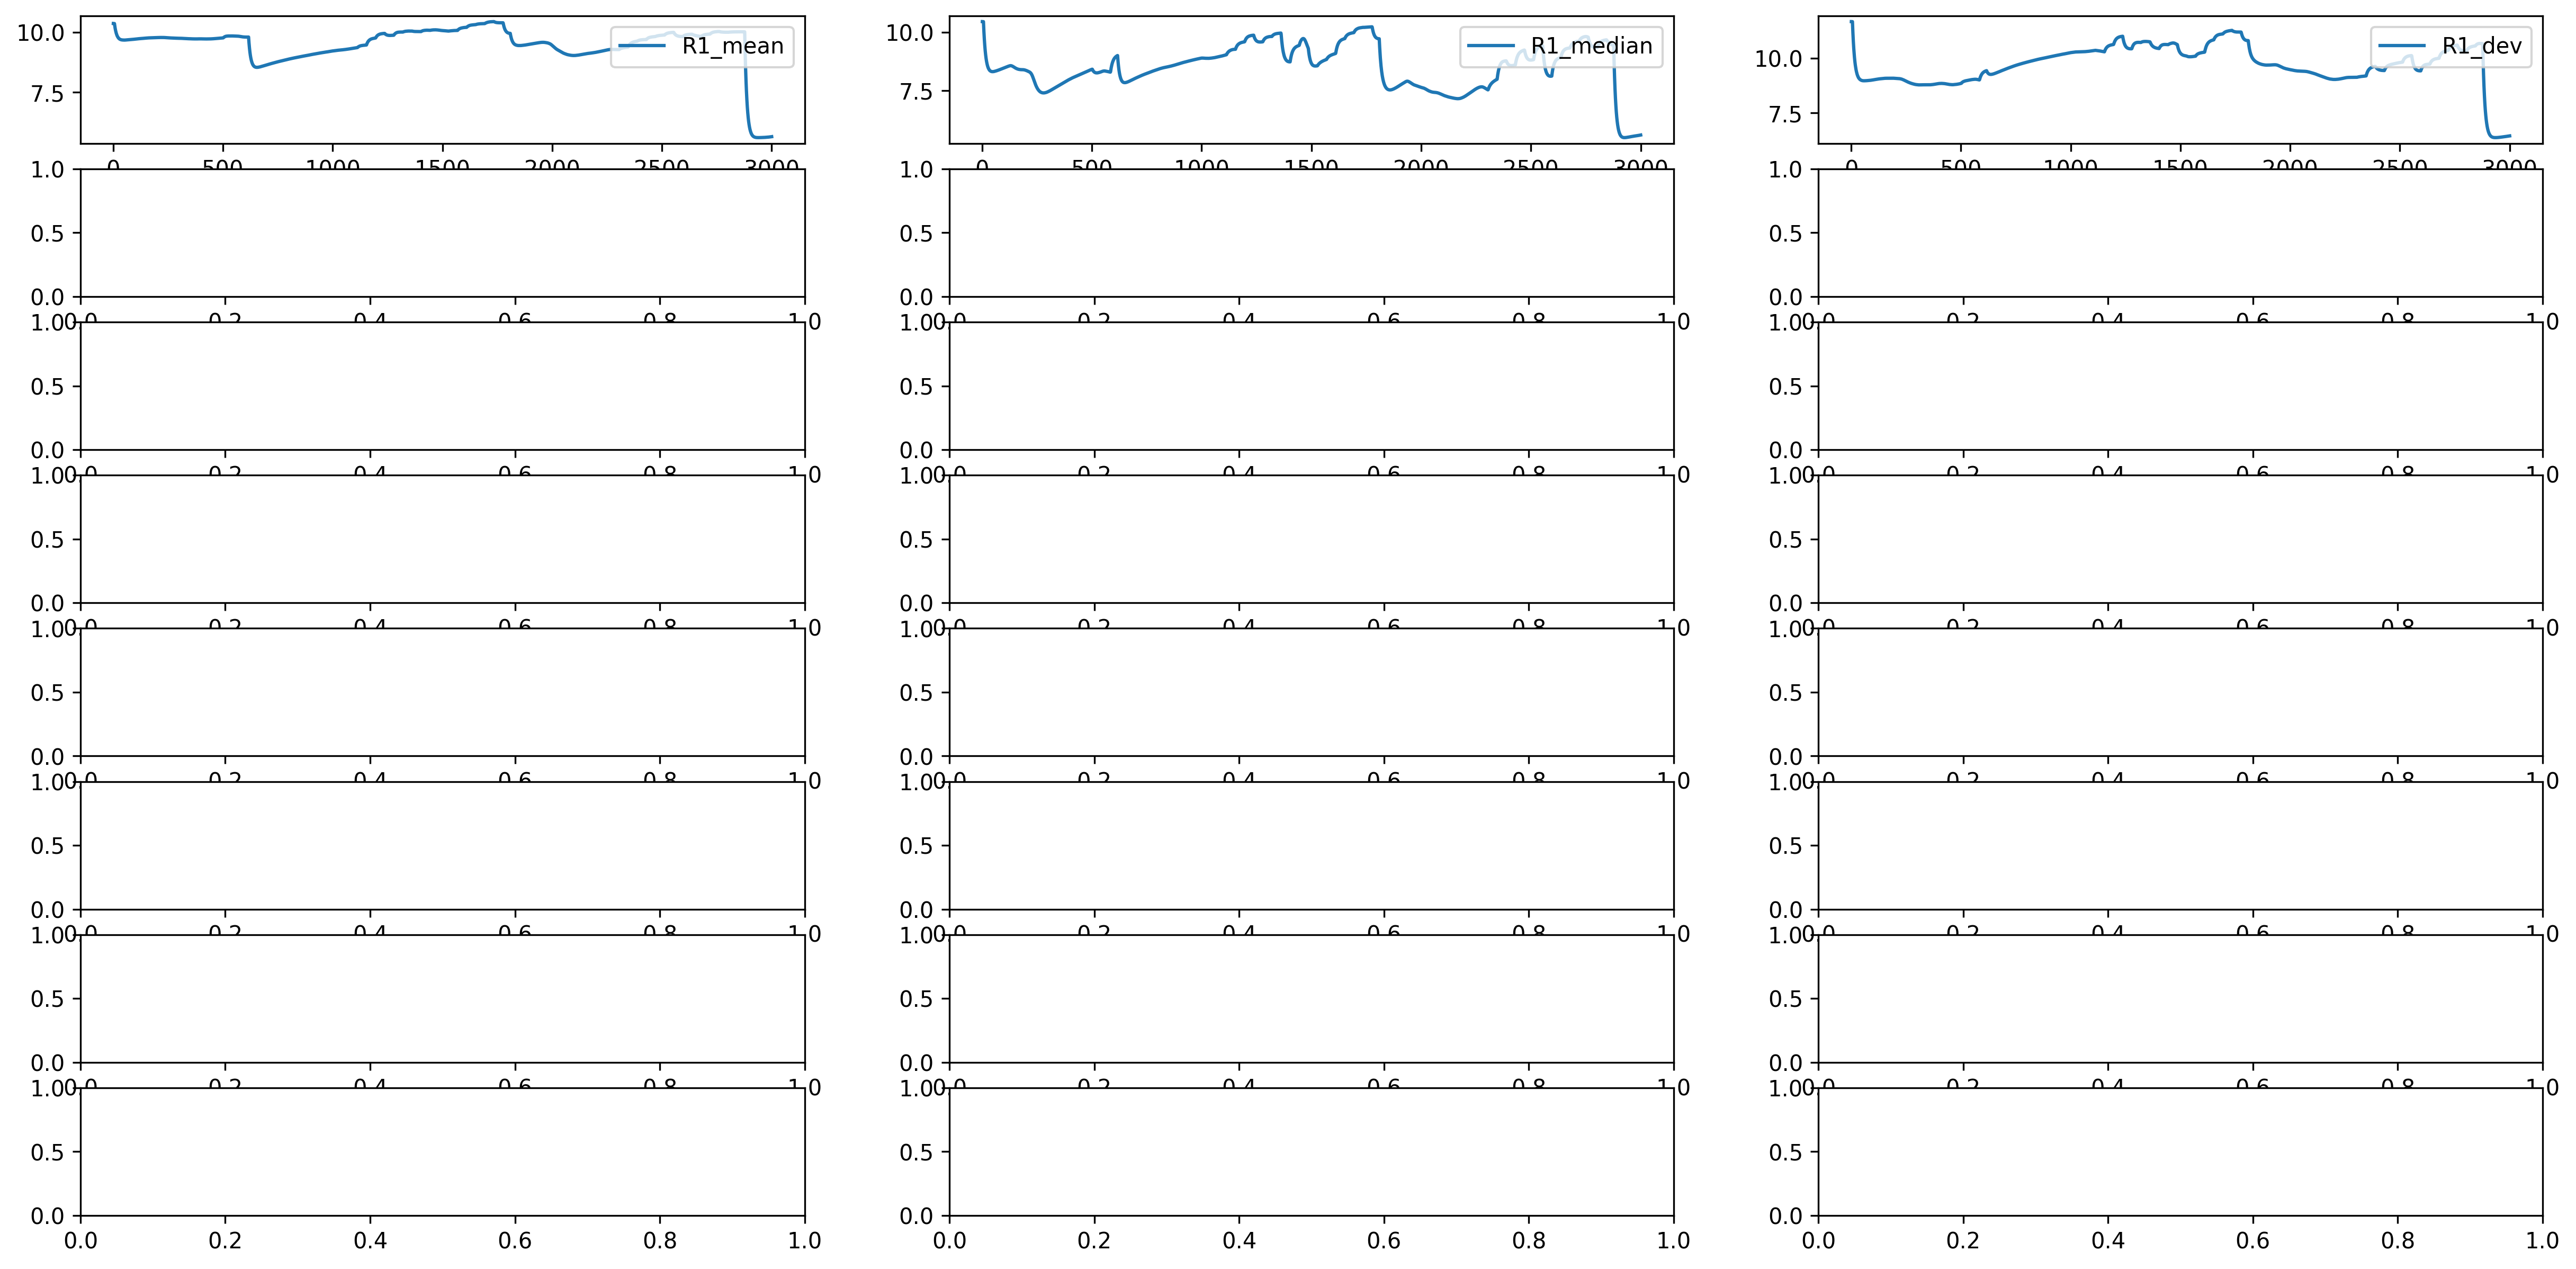

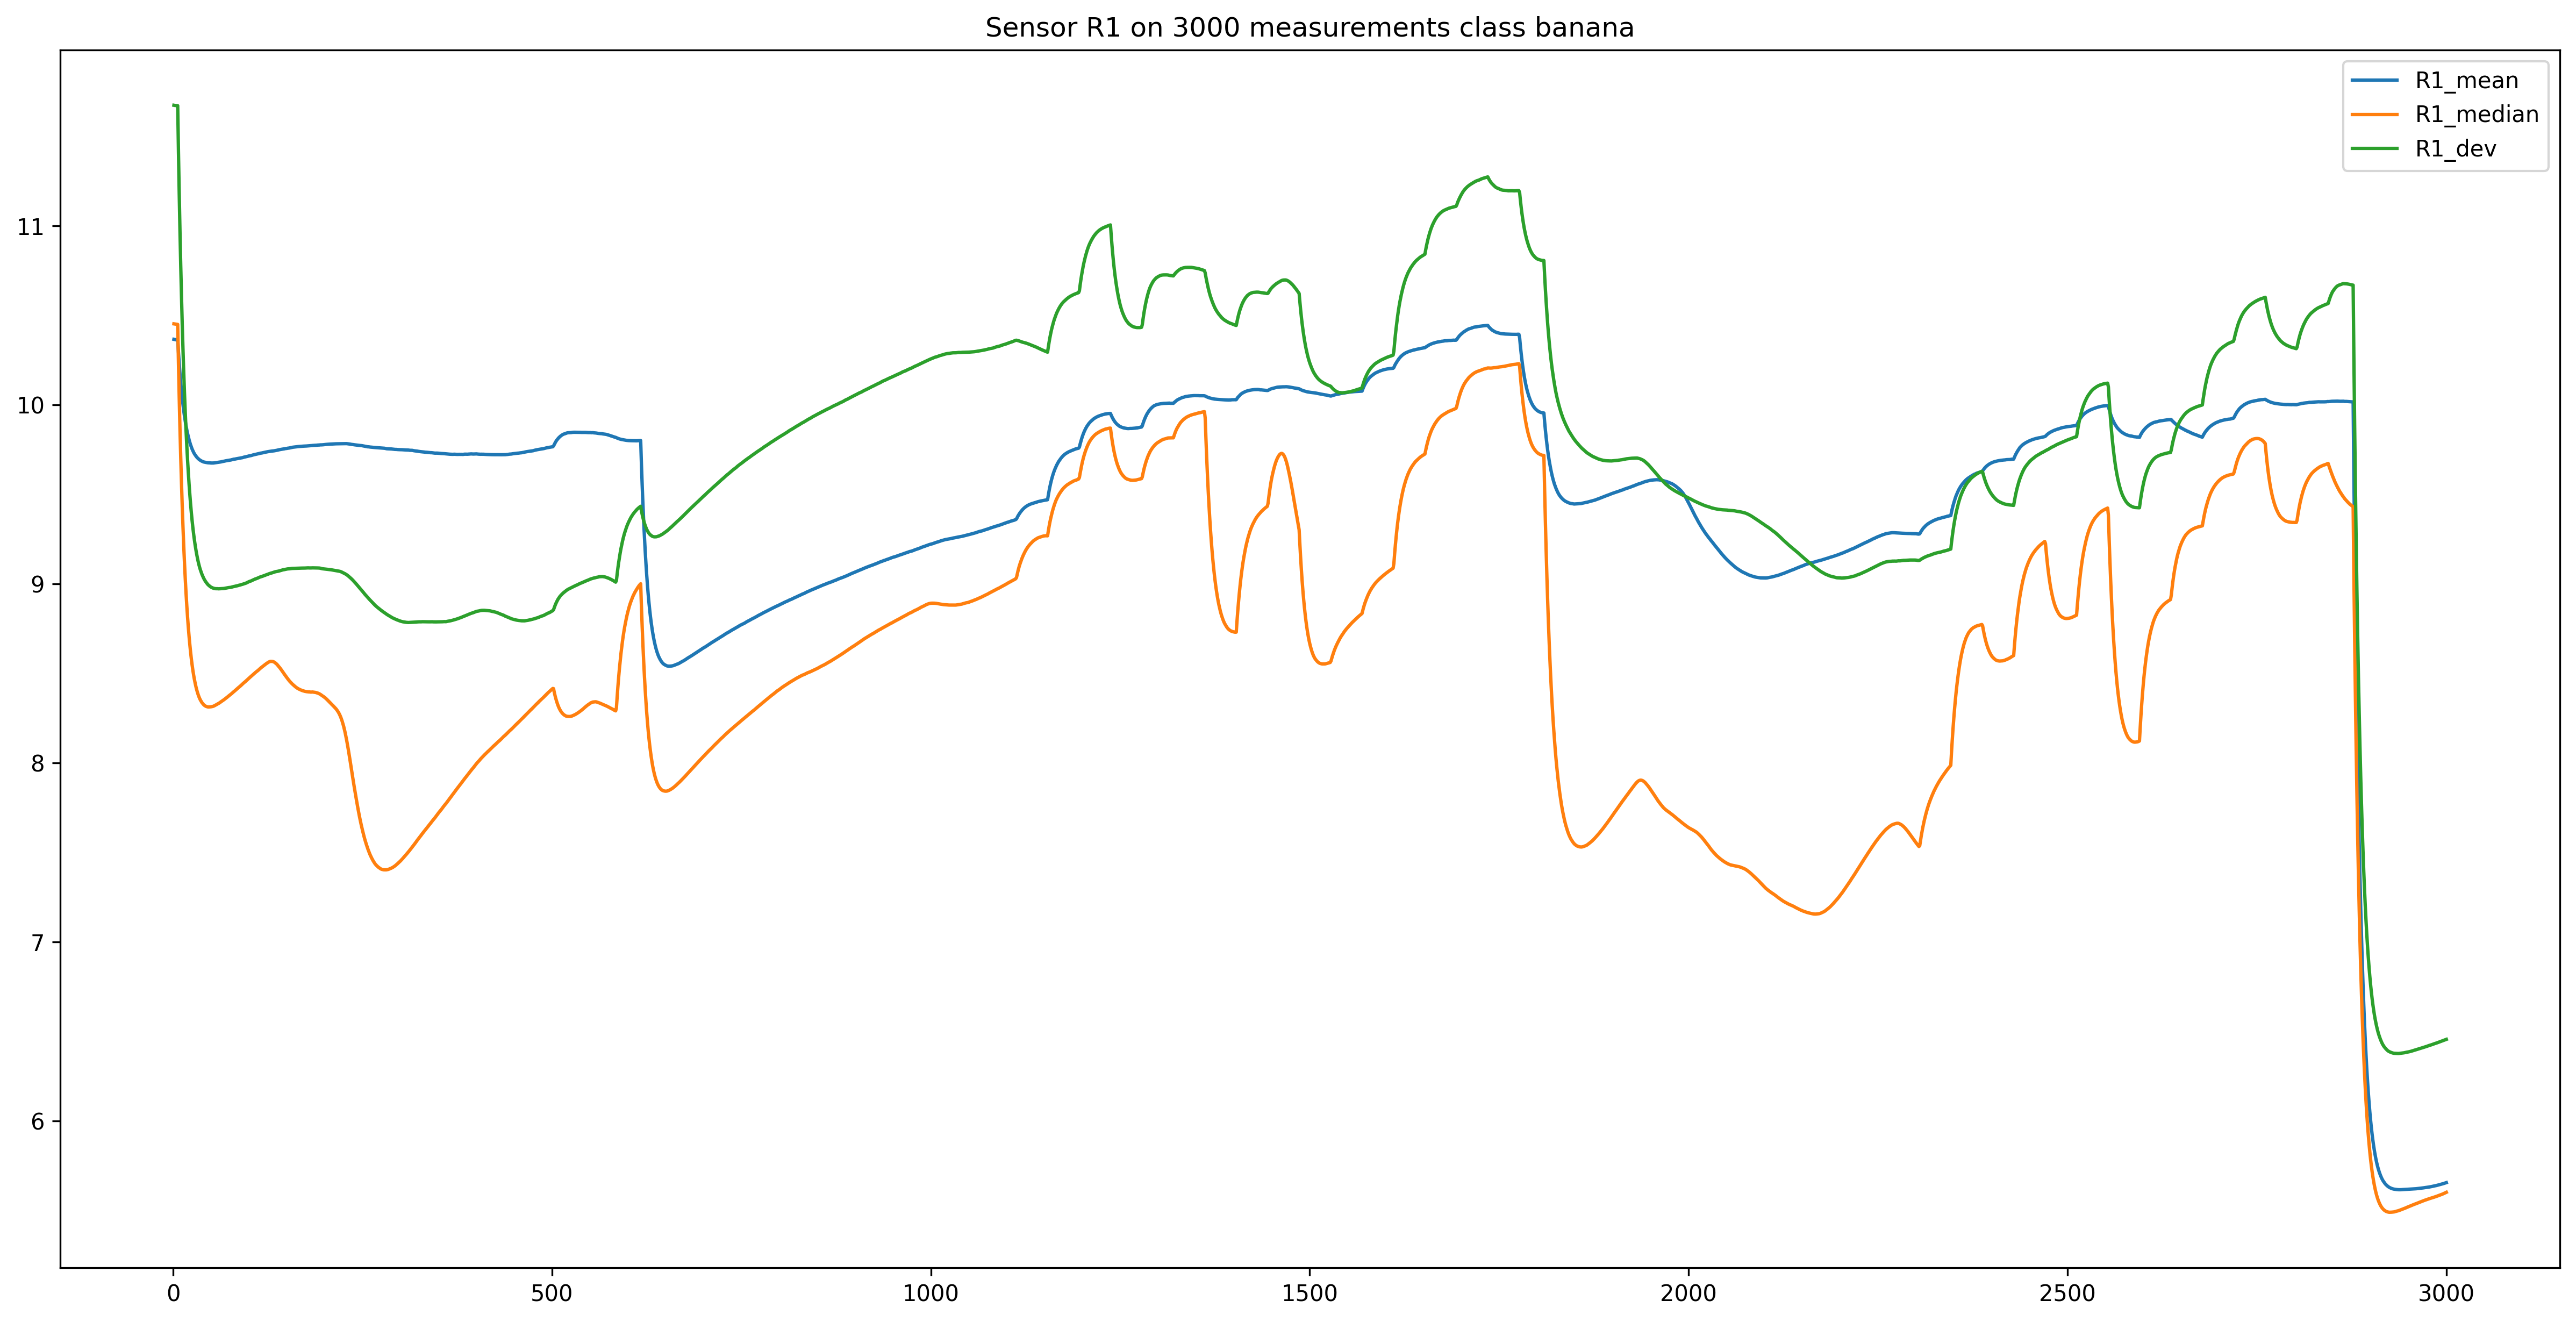

<Figure size 6000x3000 with 0 Axes>

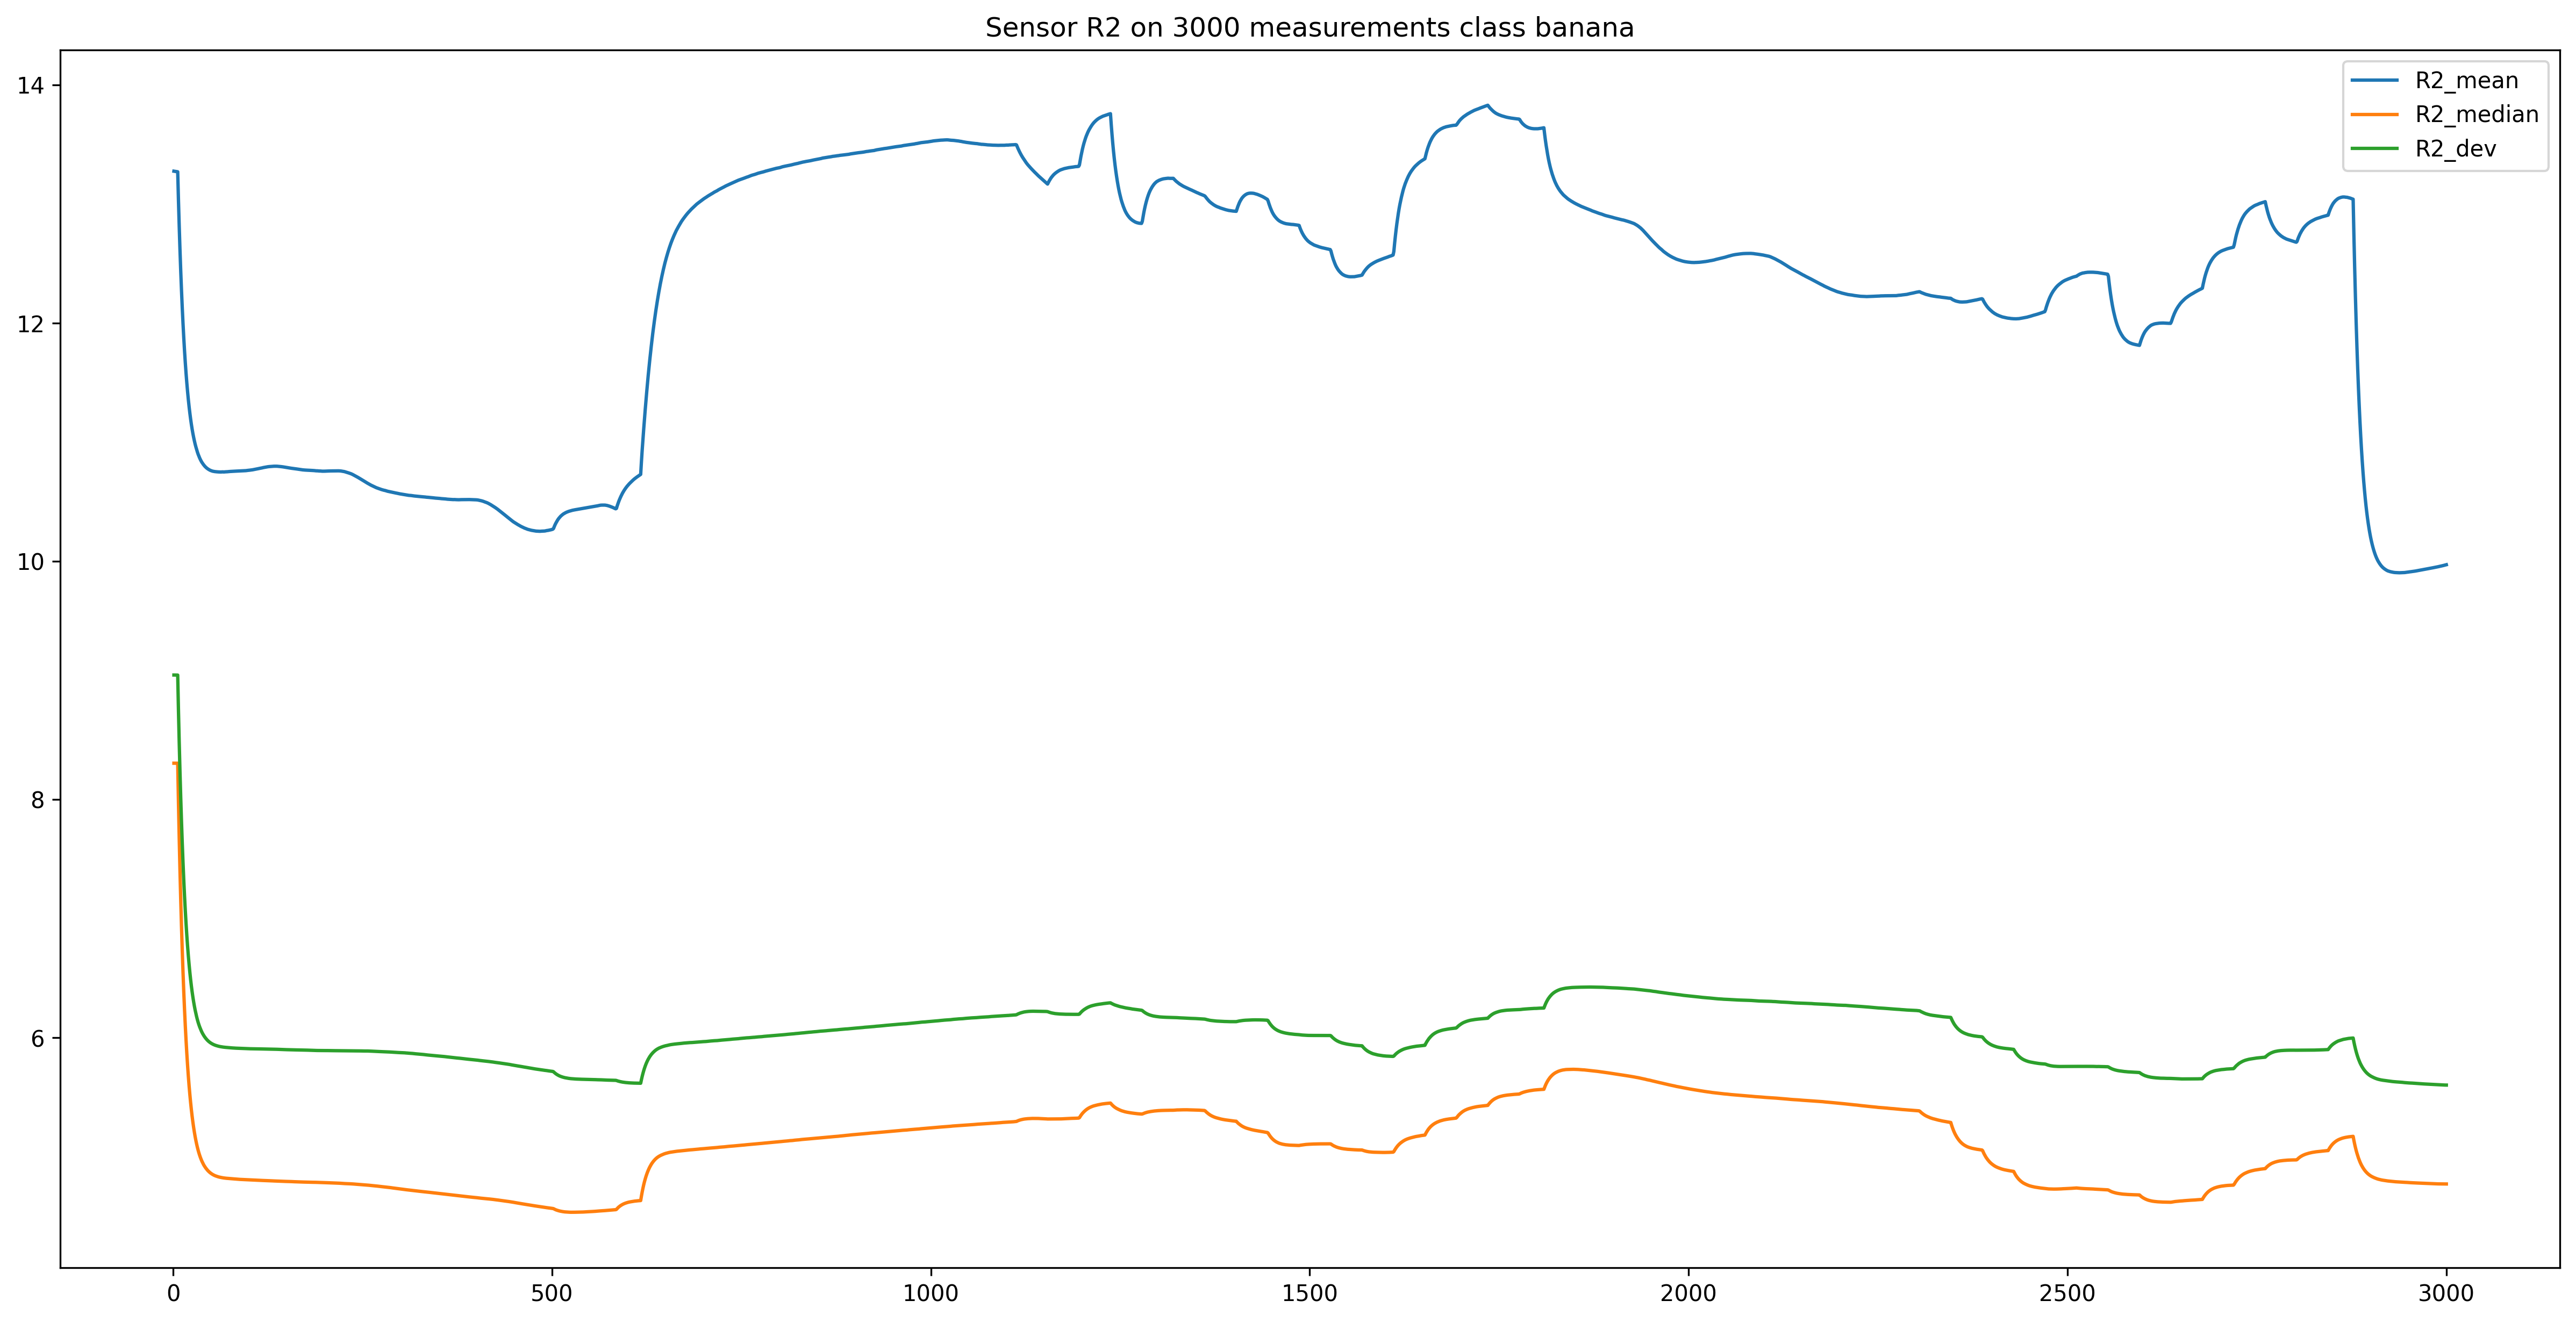

<Figure size 6000x3000 with 0 Axes>

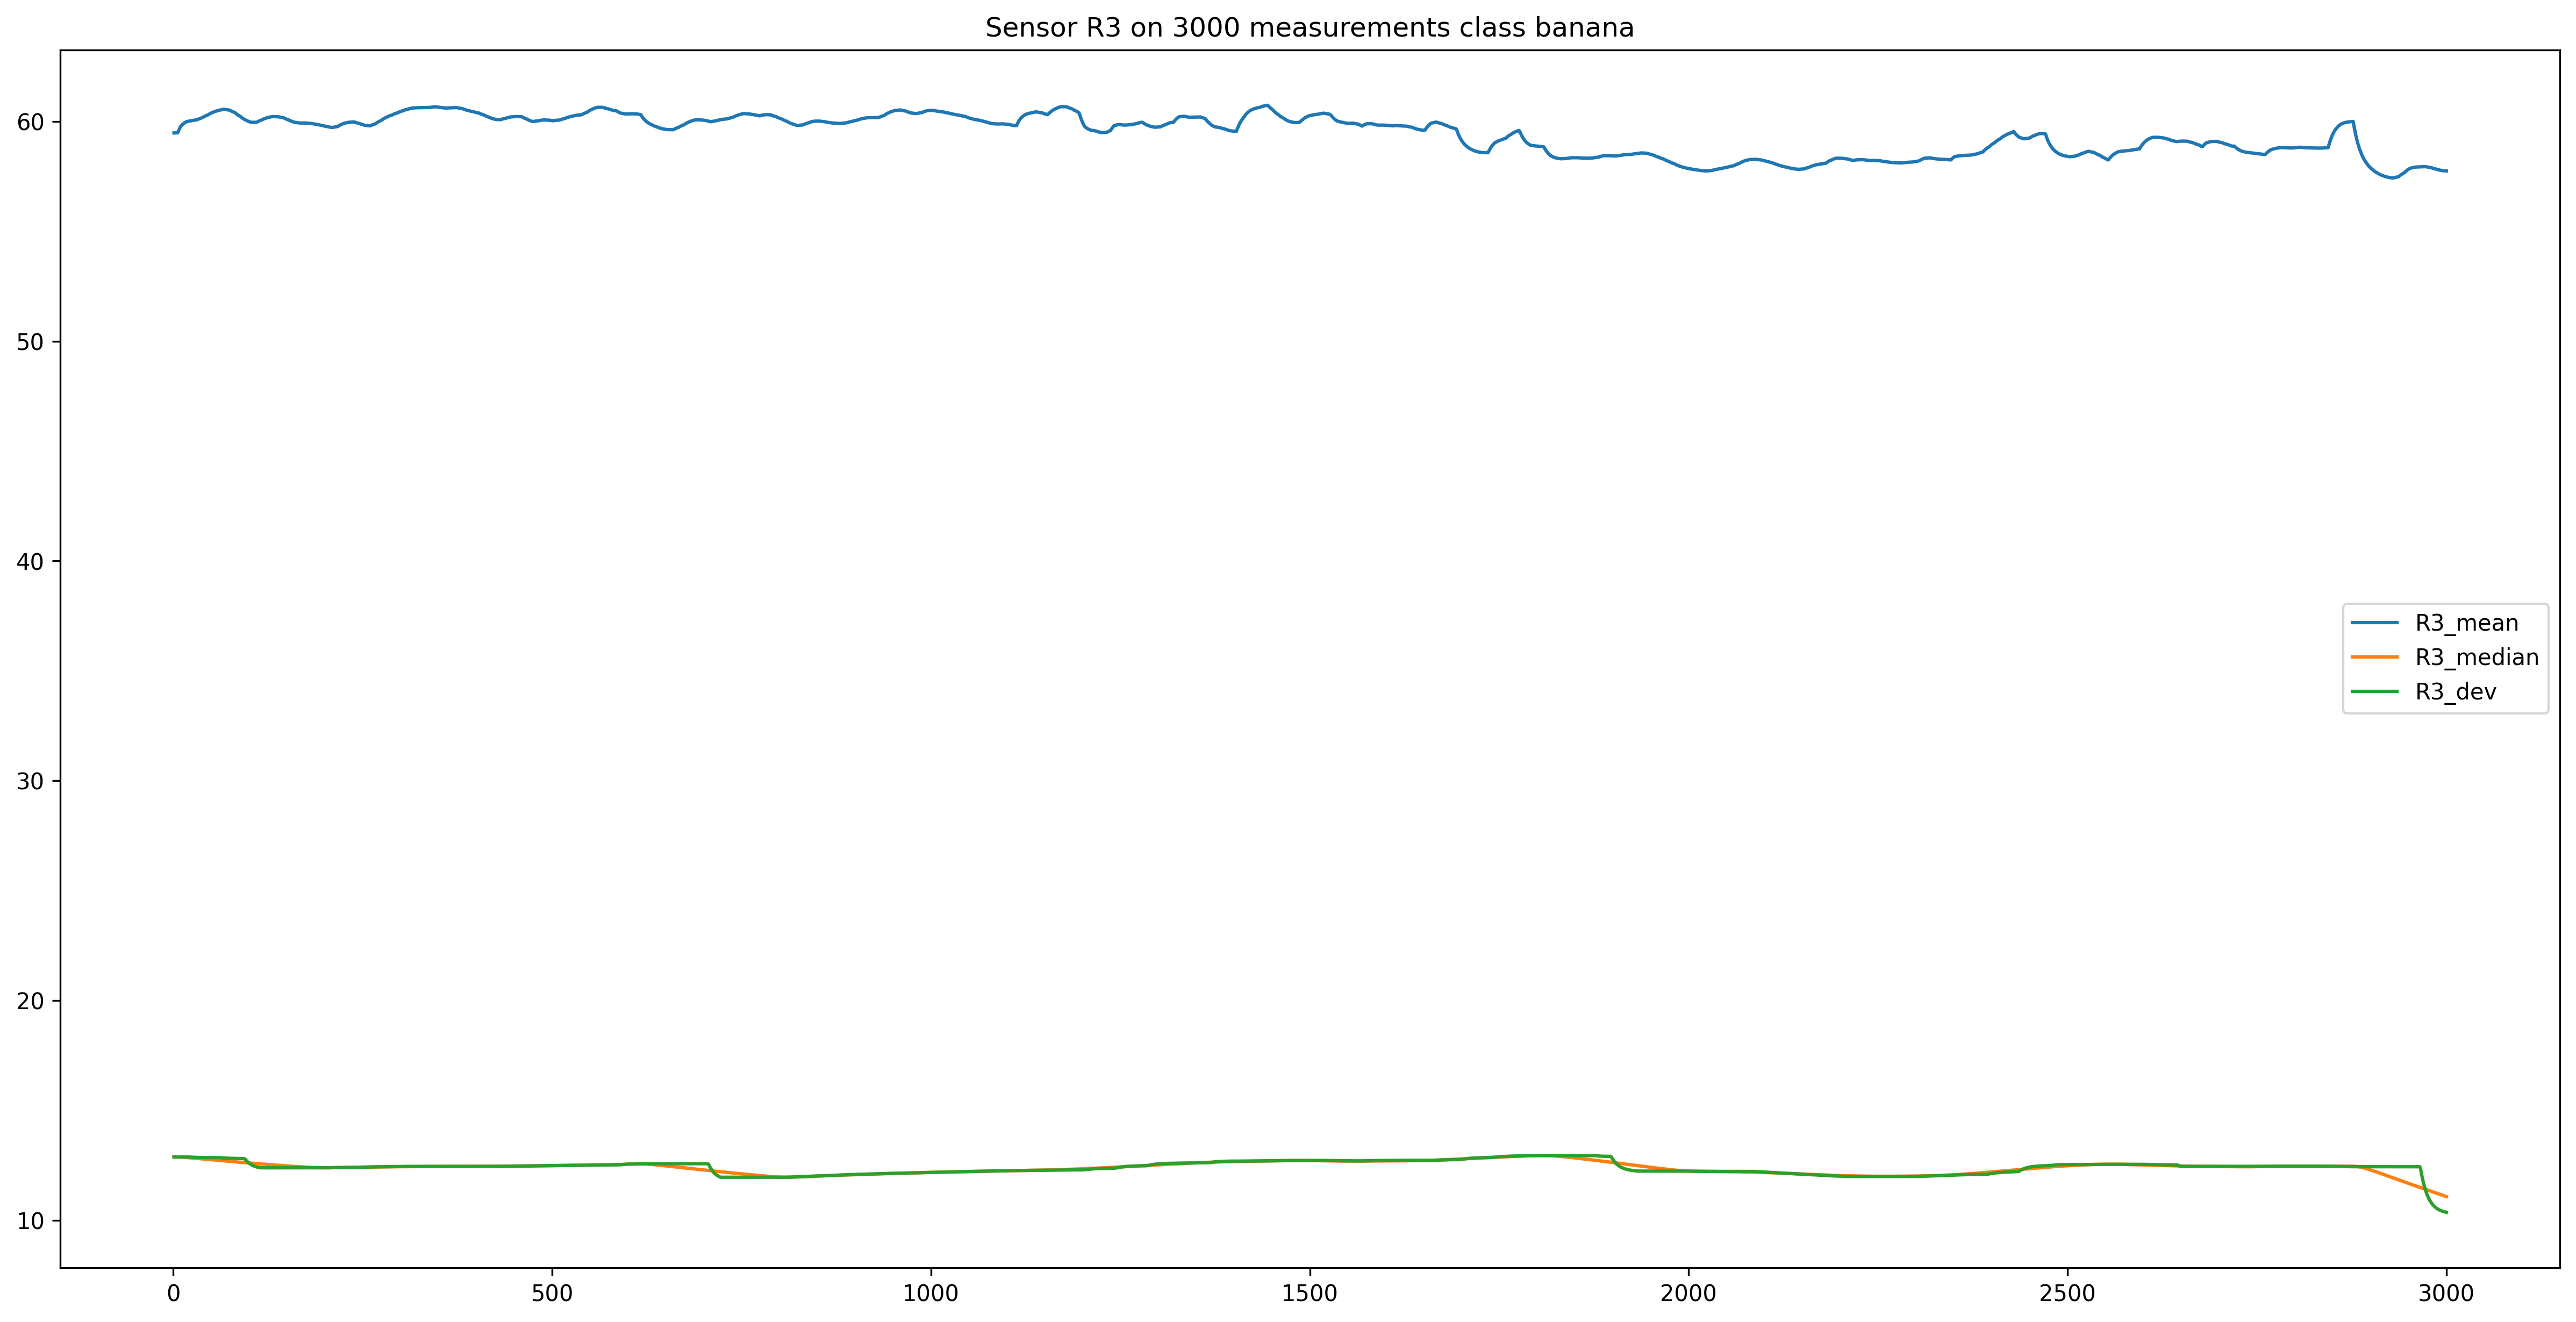

<Figure size 6000x3000 with 0 Axes>

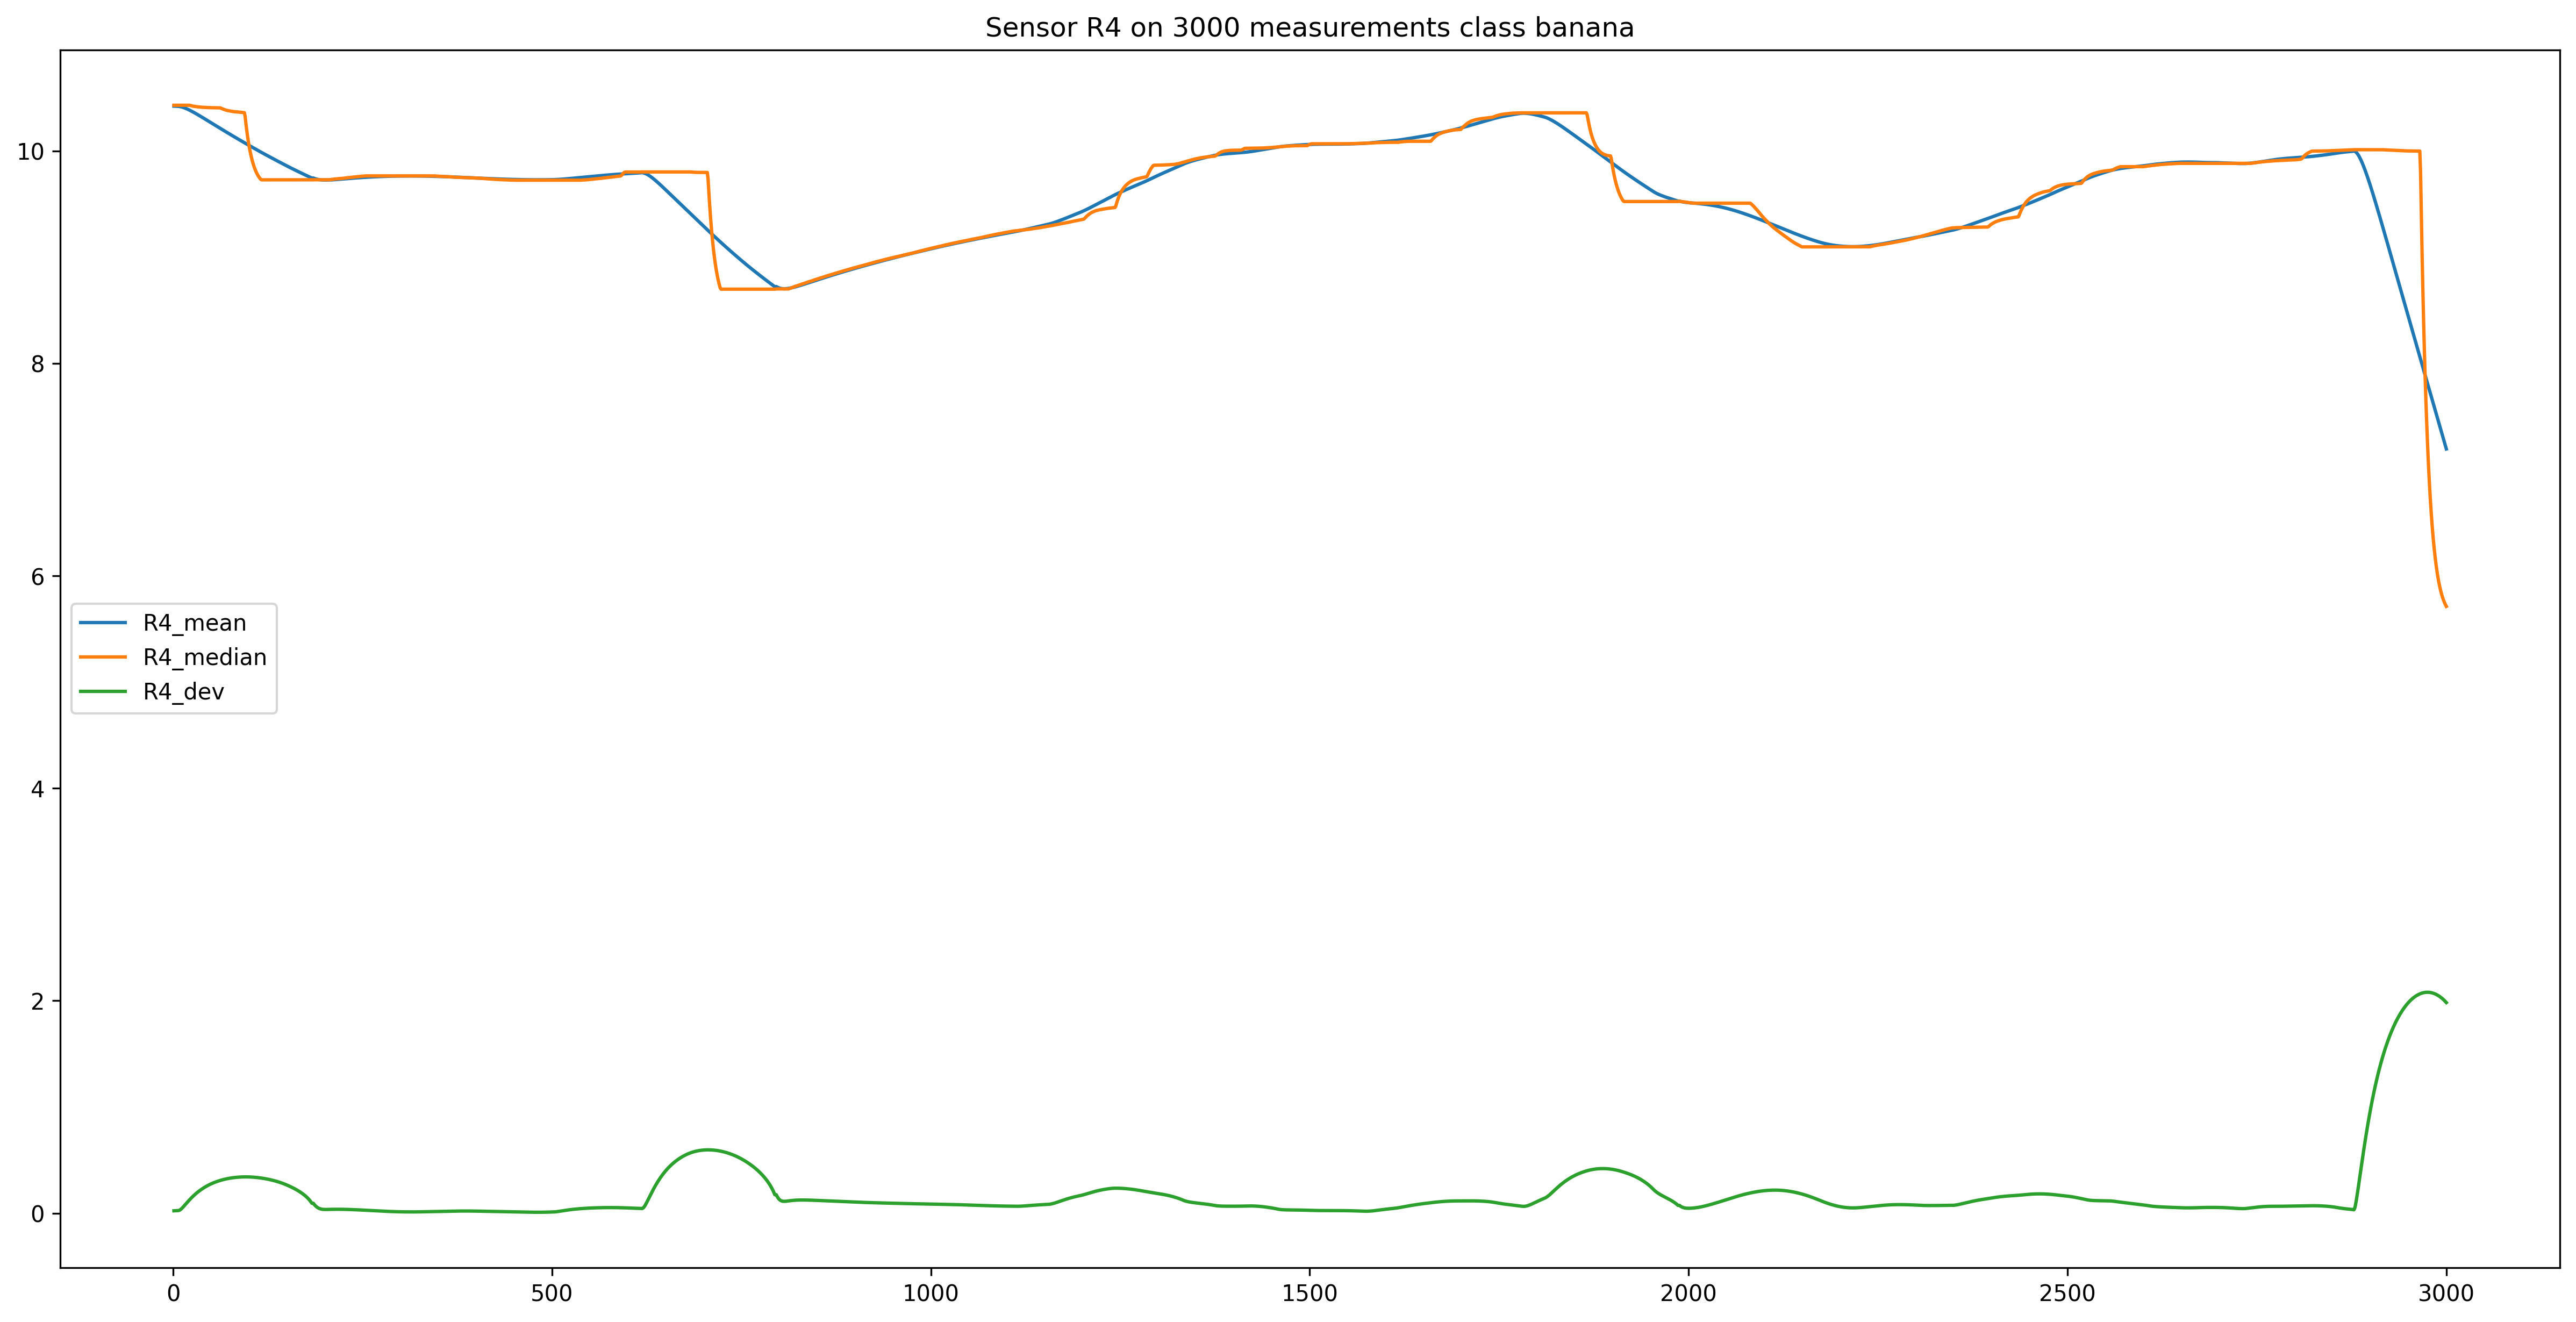

<Figure size 6000x3000 with 0 Axes>

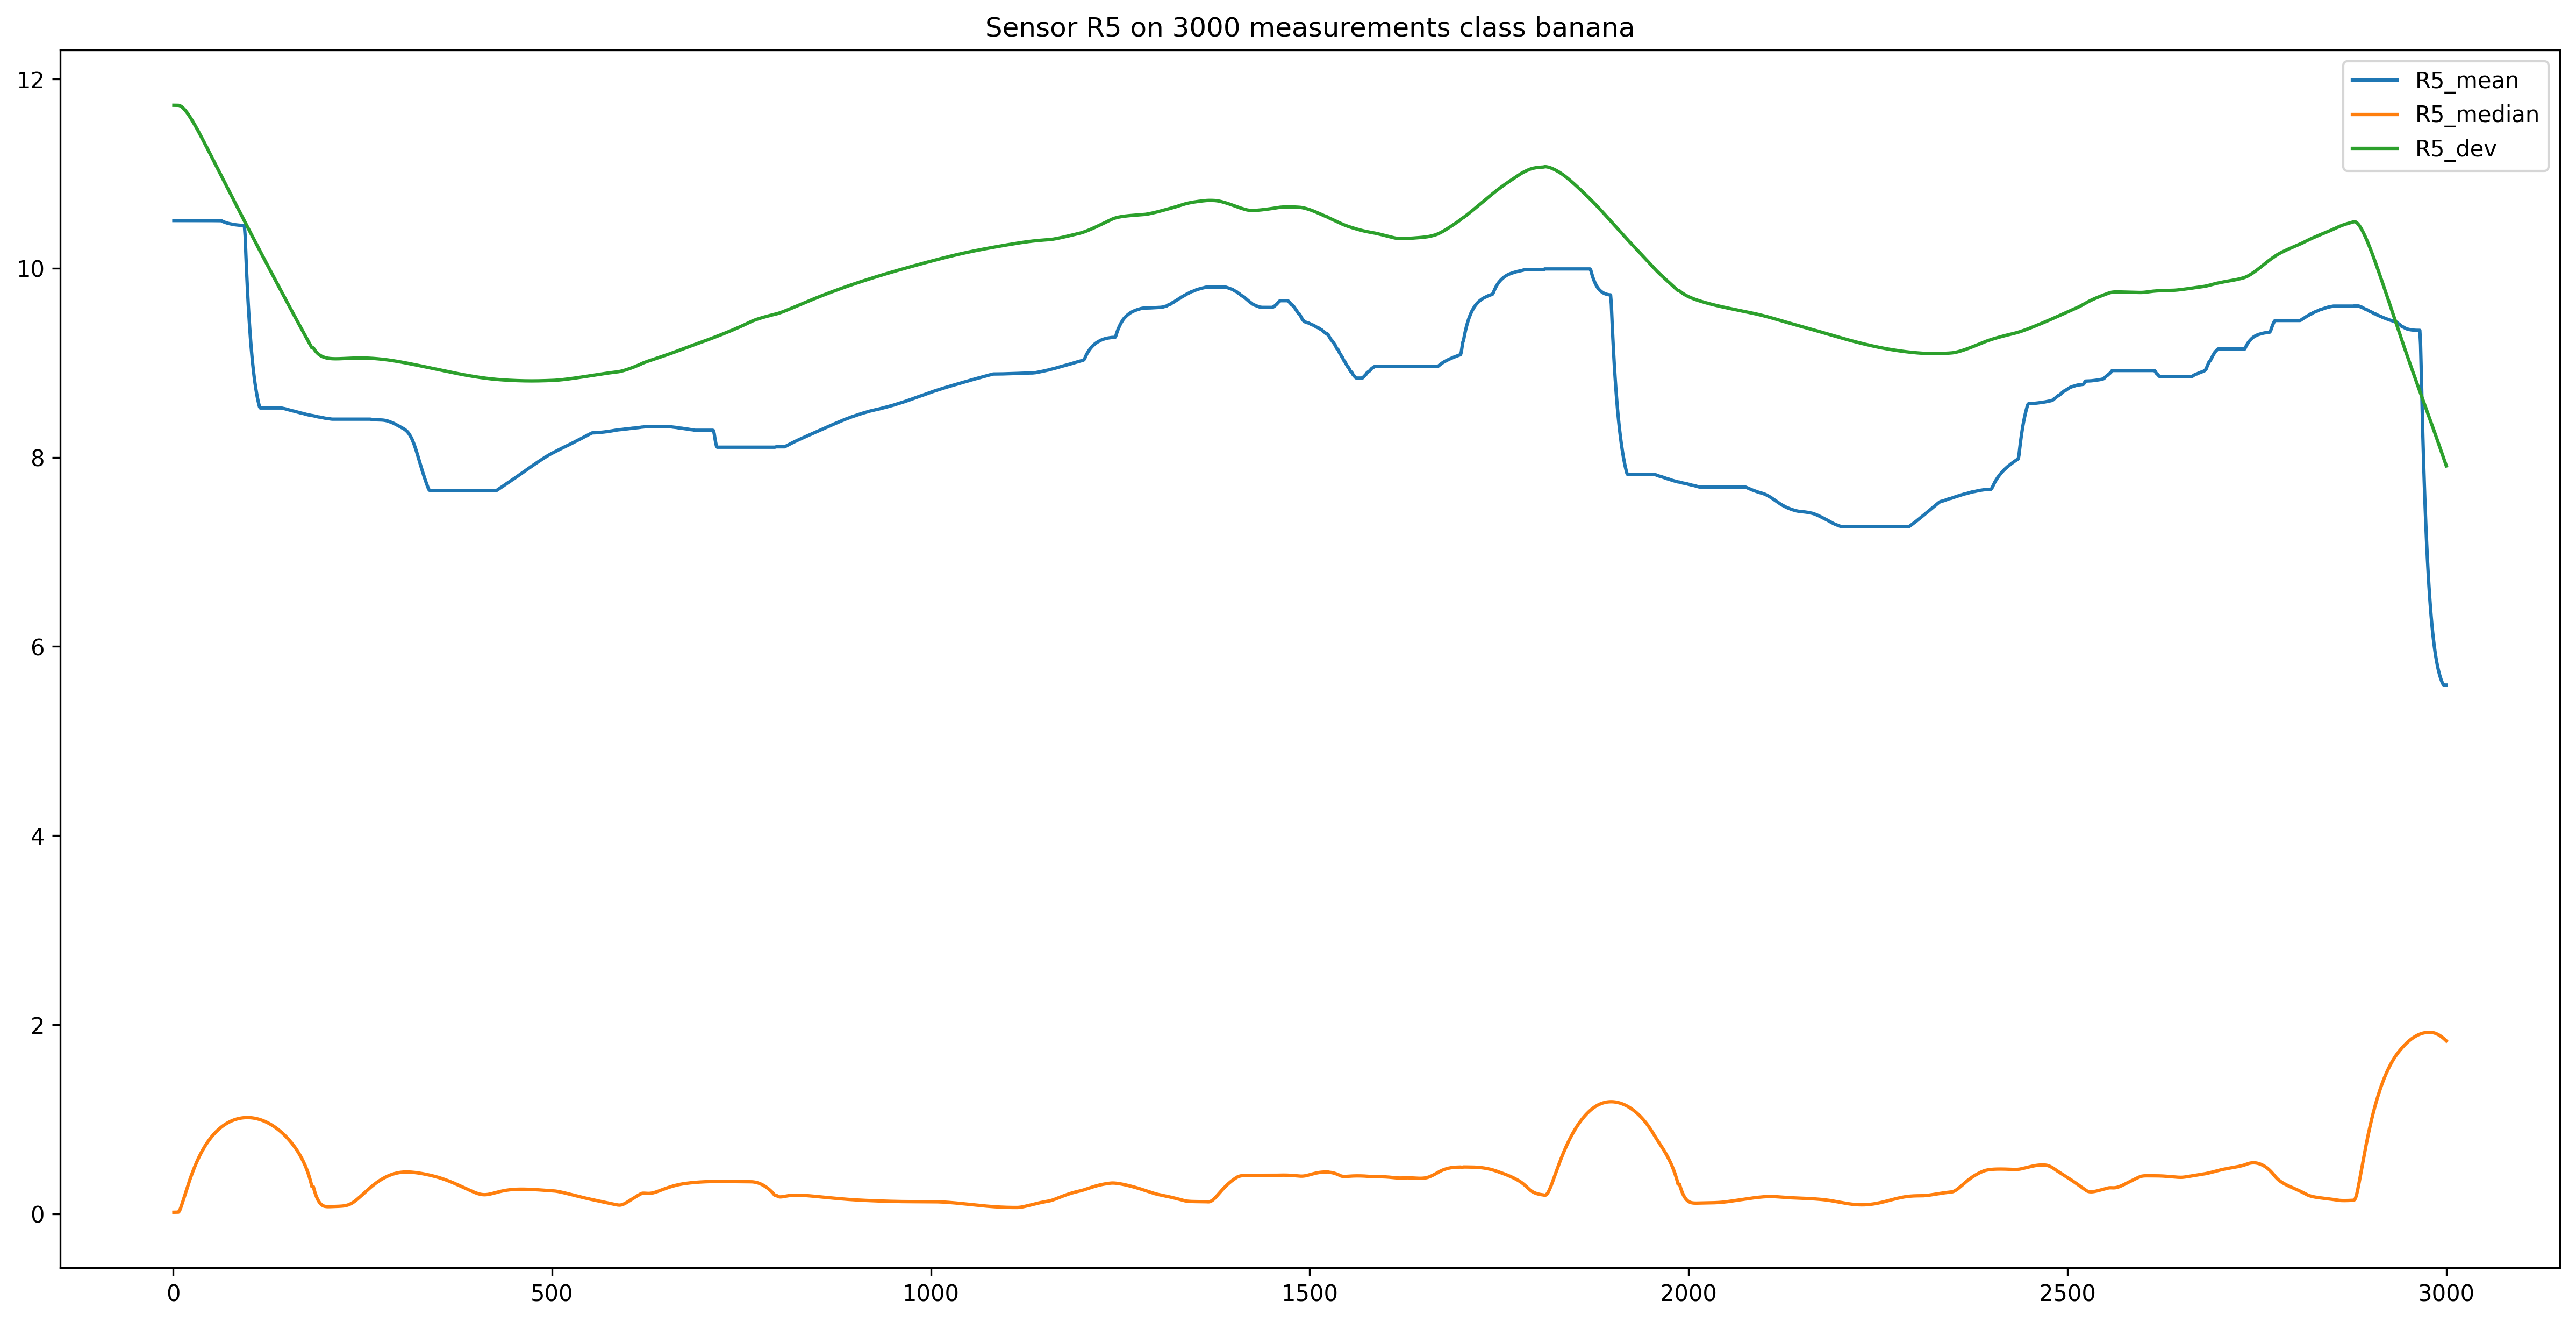

<Figure size 6000x3000 with 0 Axes>

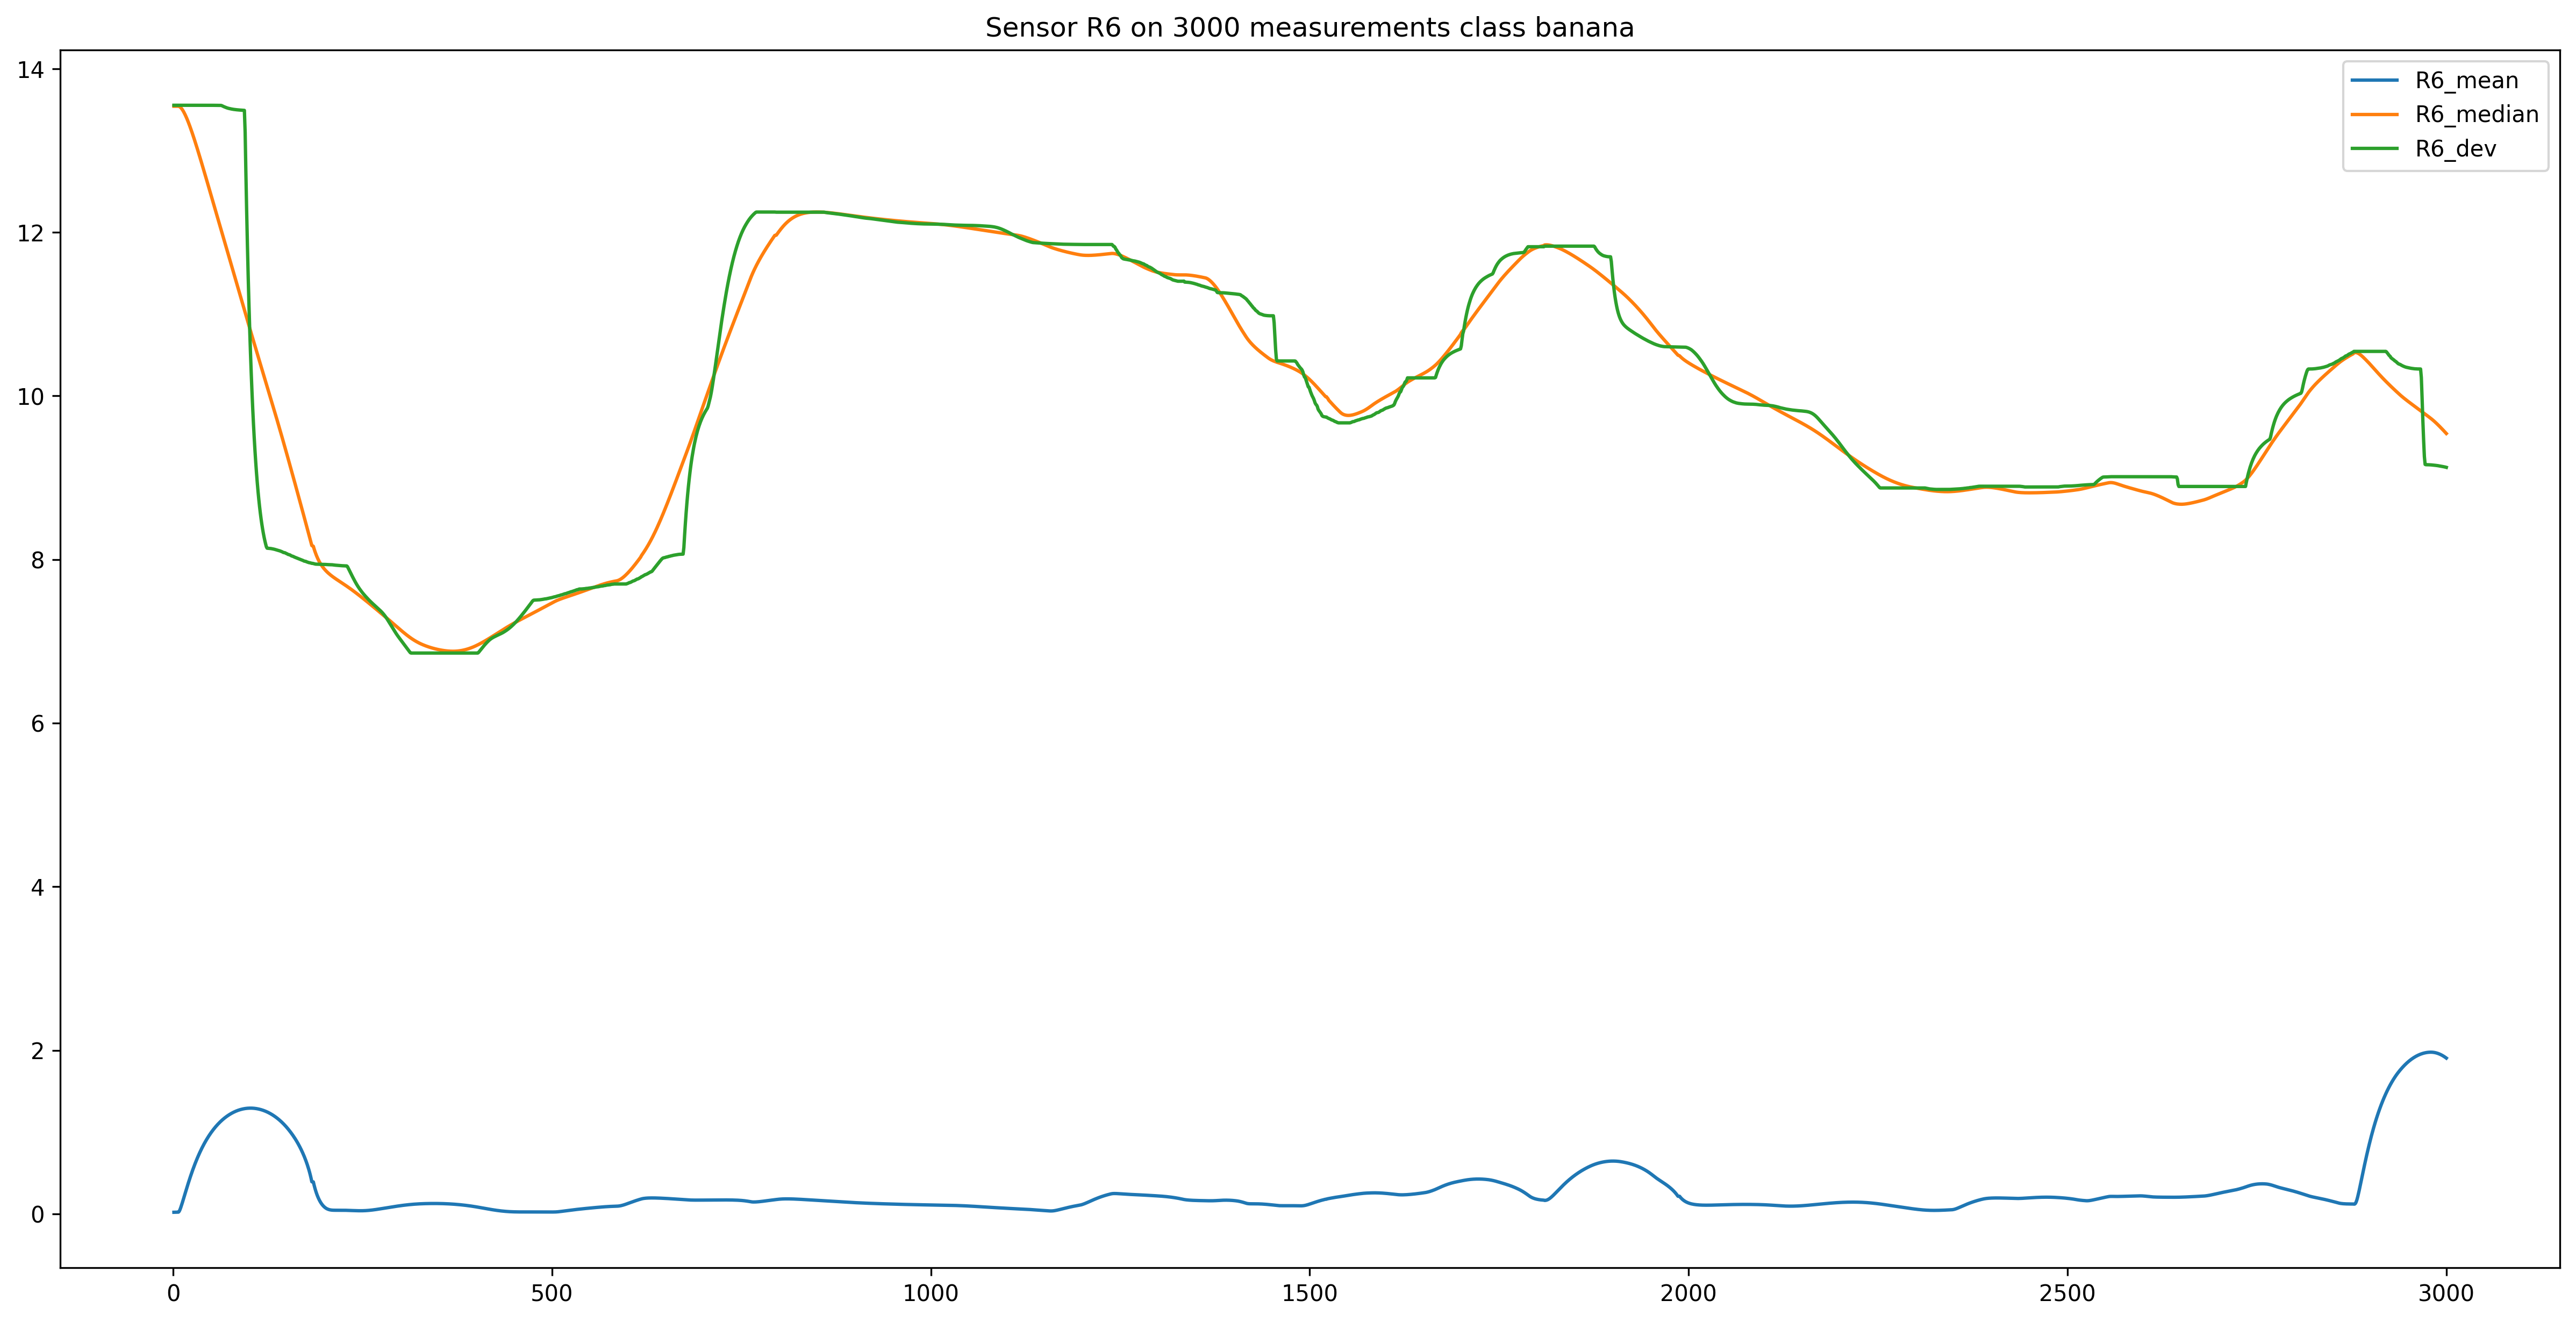

<Figure size 6000x3000 with 0 Axes>

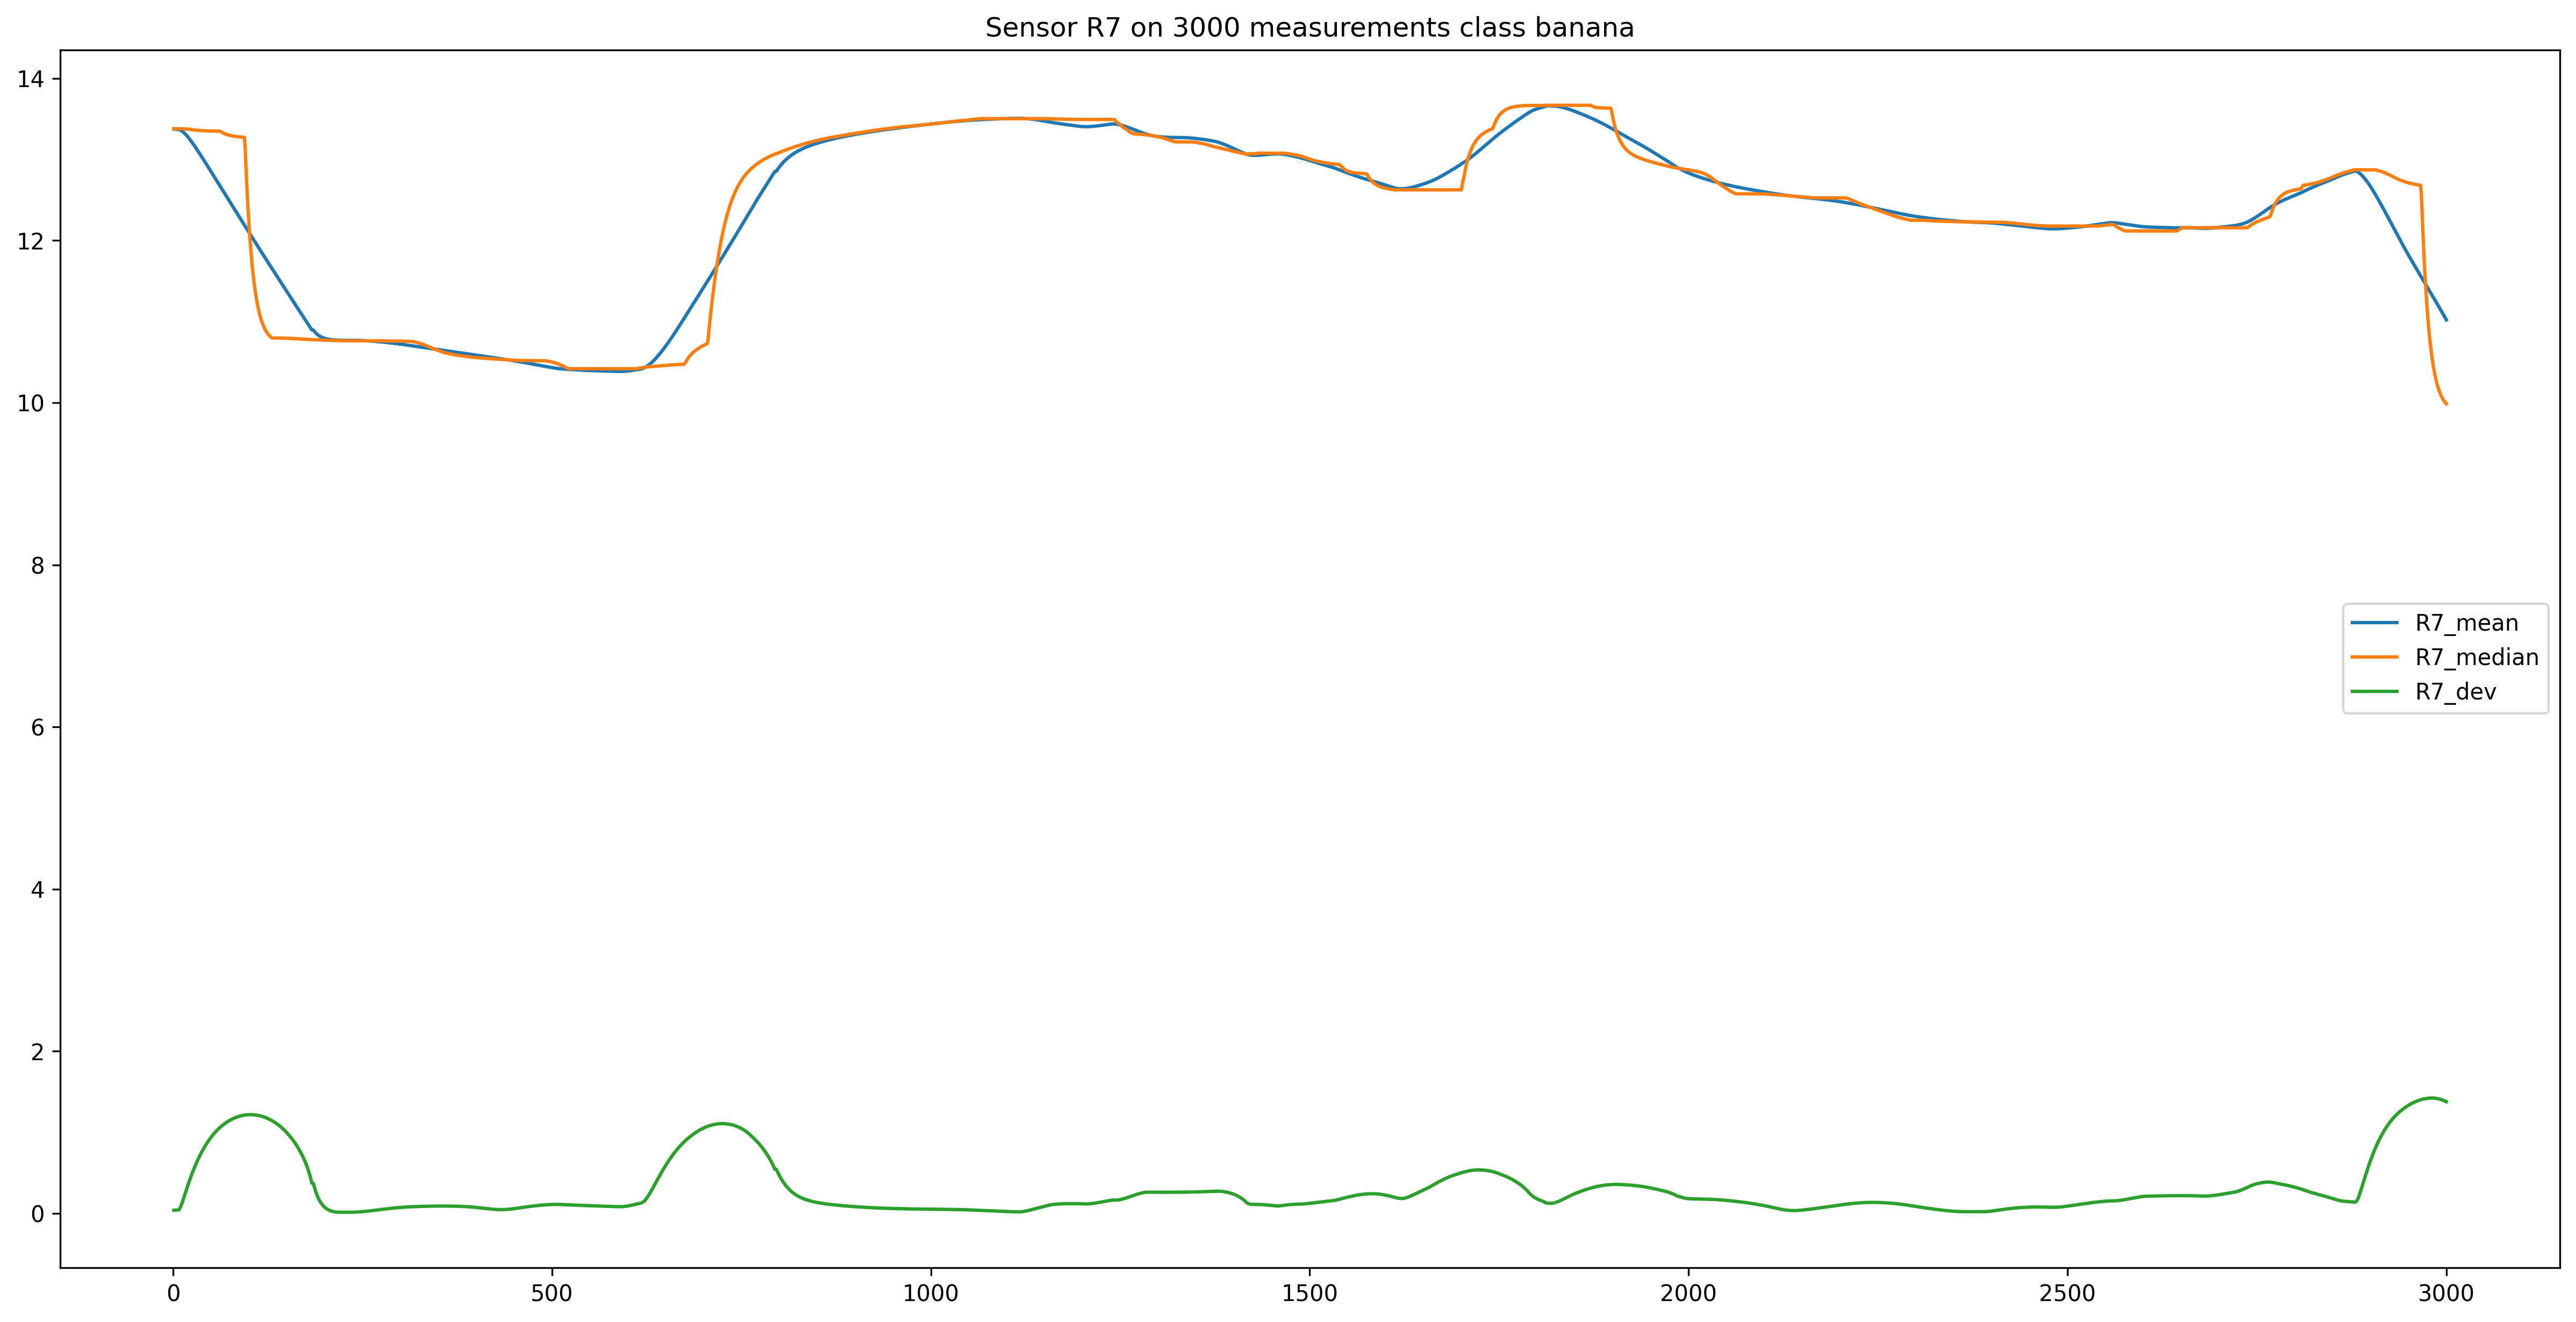

<Figure size 6000x3000 with 0 Axes>

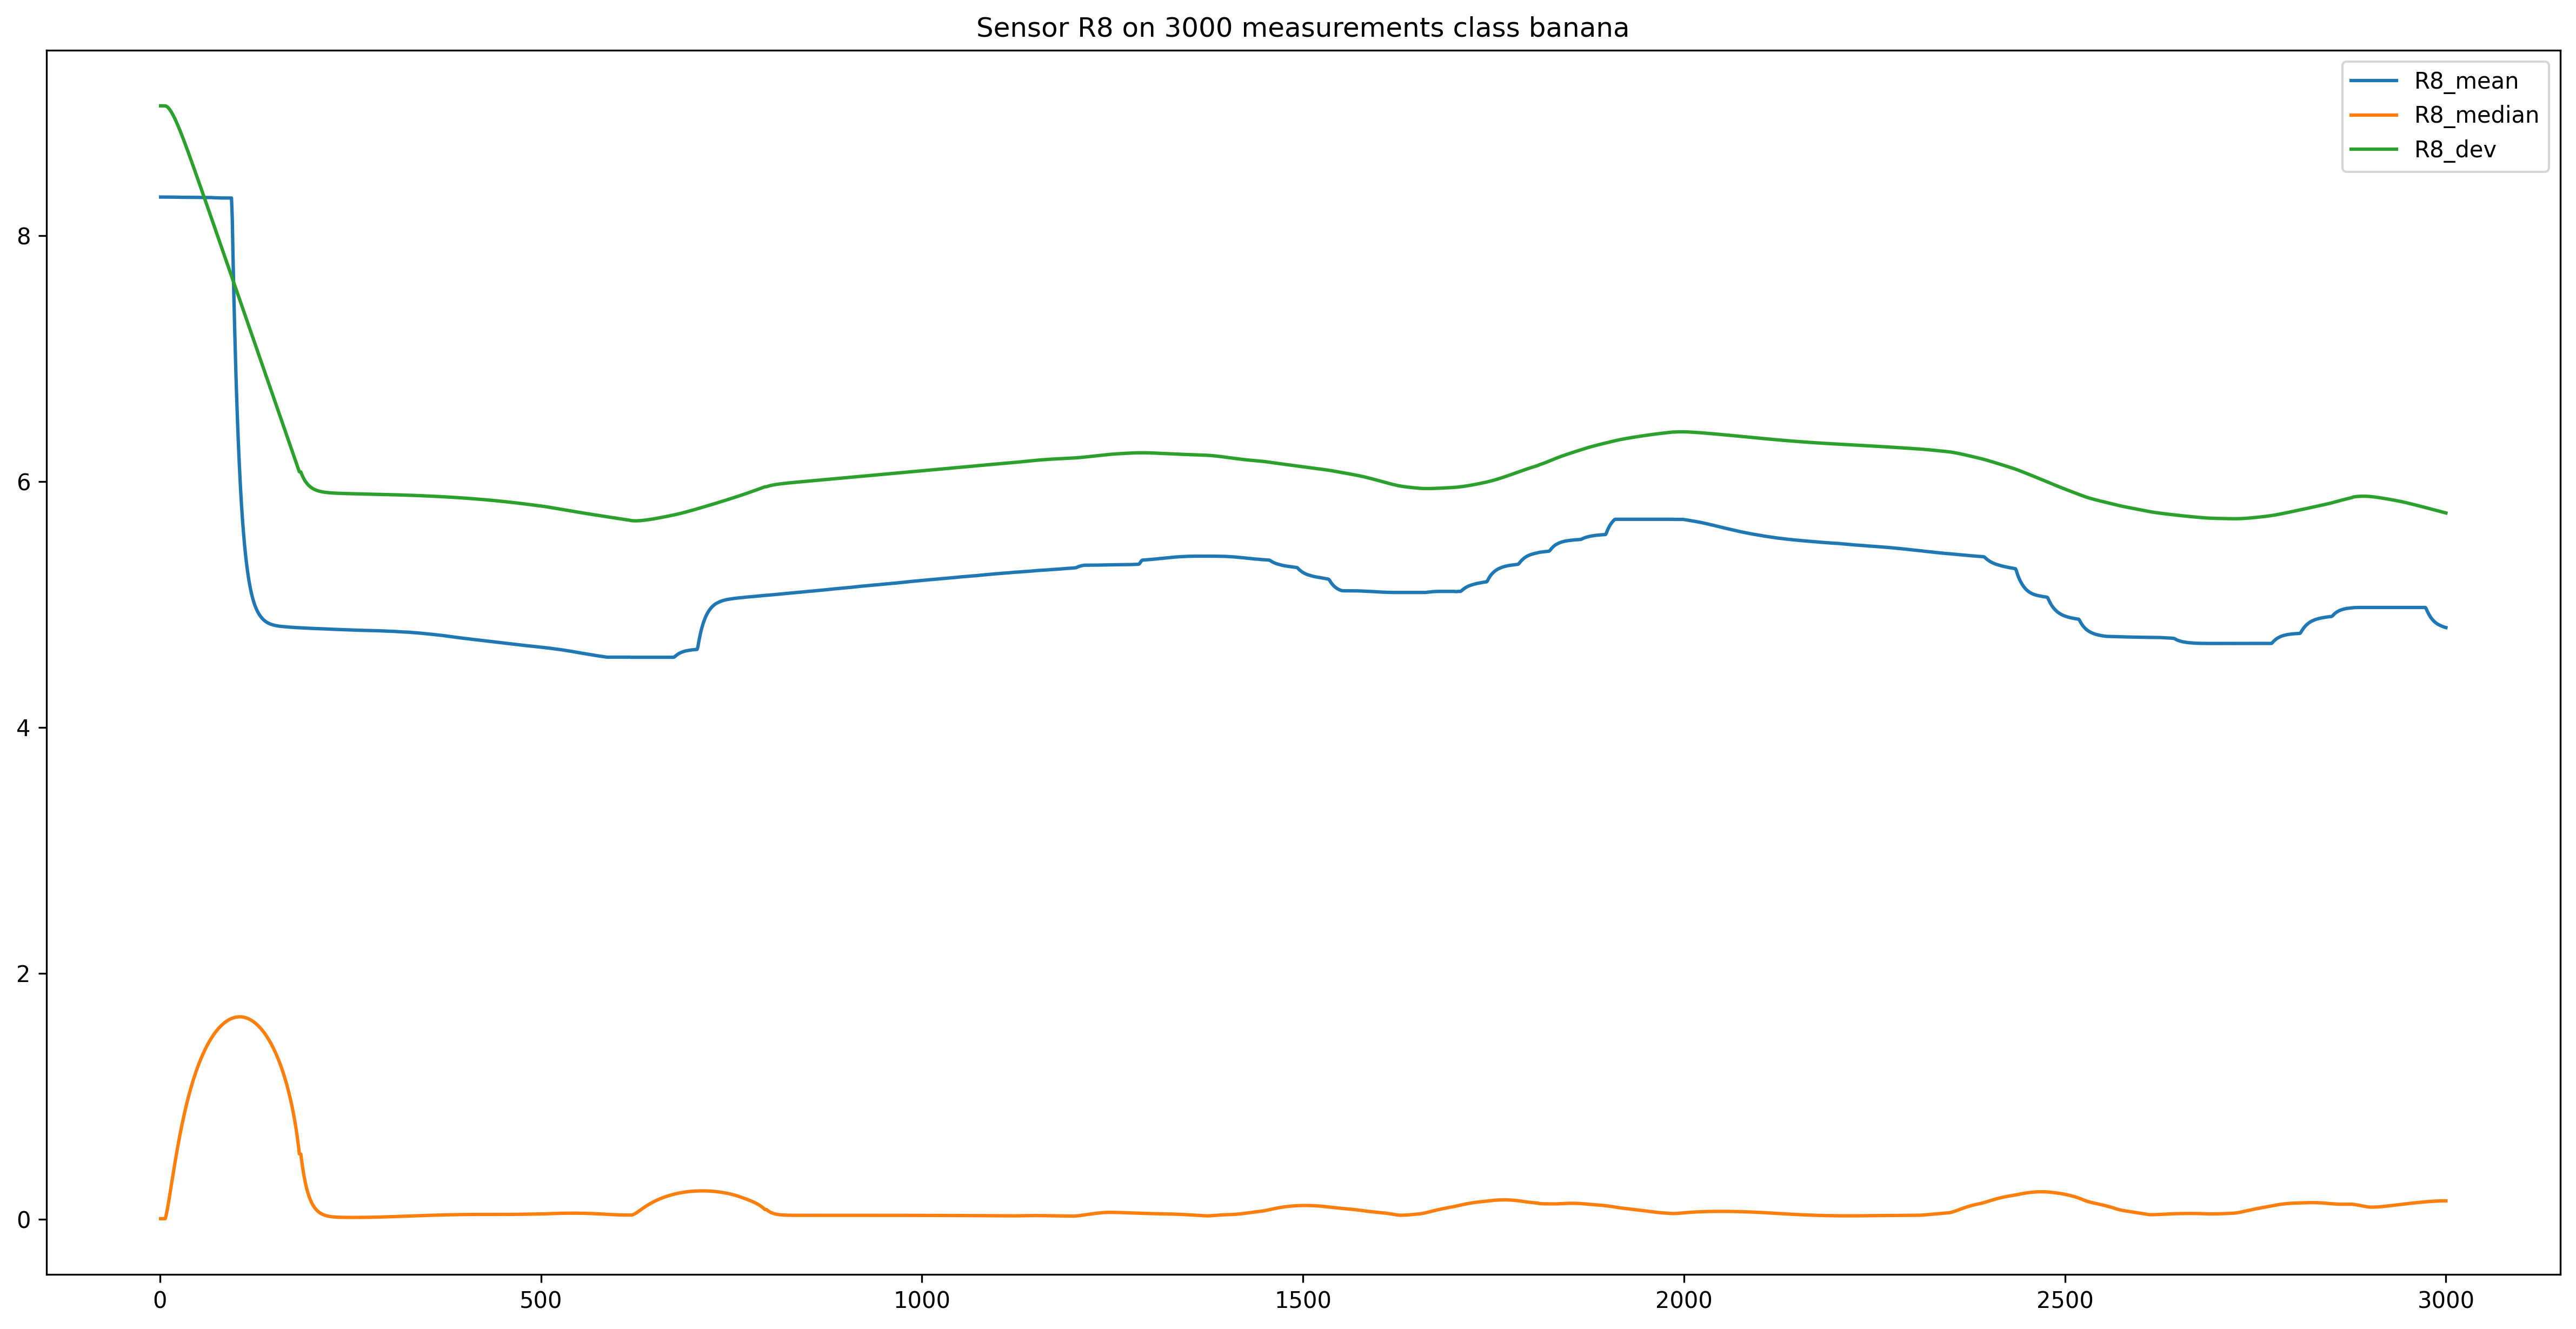

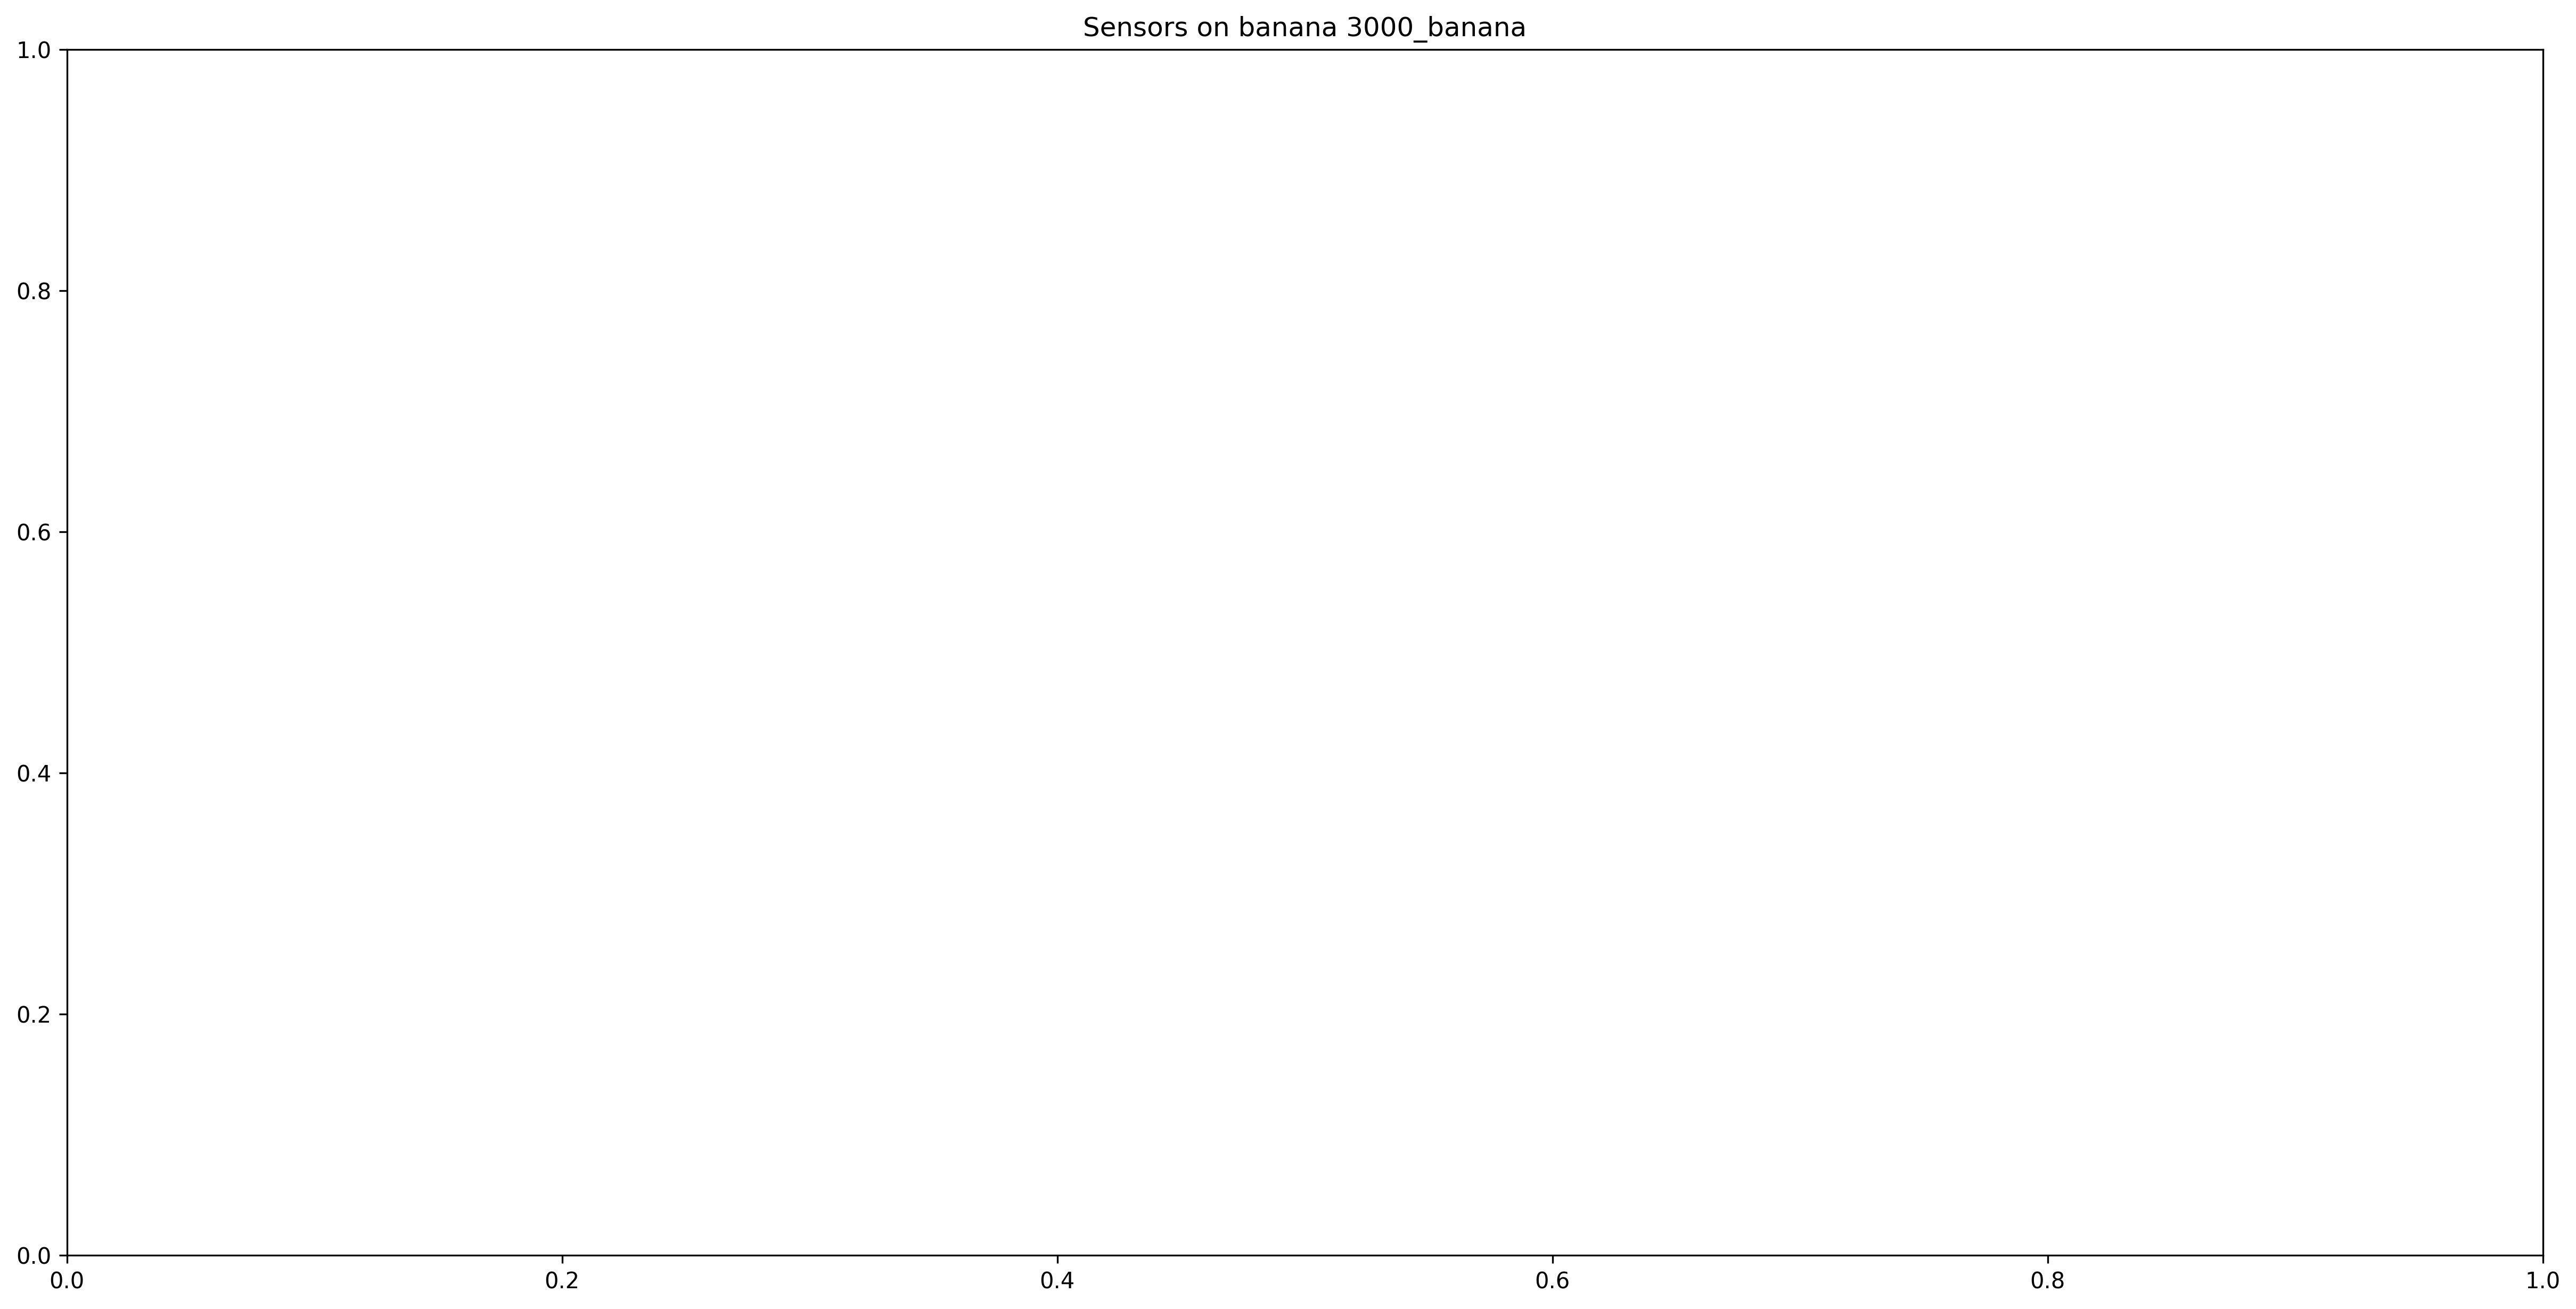

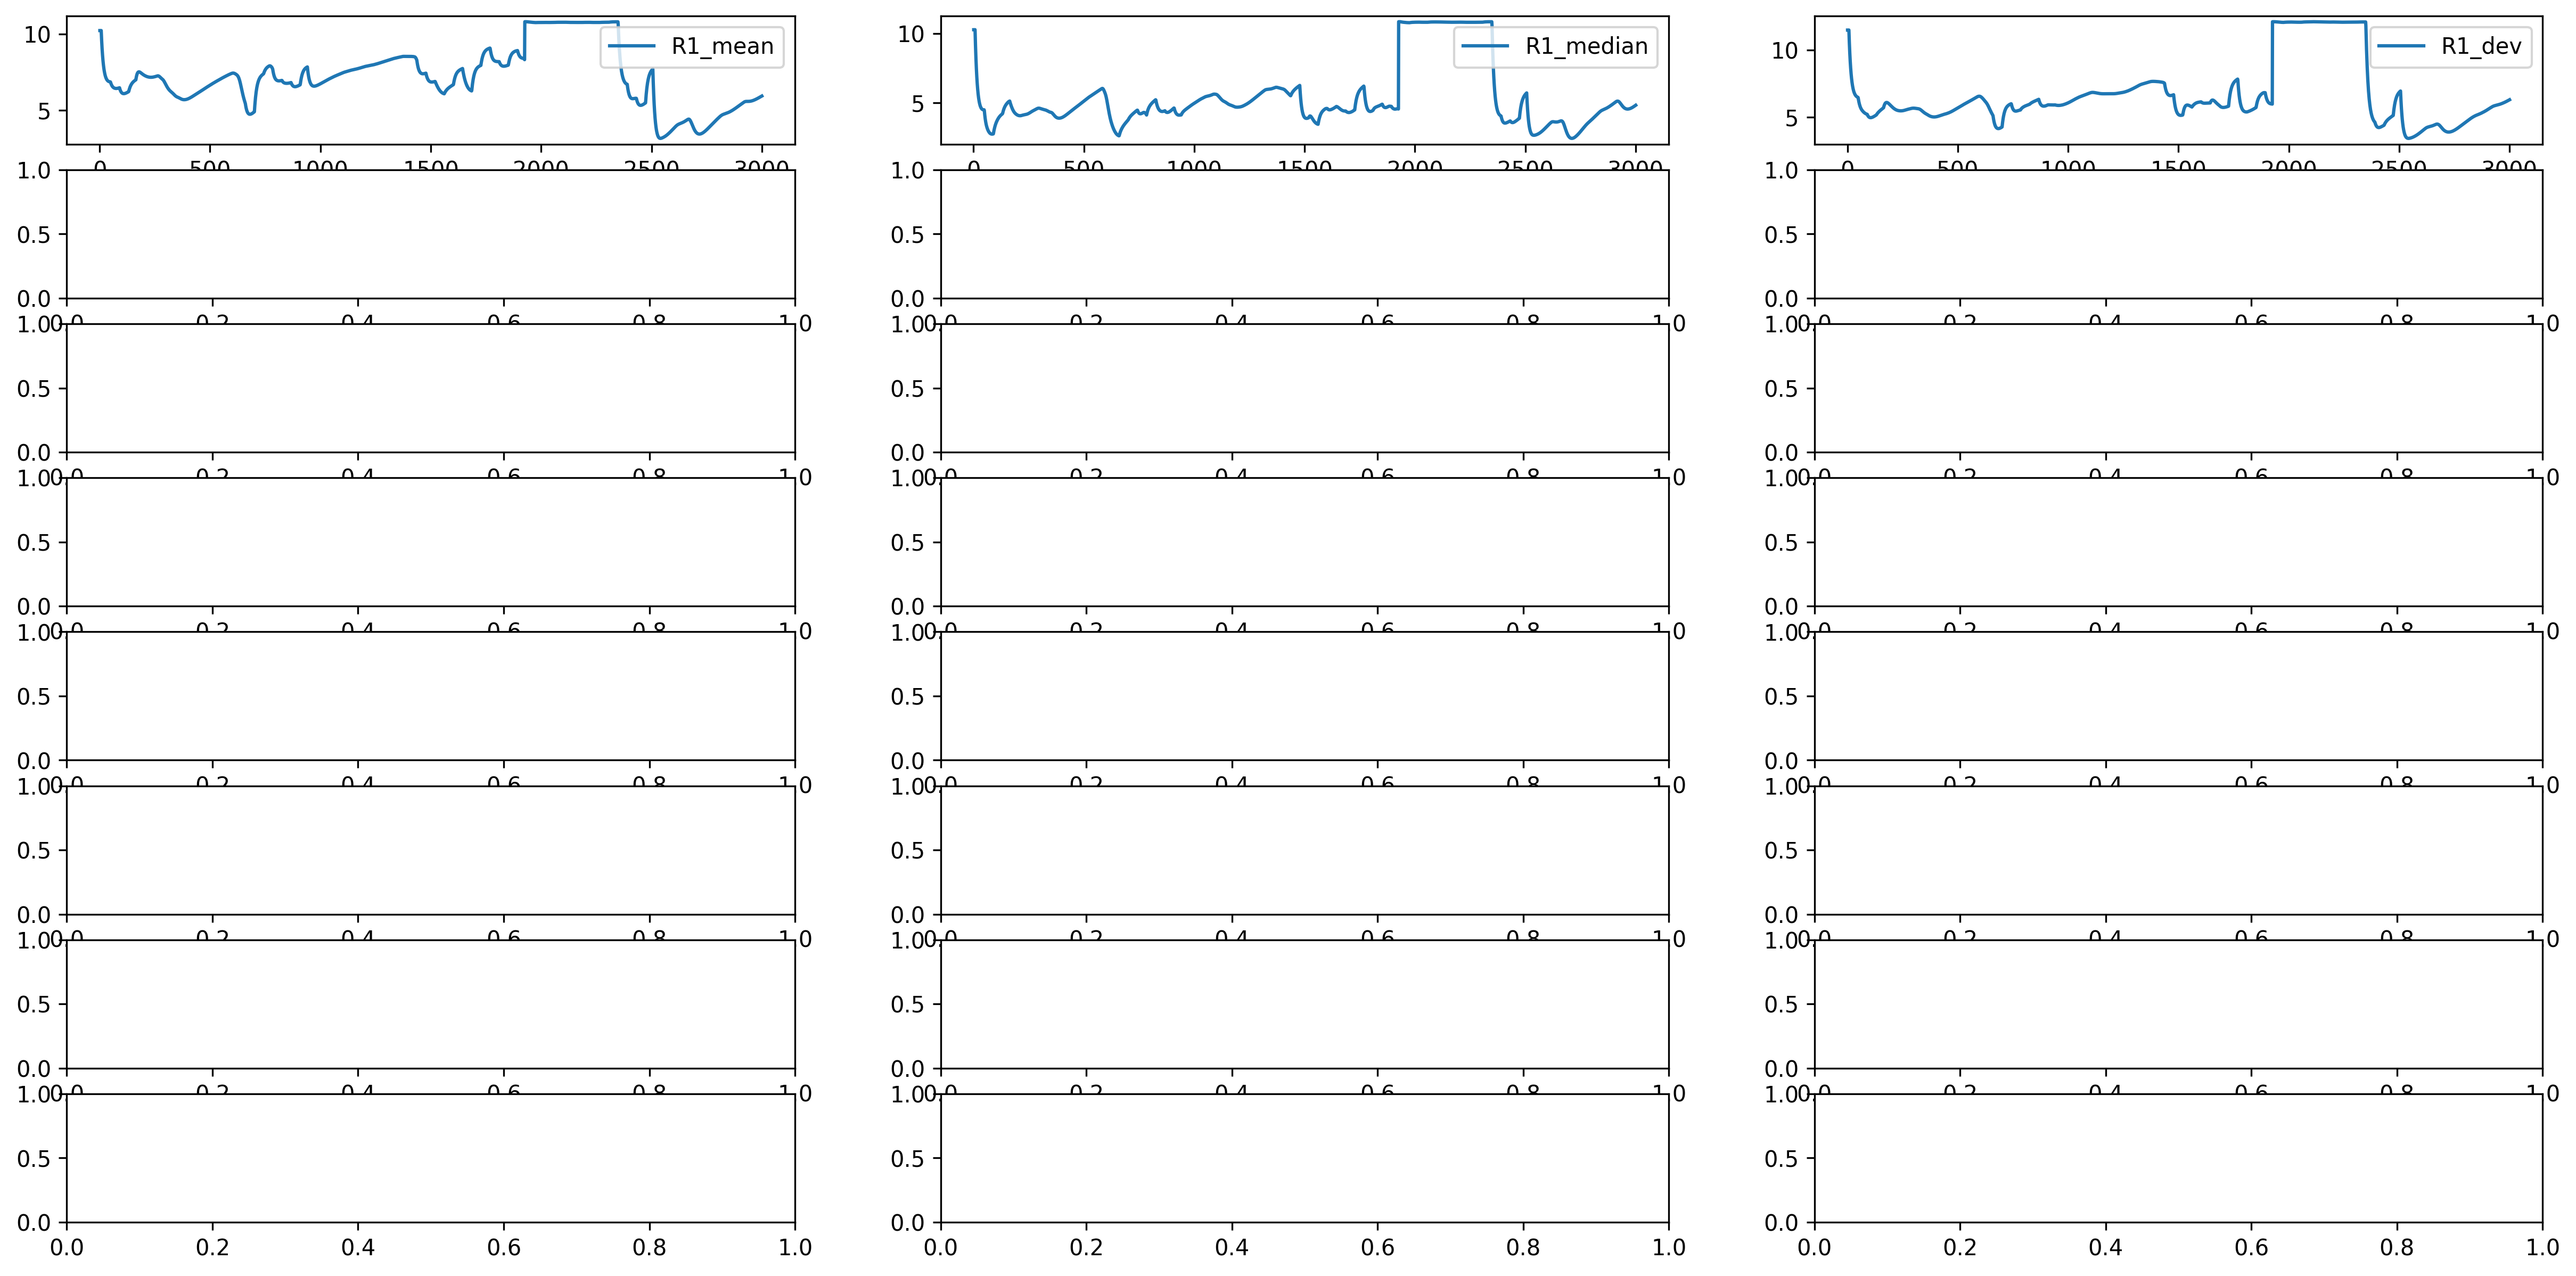

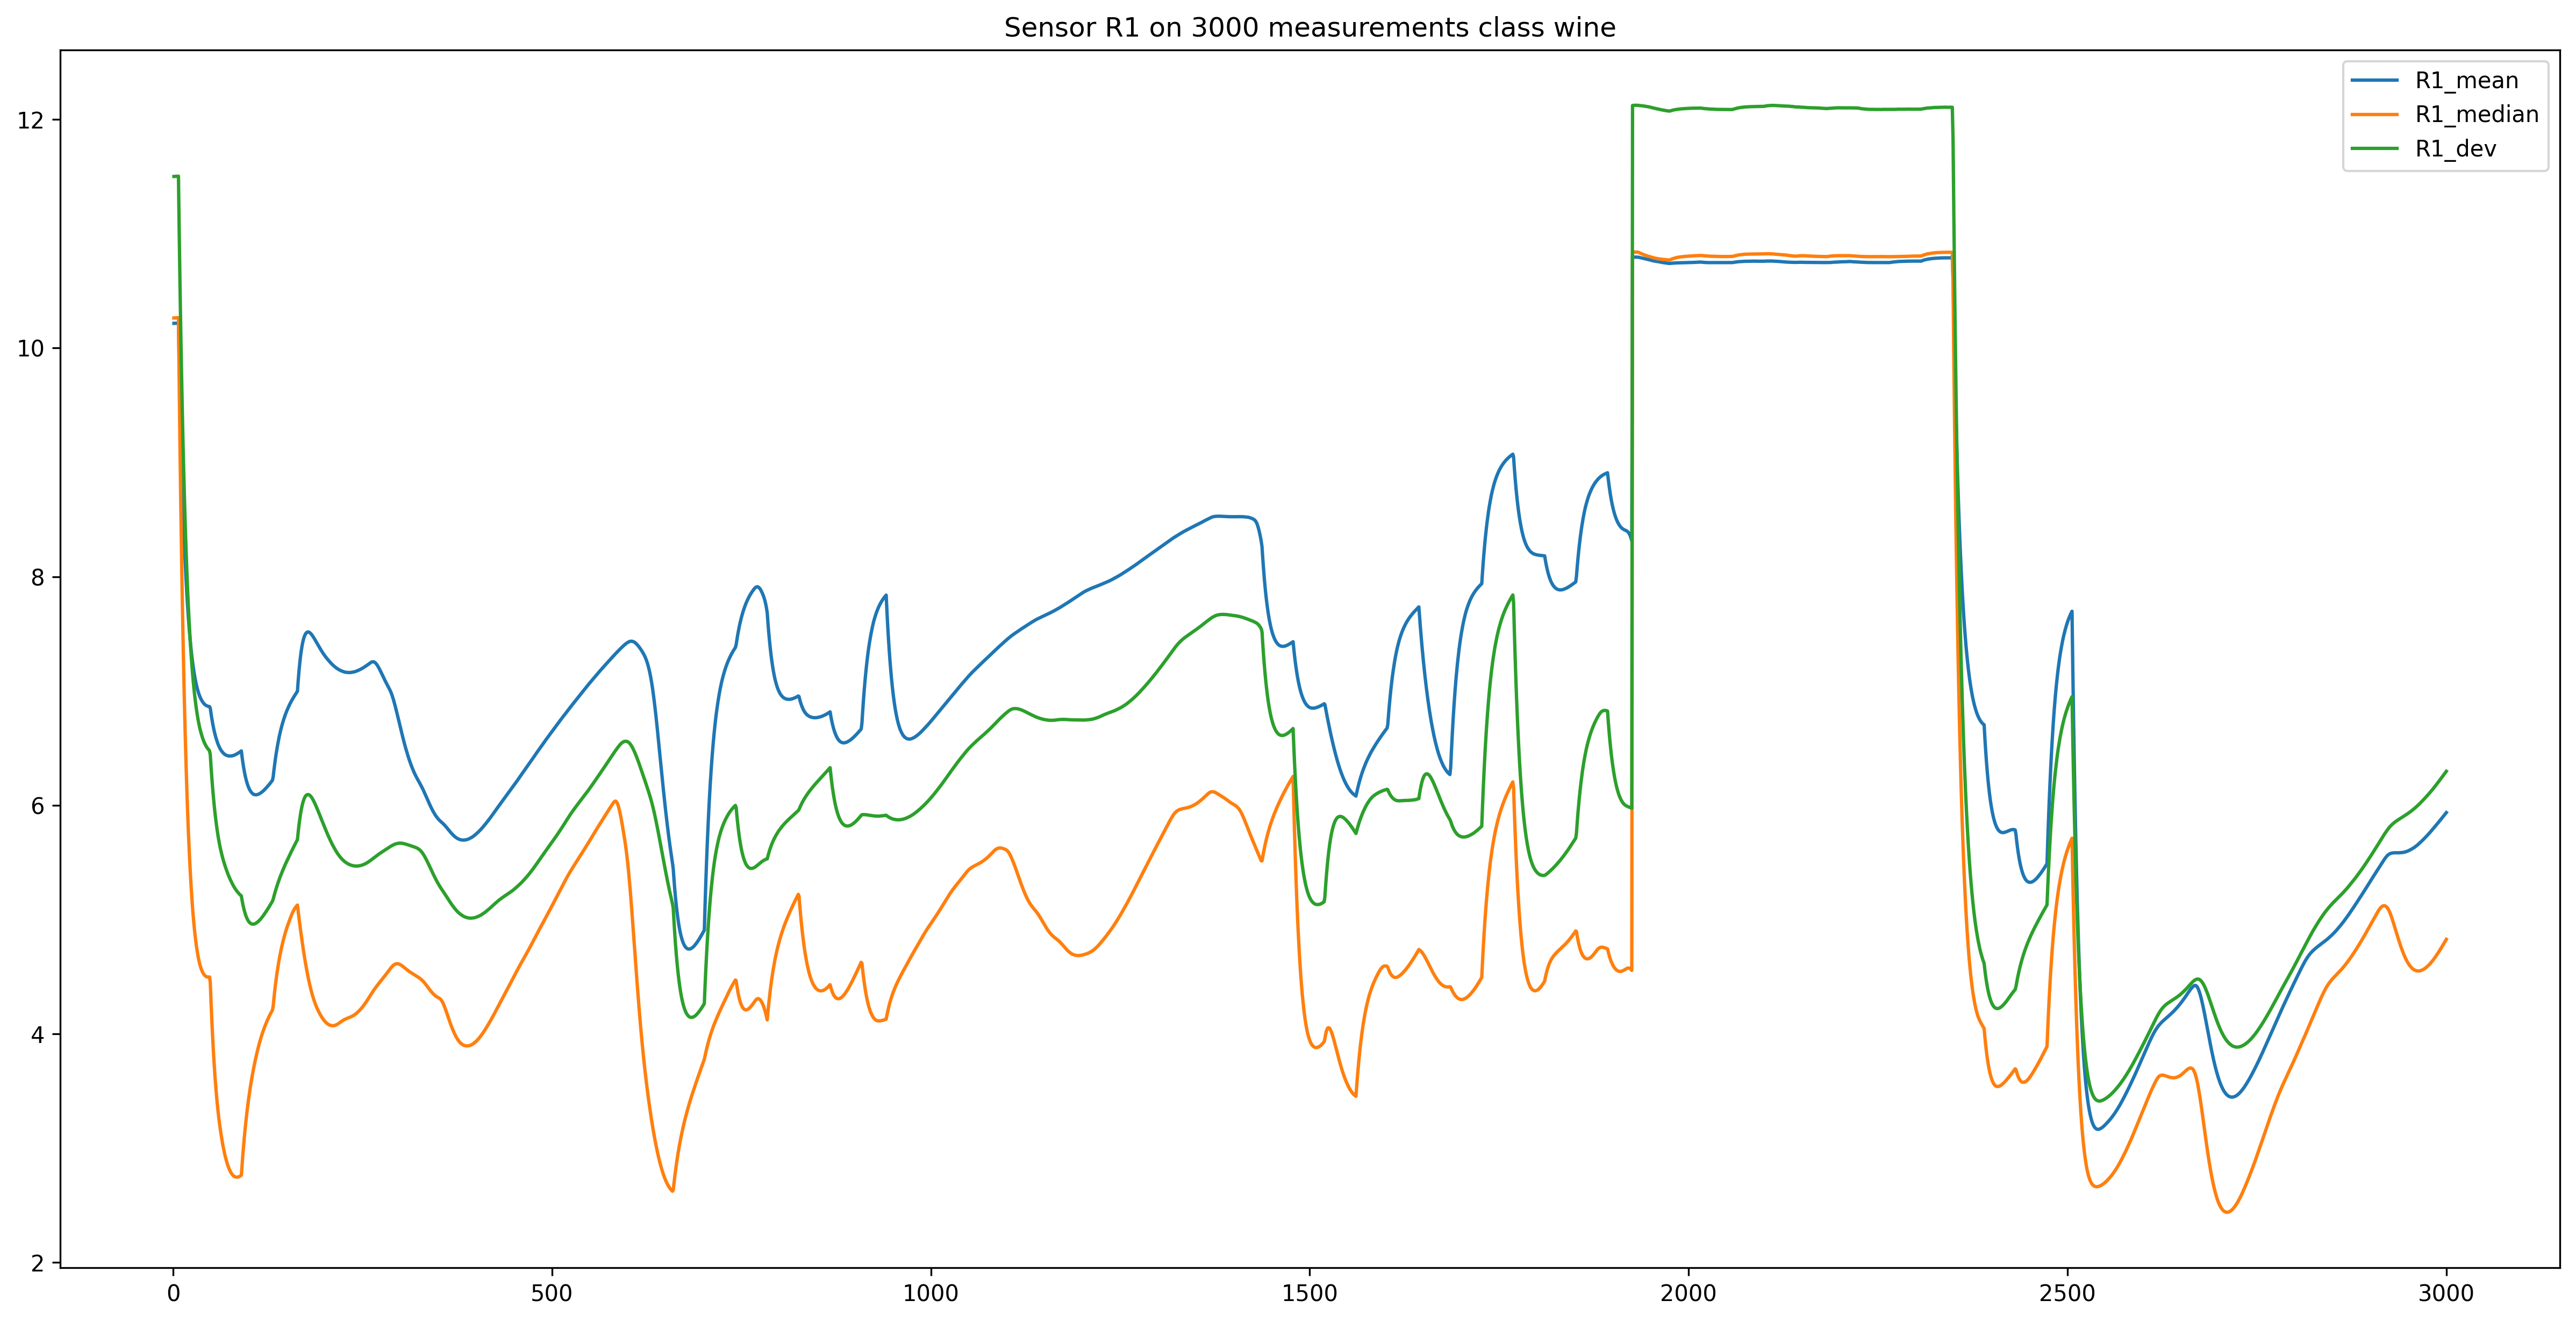

<Figure size 6000x3000 with 0 Axes>

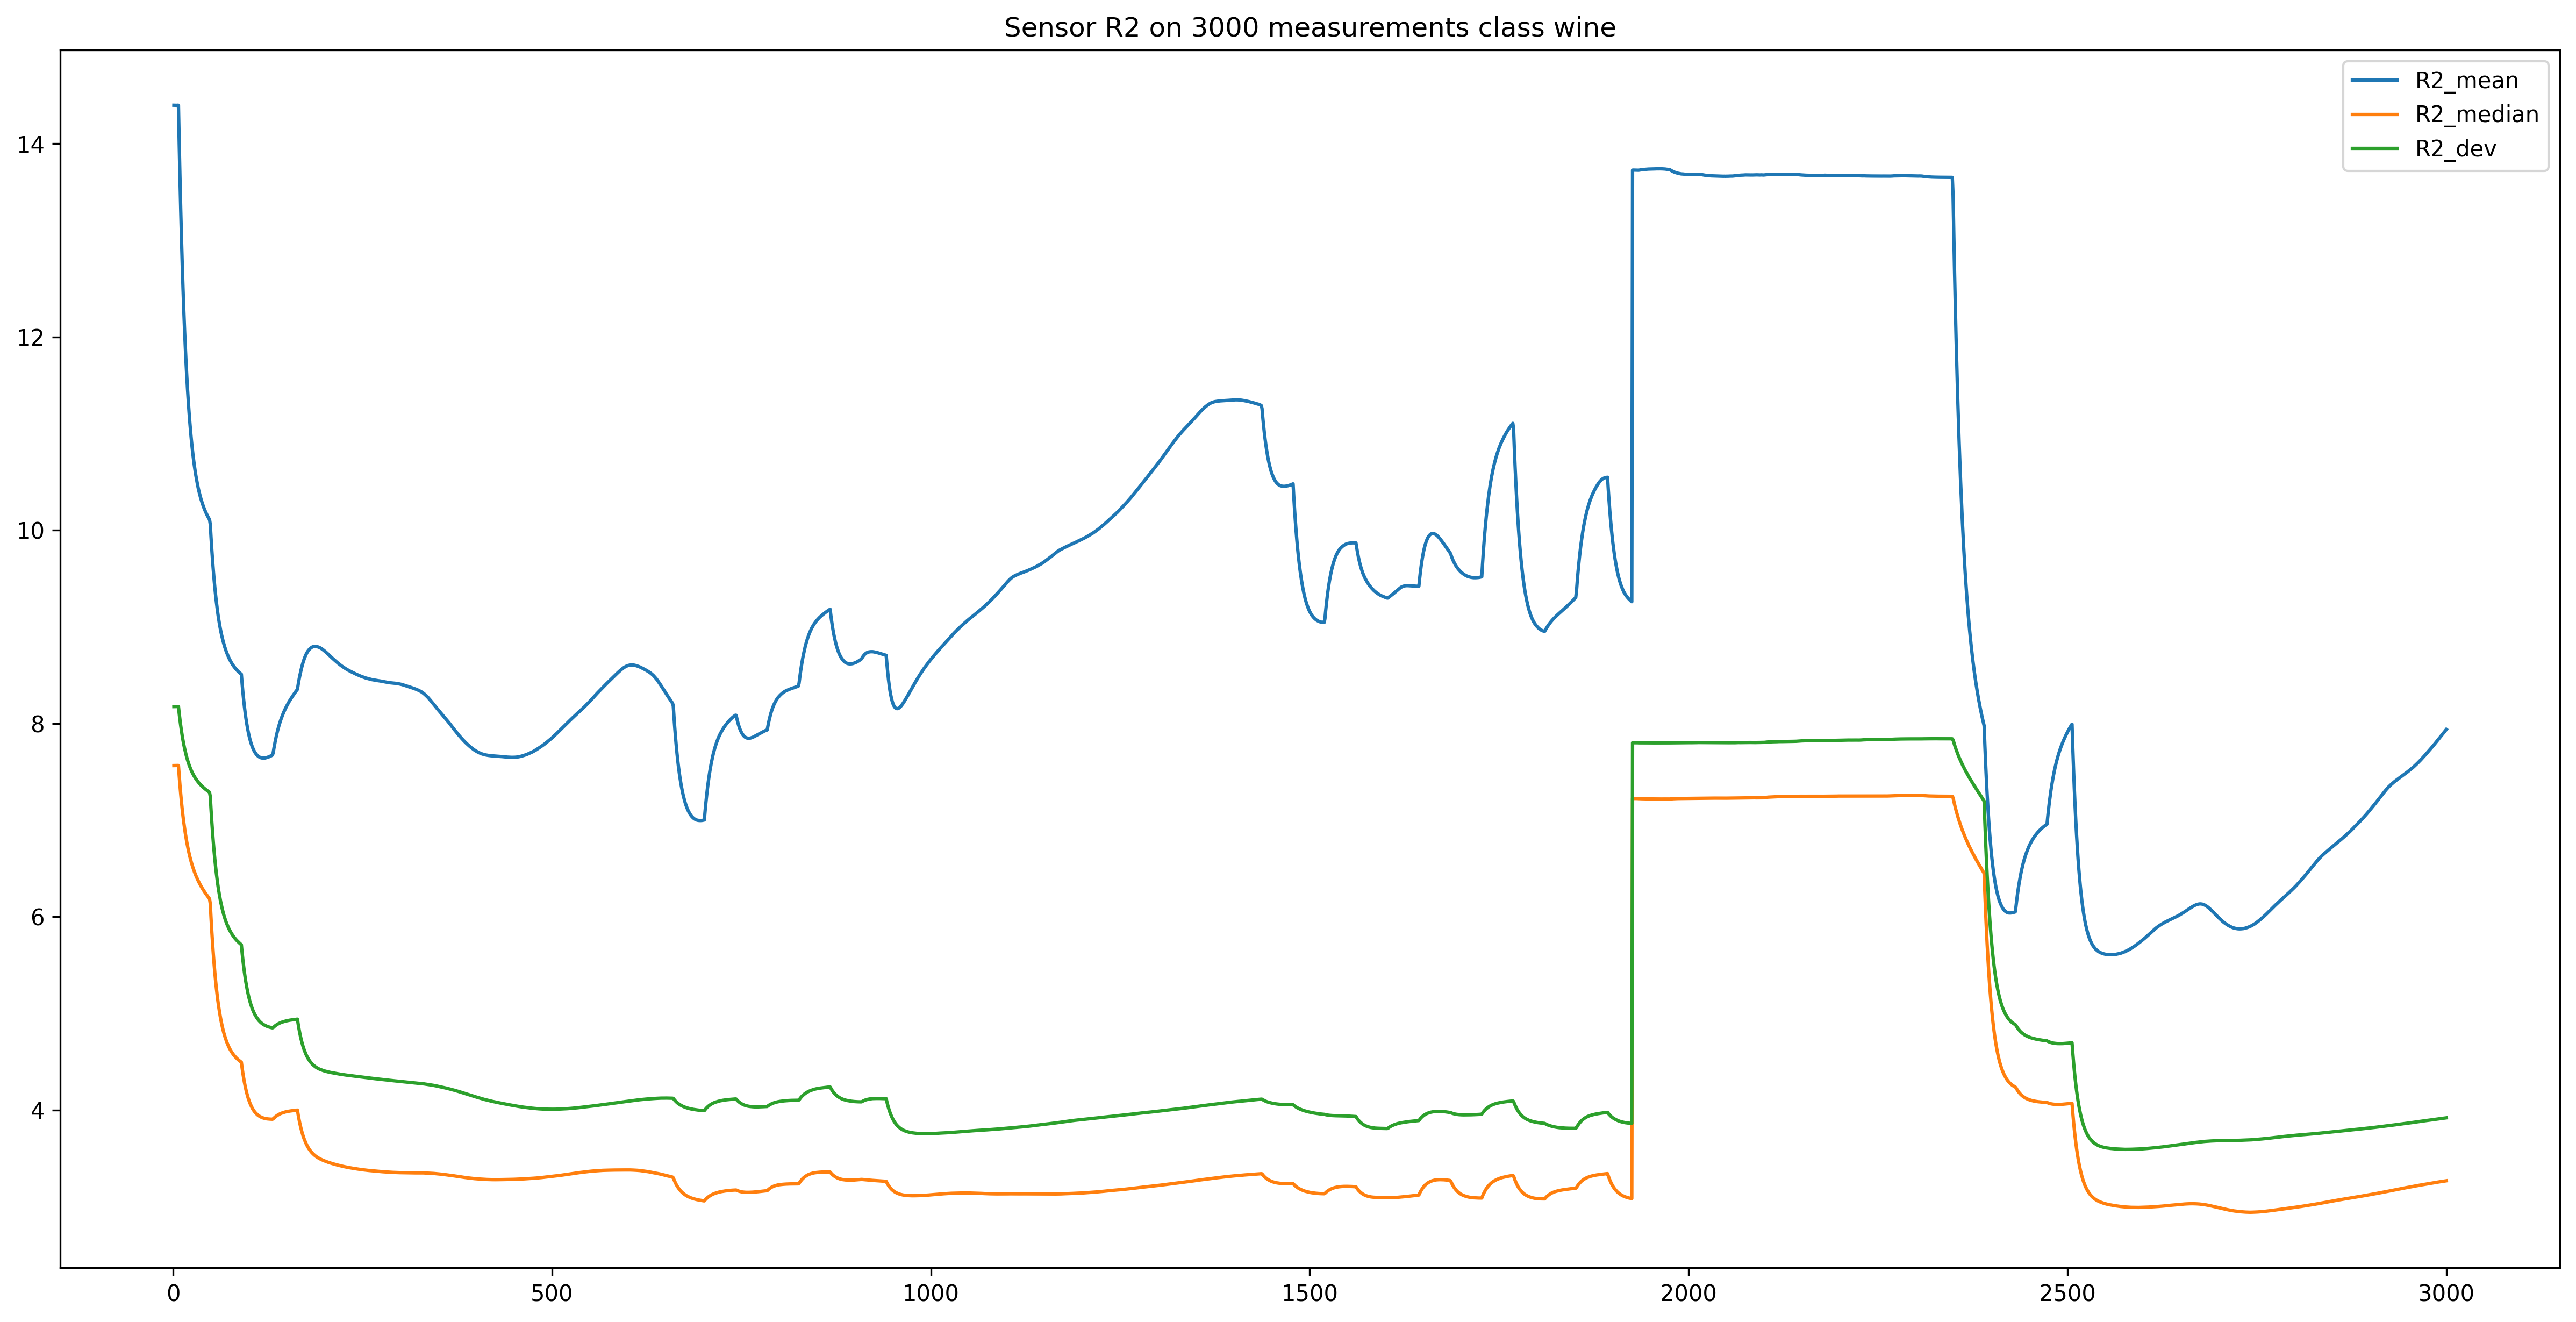

<Figure size 6000x3000 with 0 Axes>

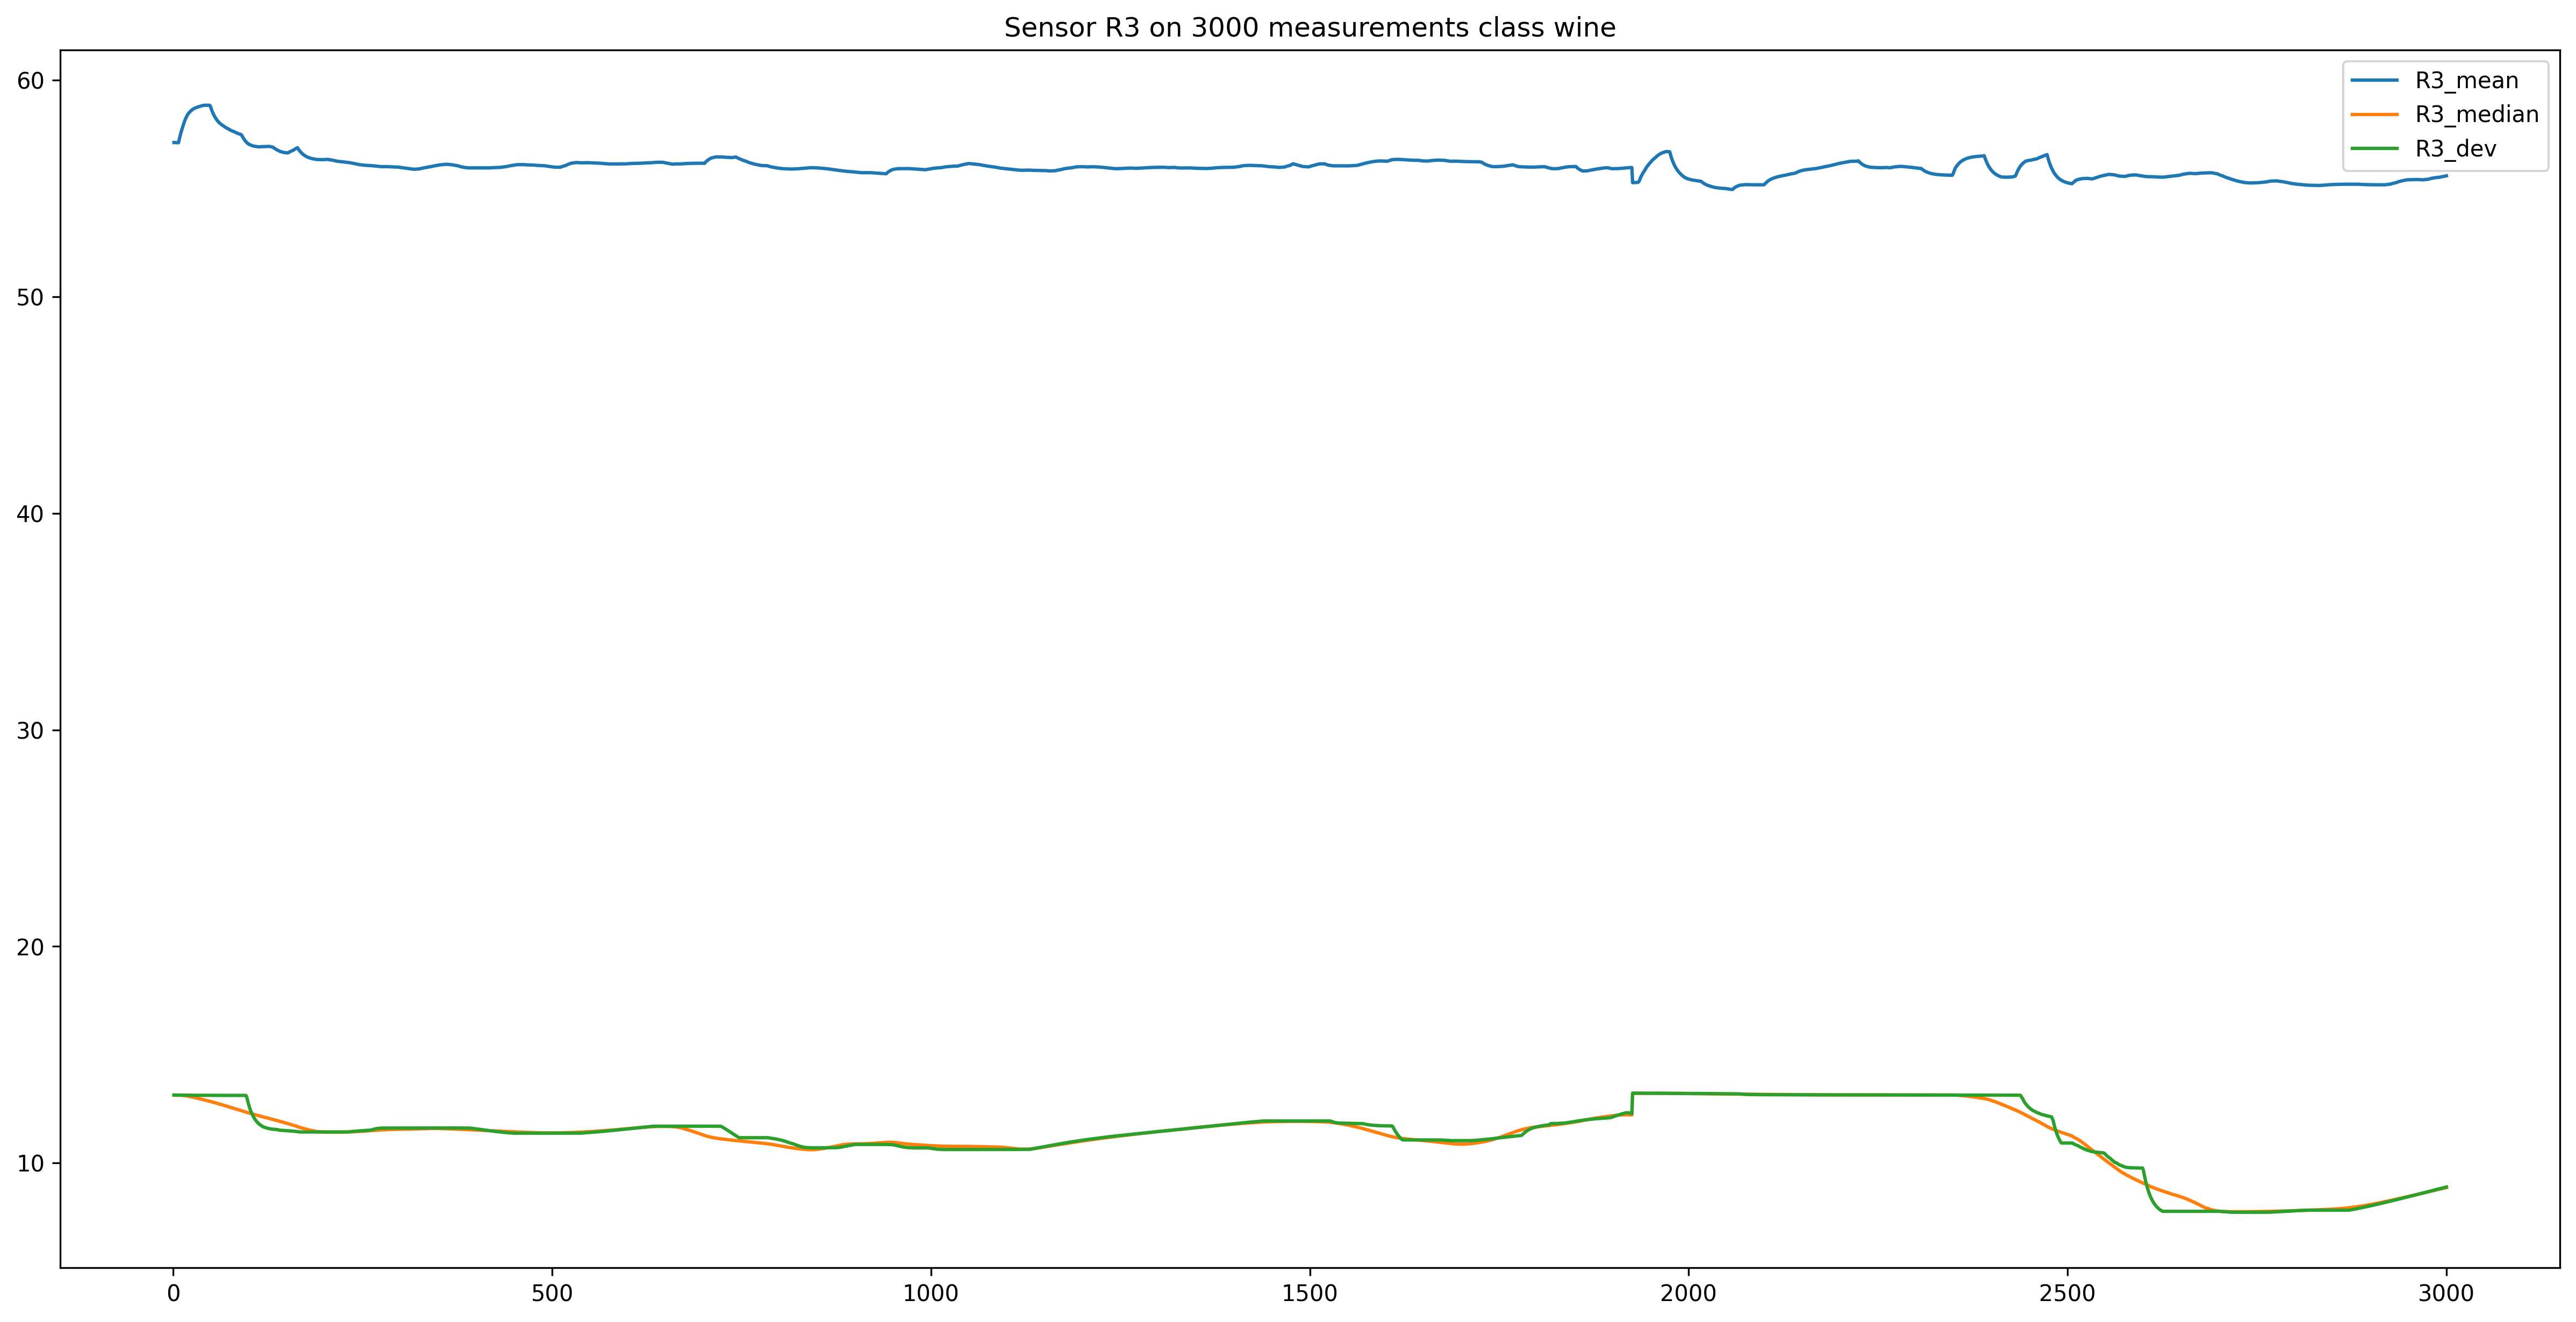

<Figure size 6000x3000 with 0 Axes>

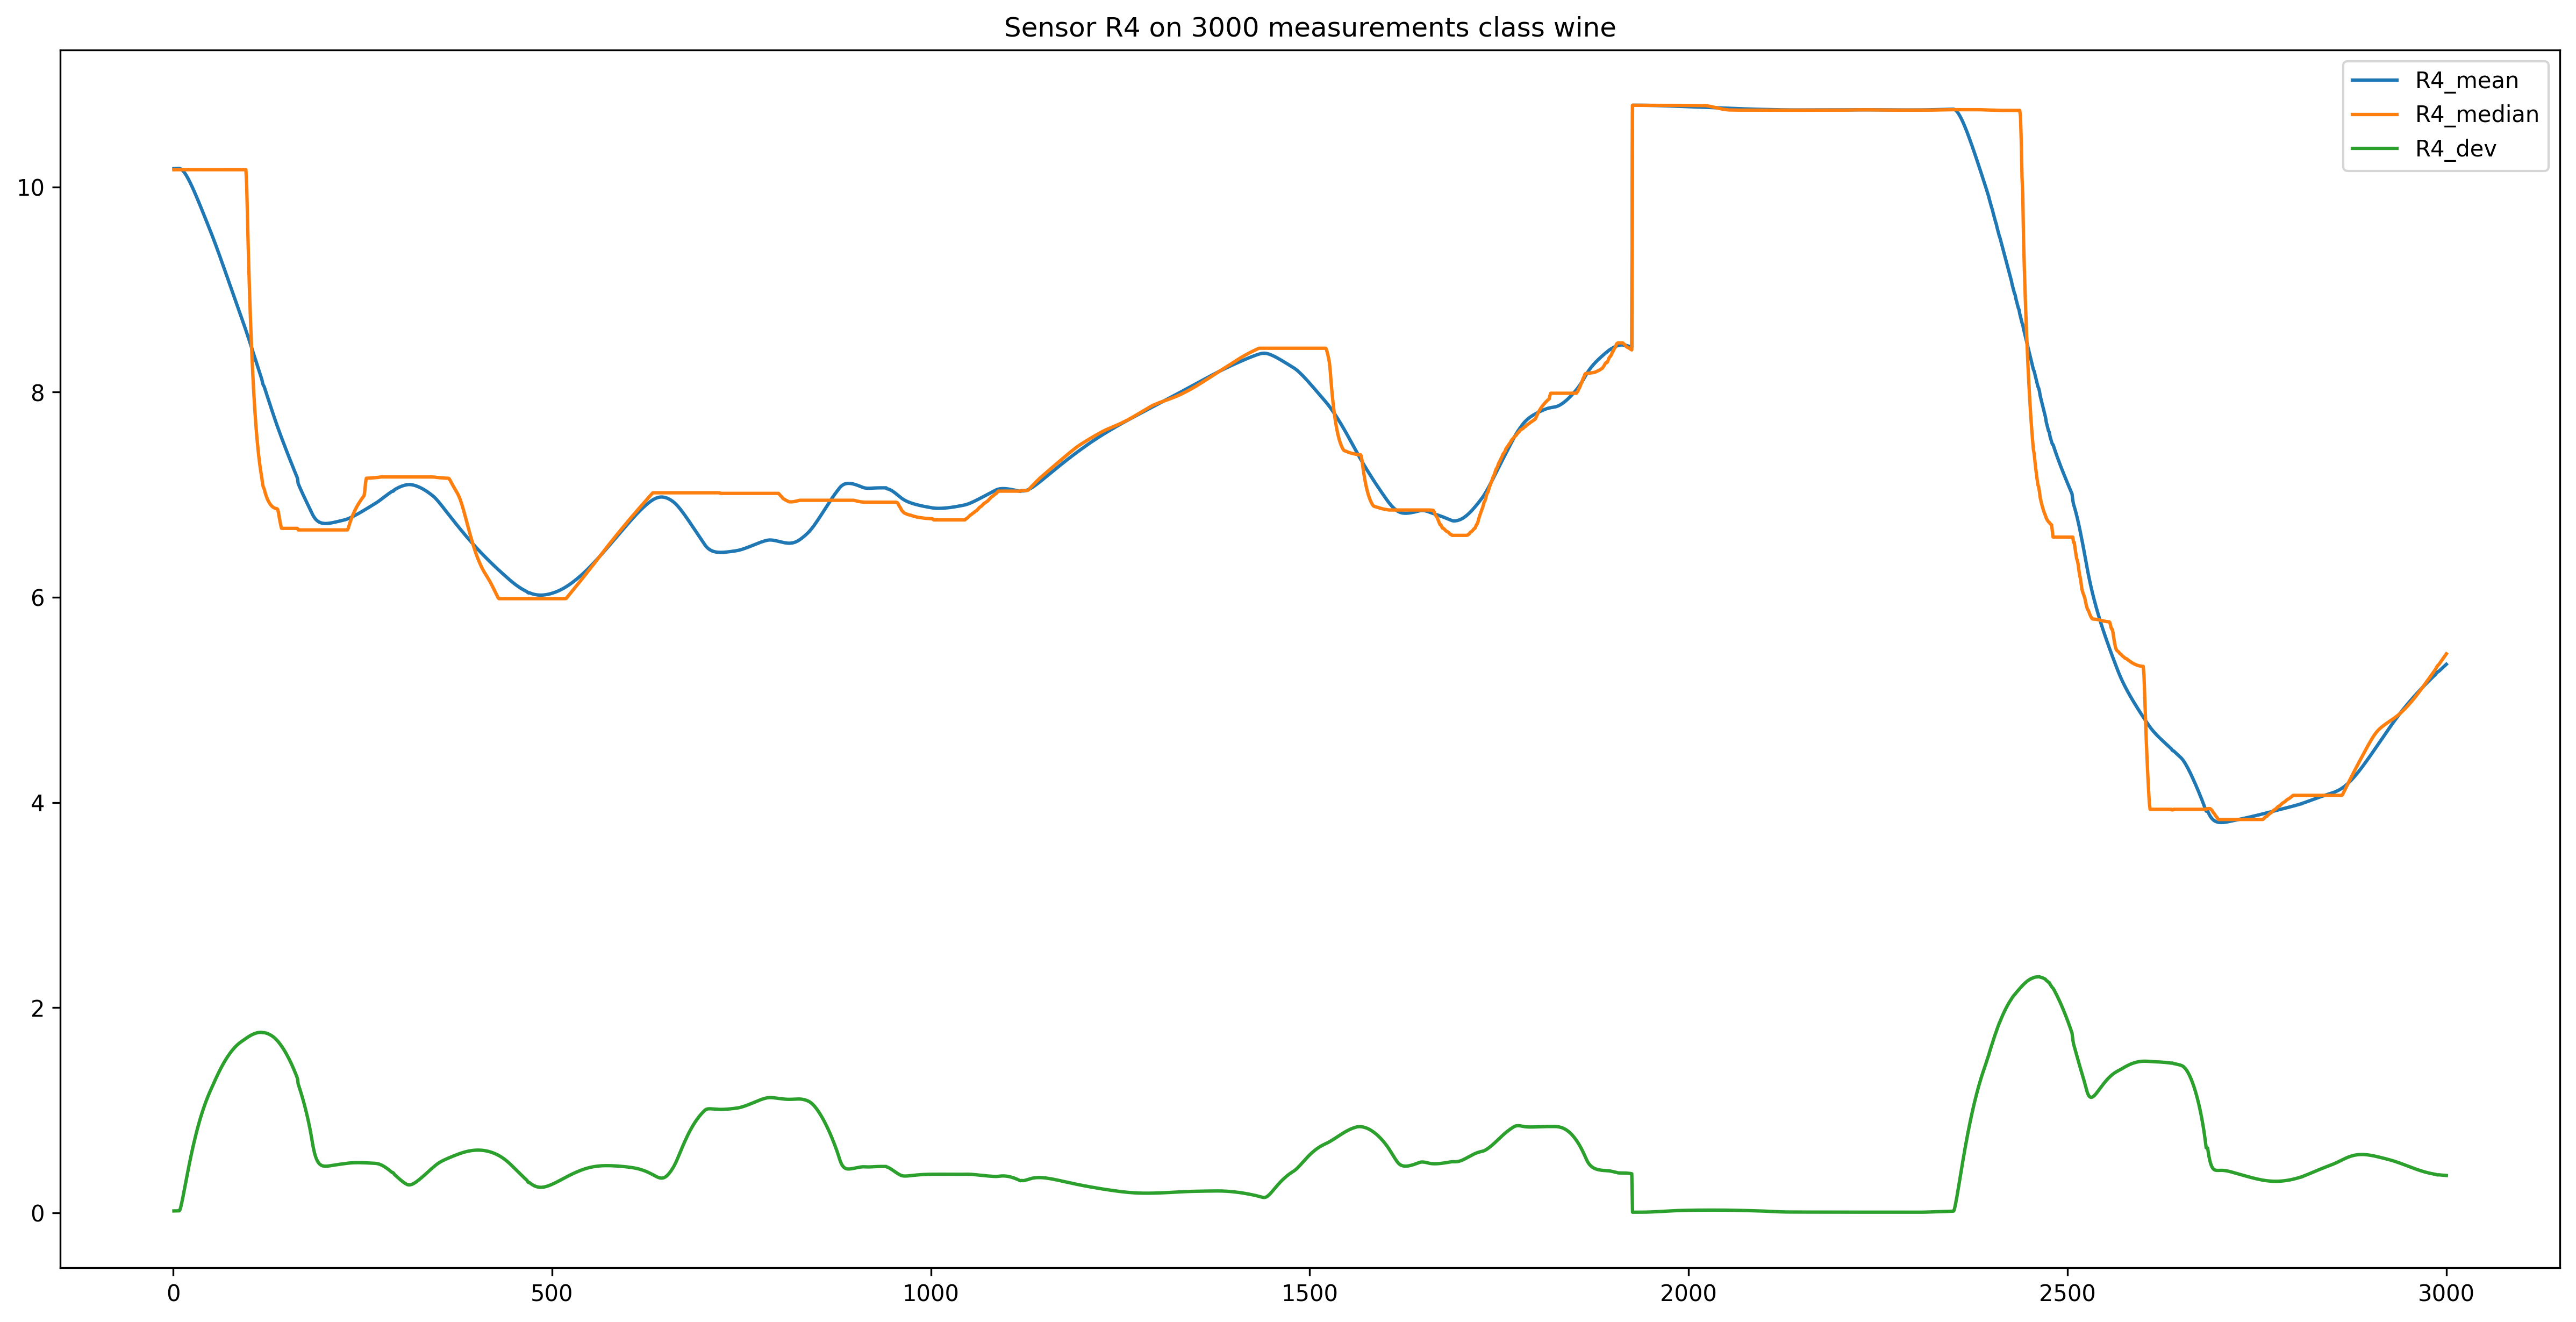

<Figure size 6000x3000 with 0 Axes>

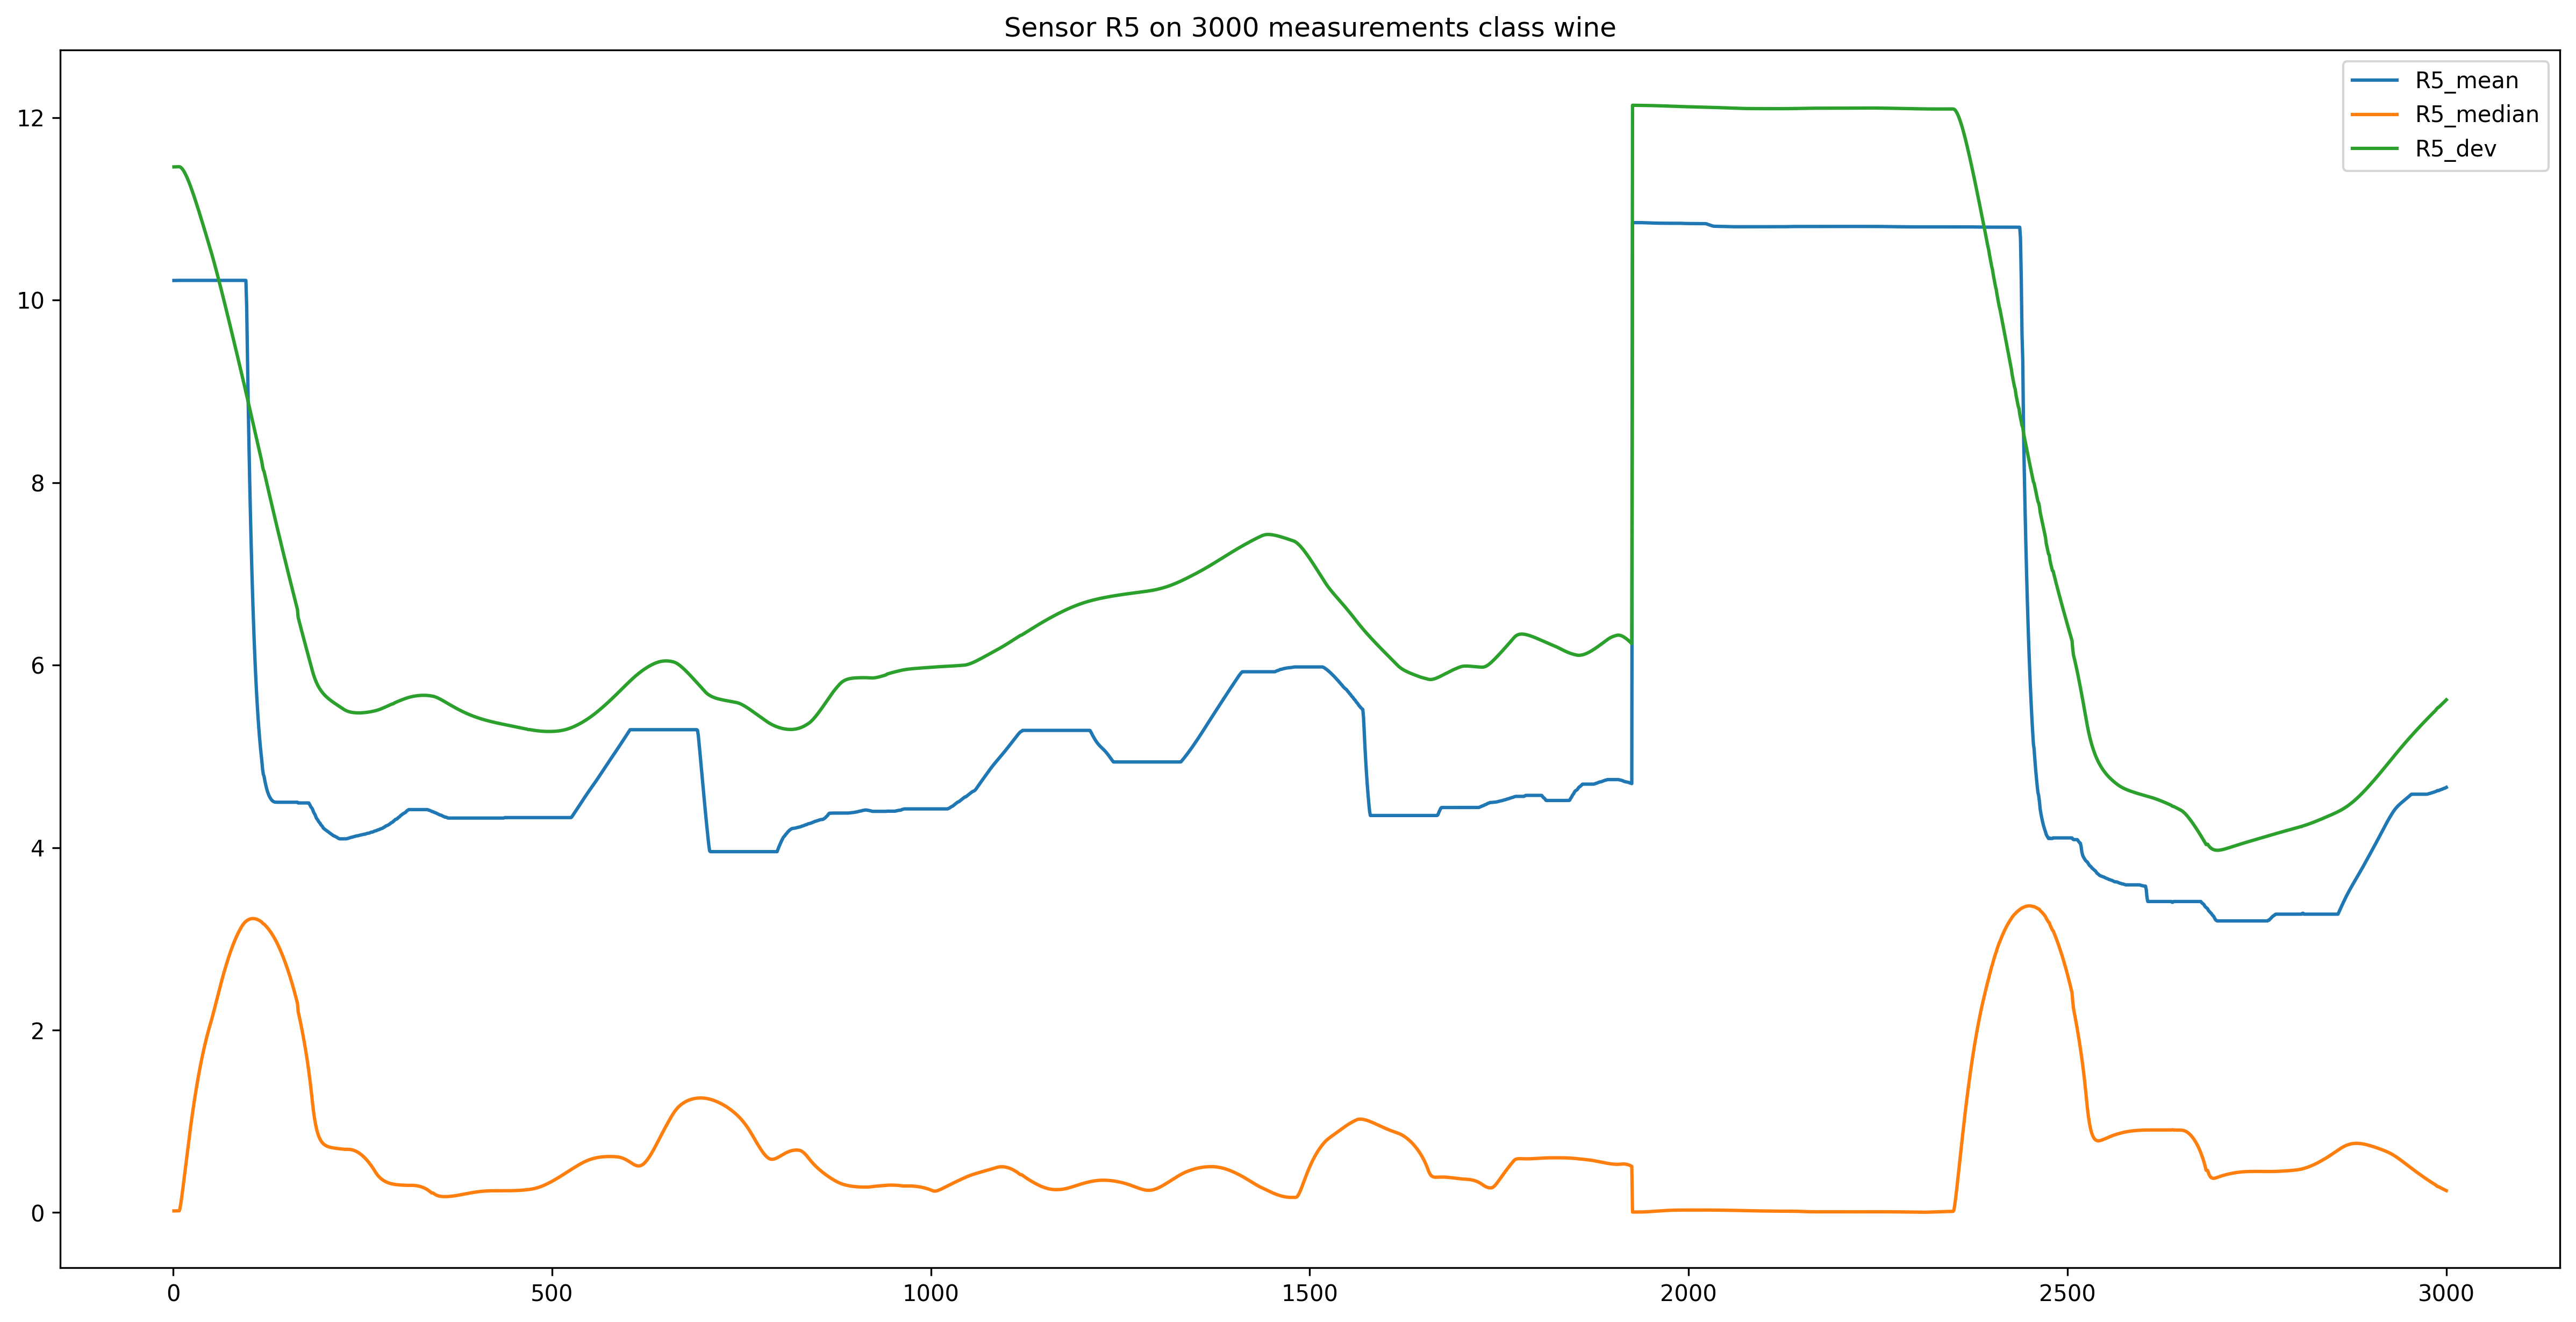

<Figure size 6000x3000 with 0 Axes>

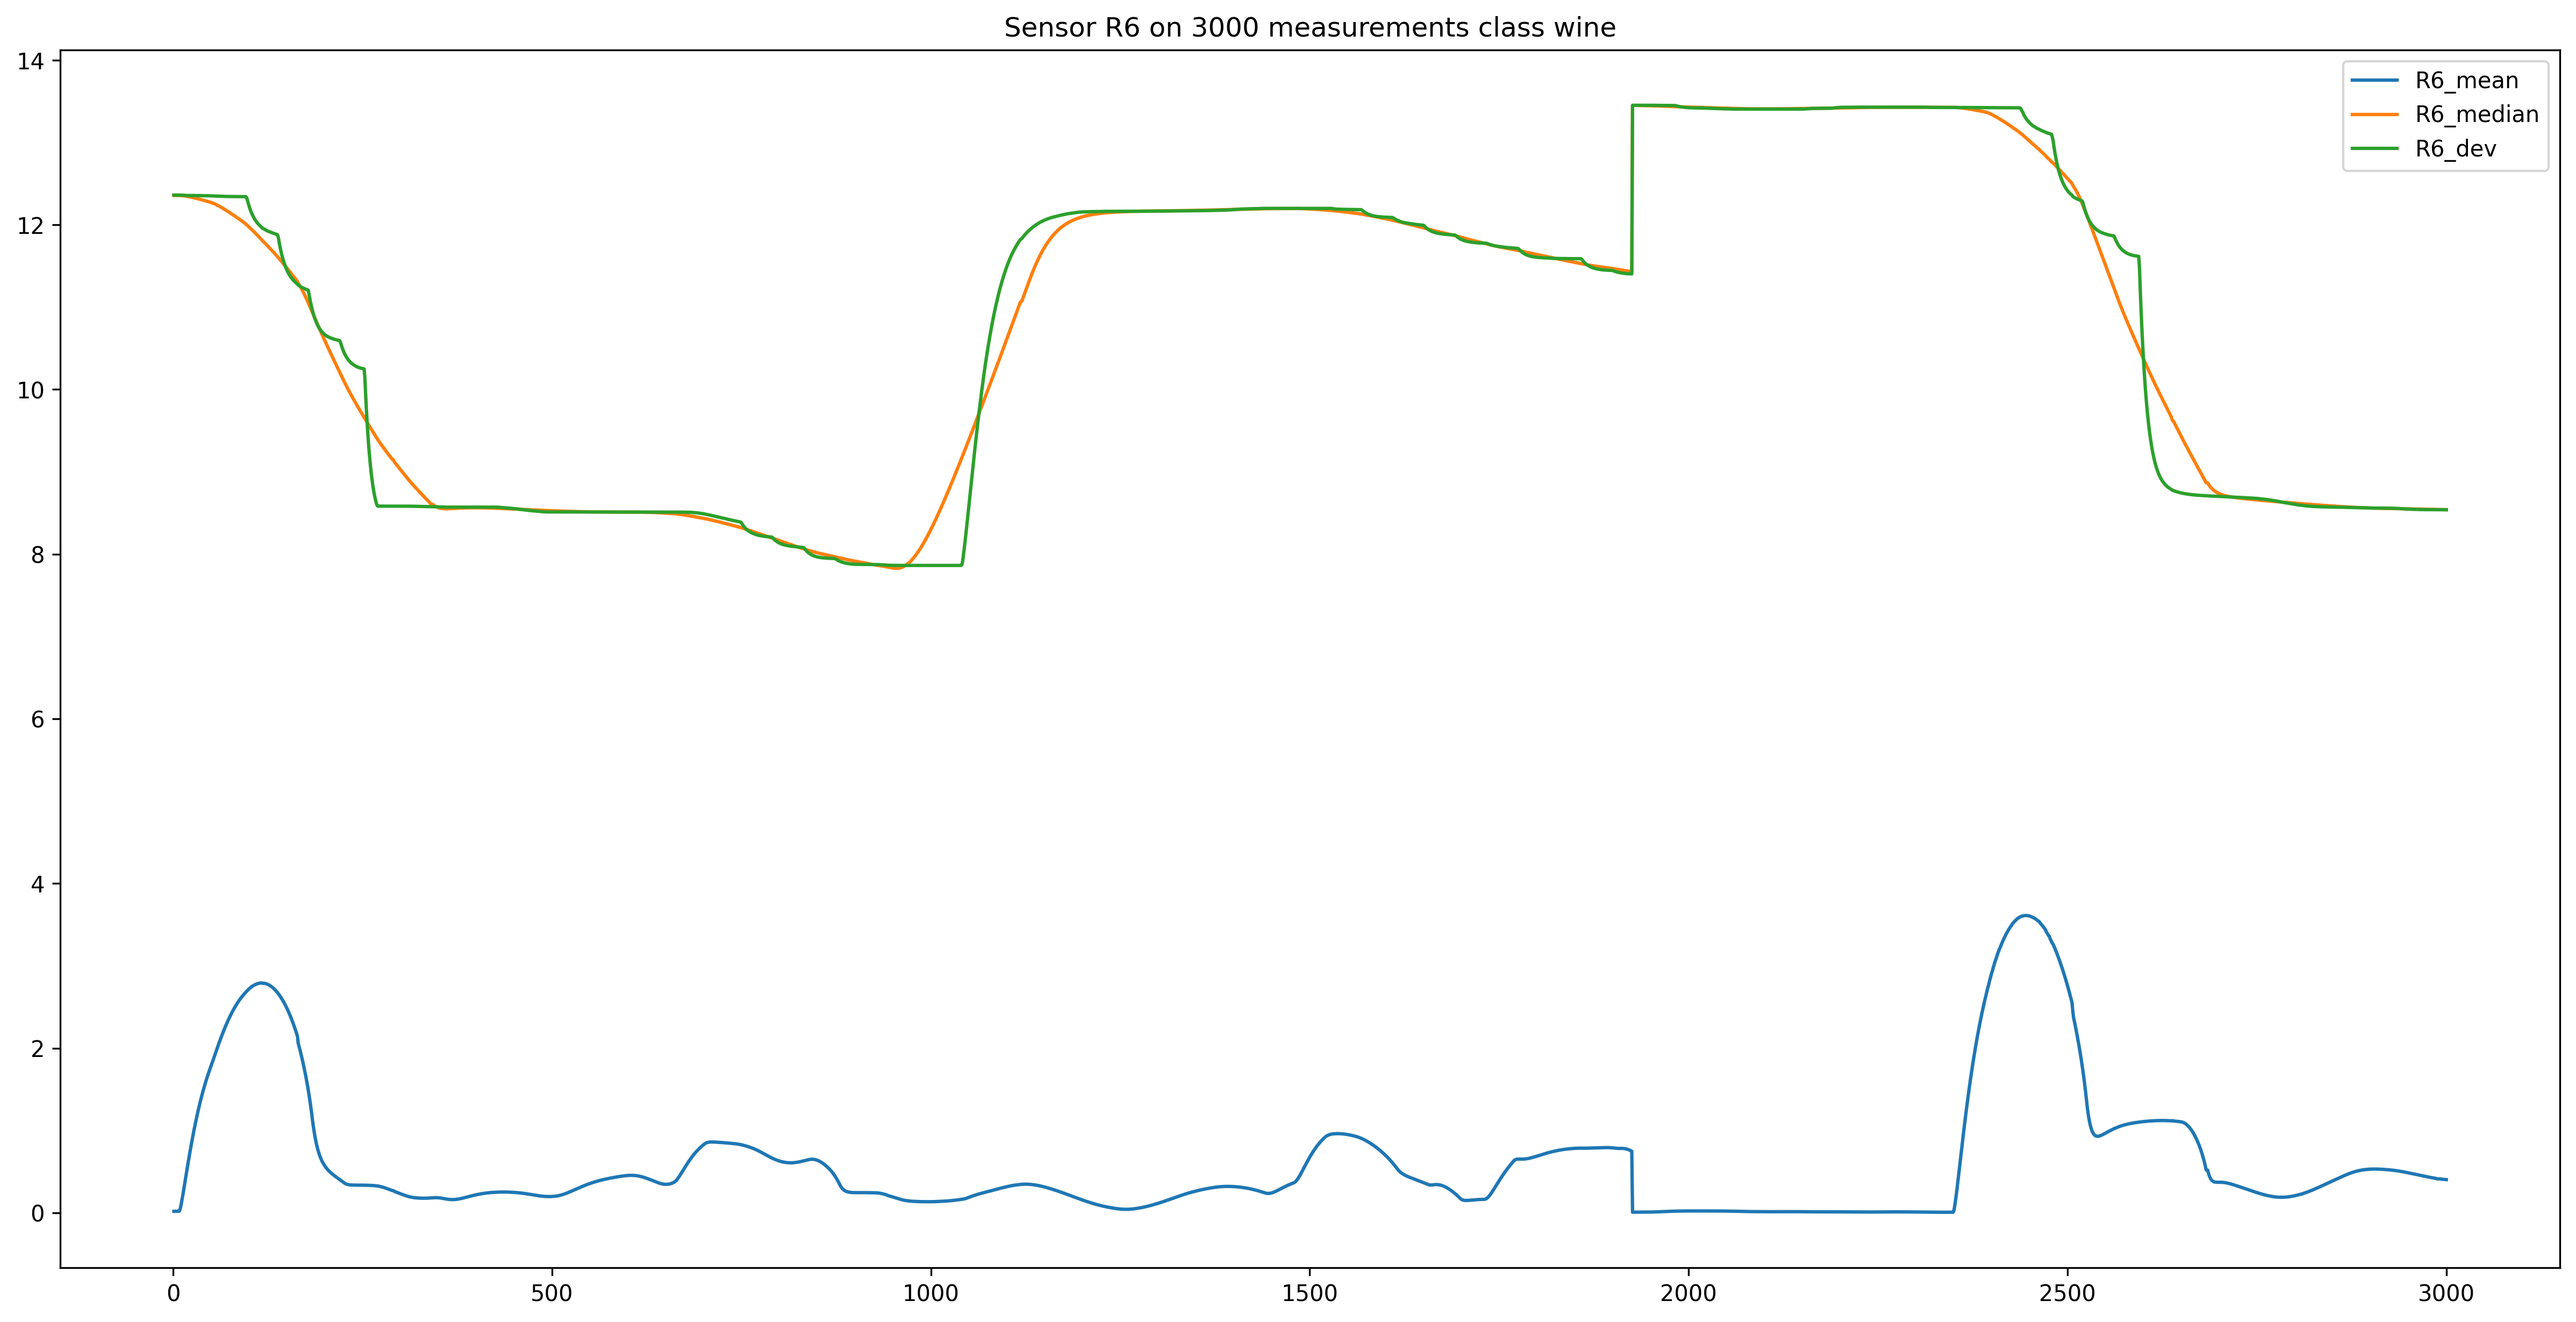

<Figure size 6000x3000 with 0 Axes>

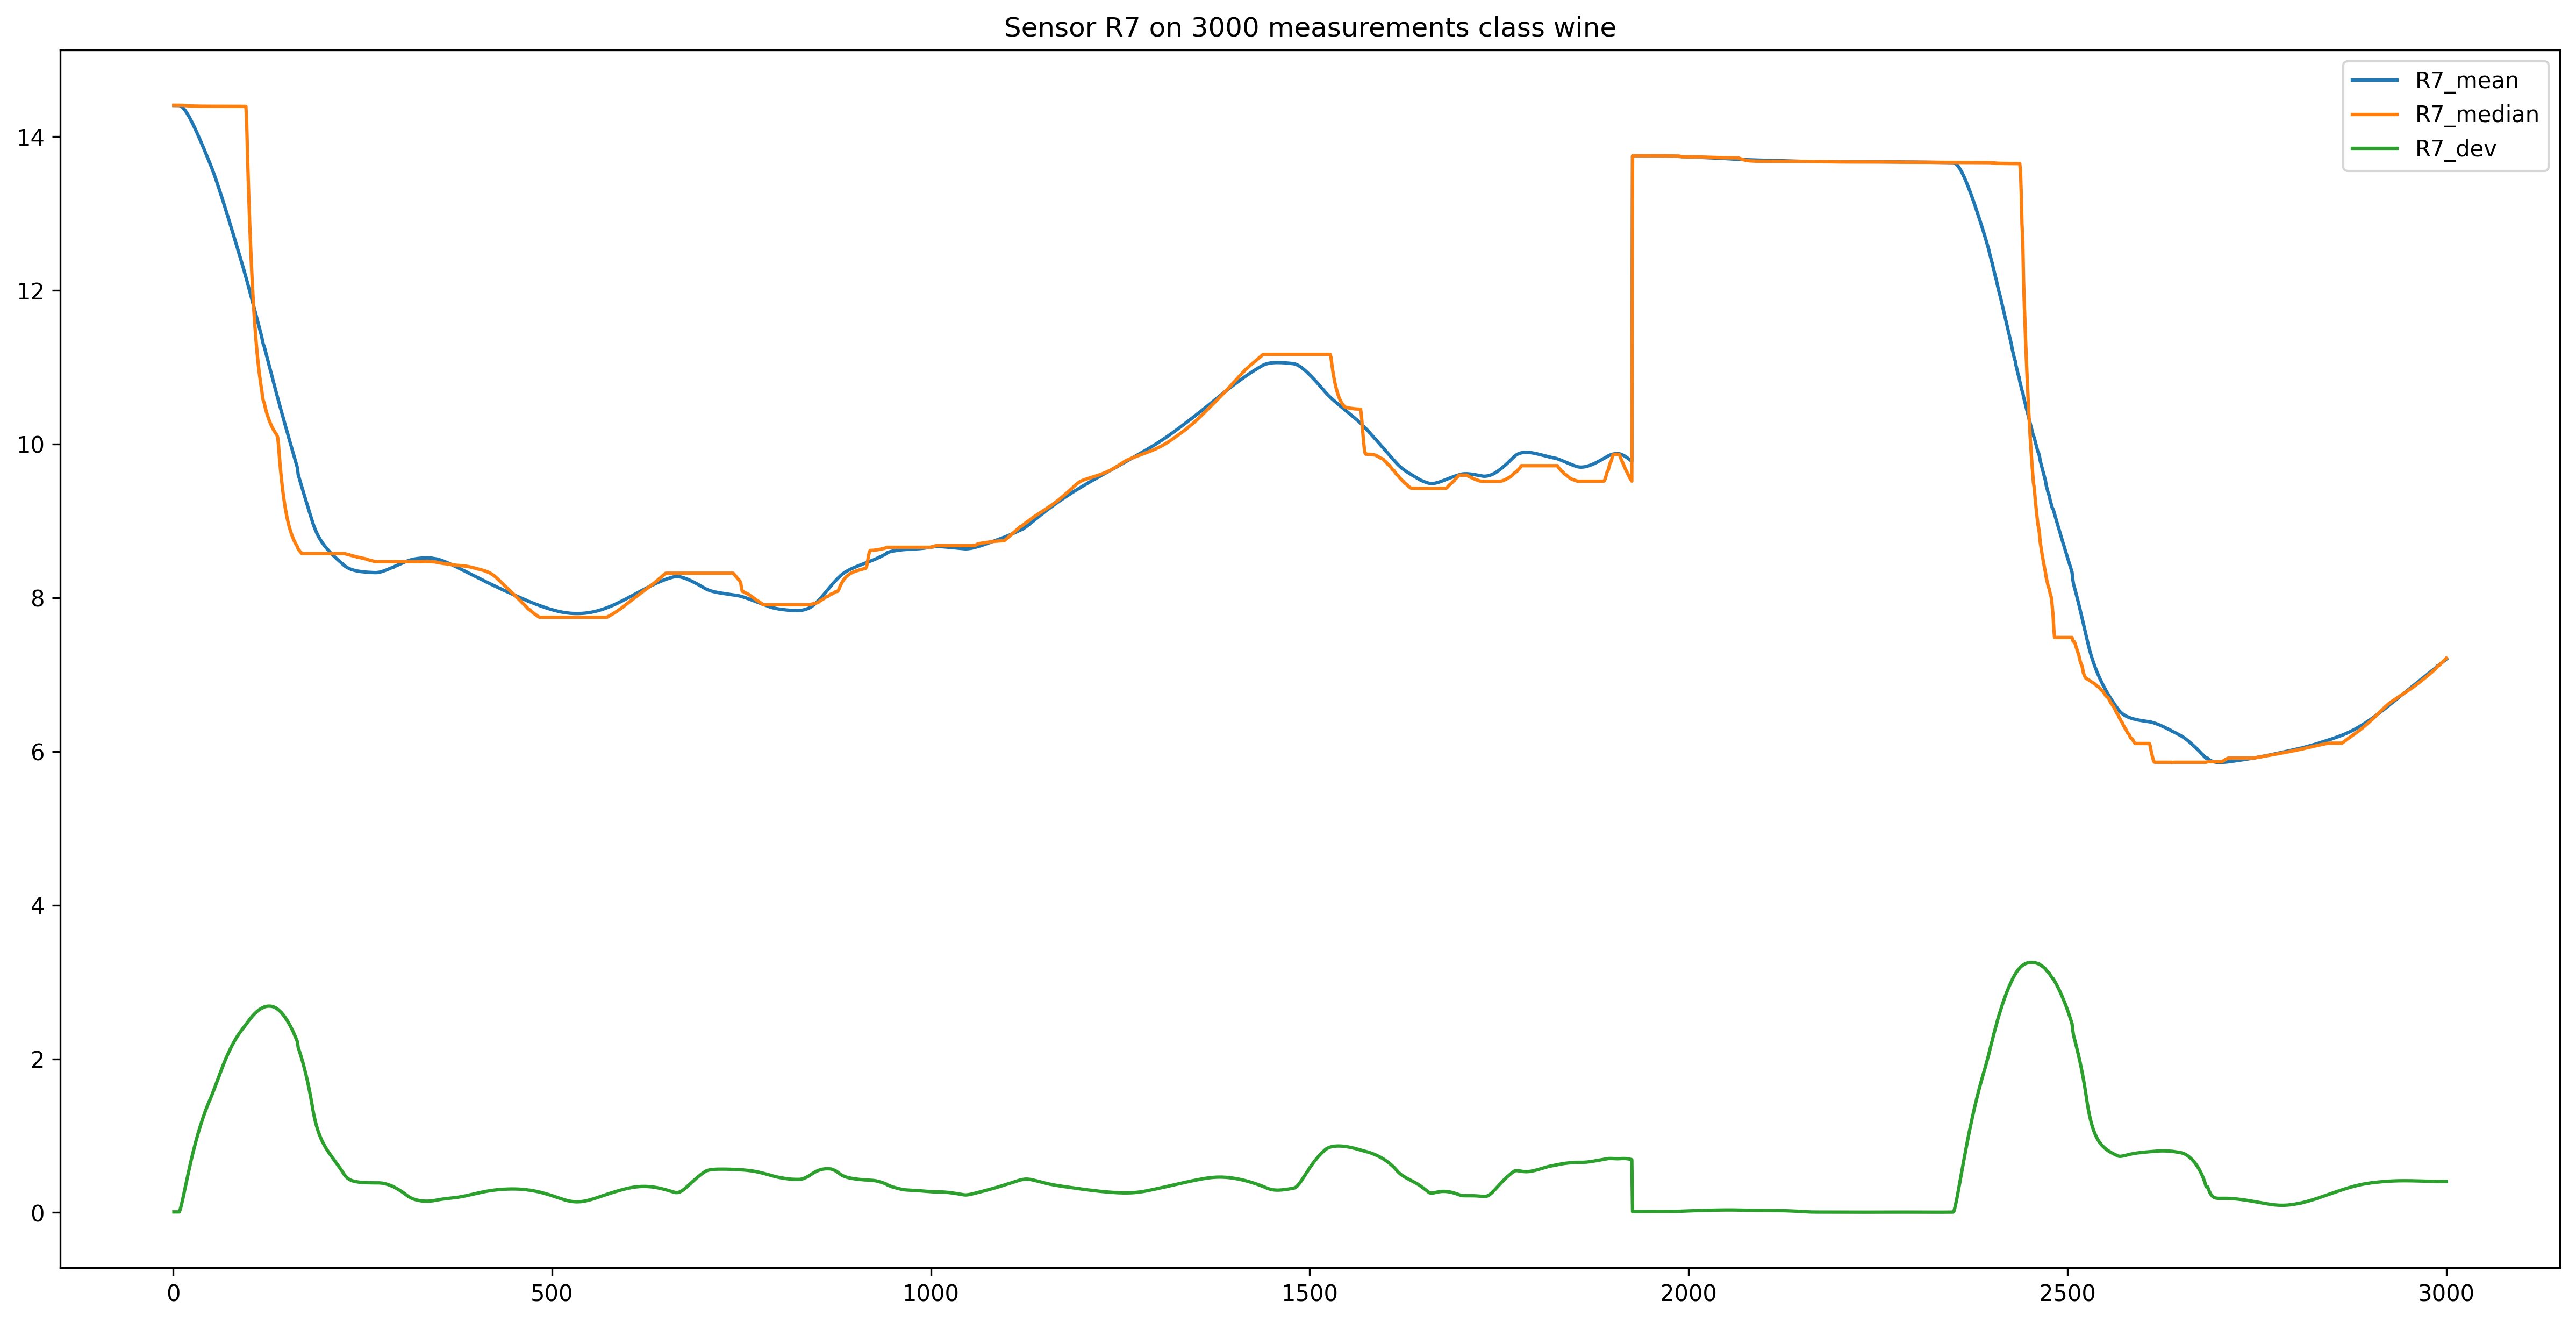

<Figure size 6000x3000 with 0 Axes>

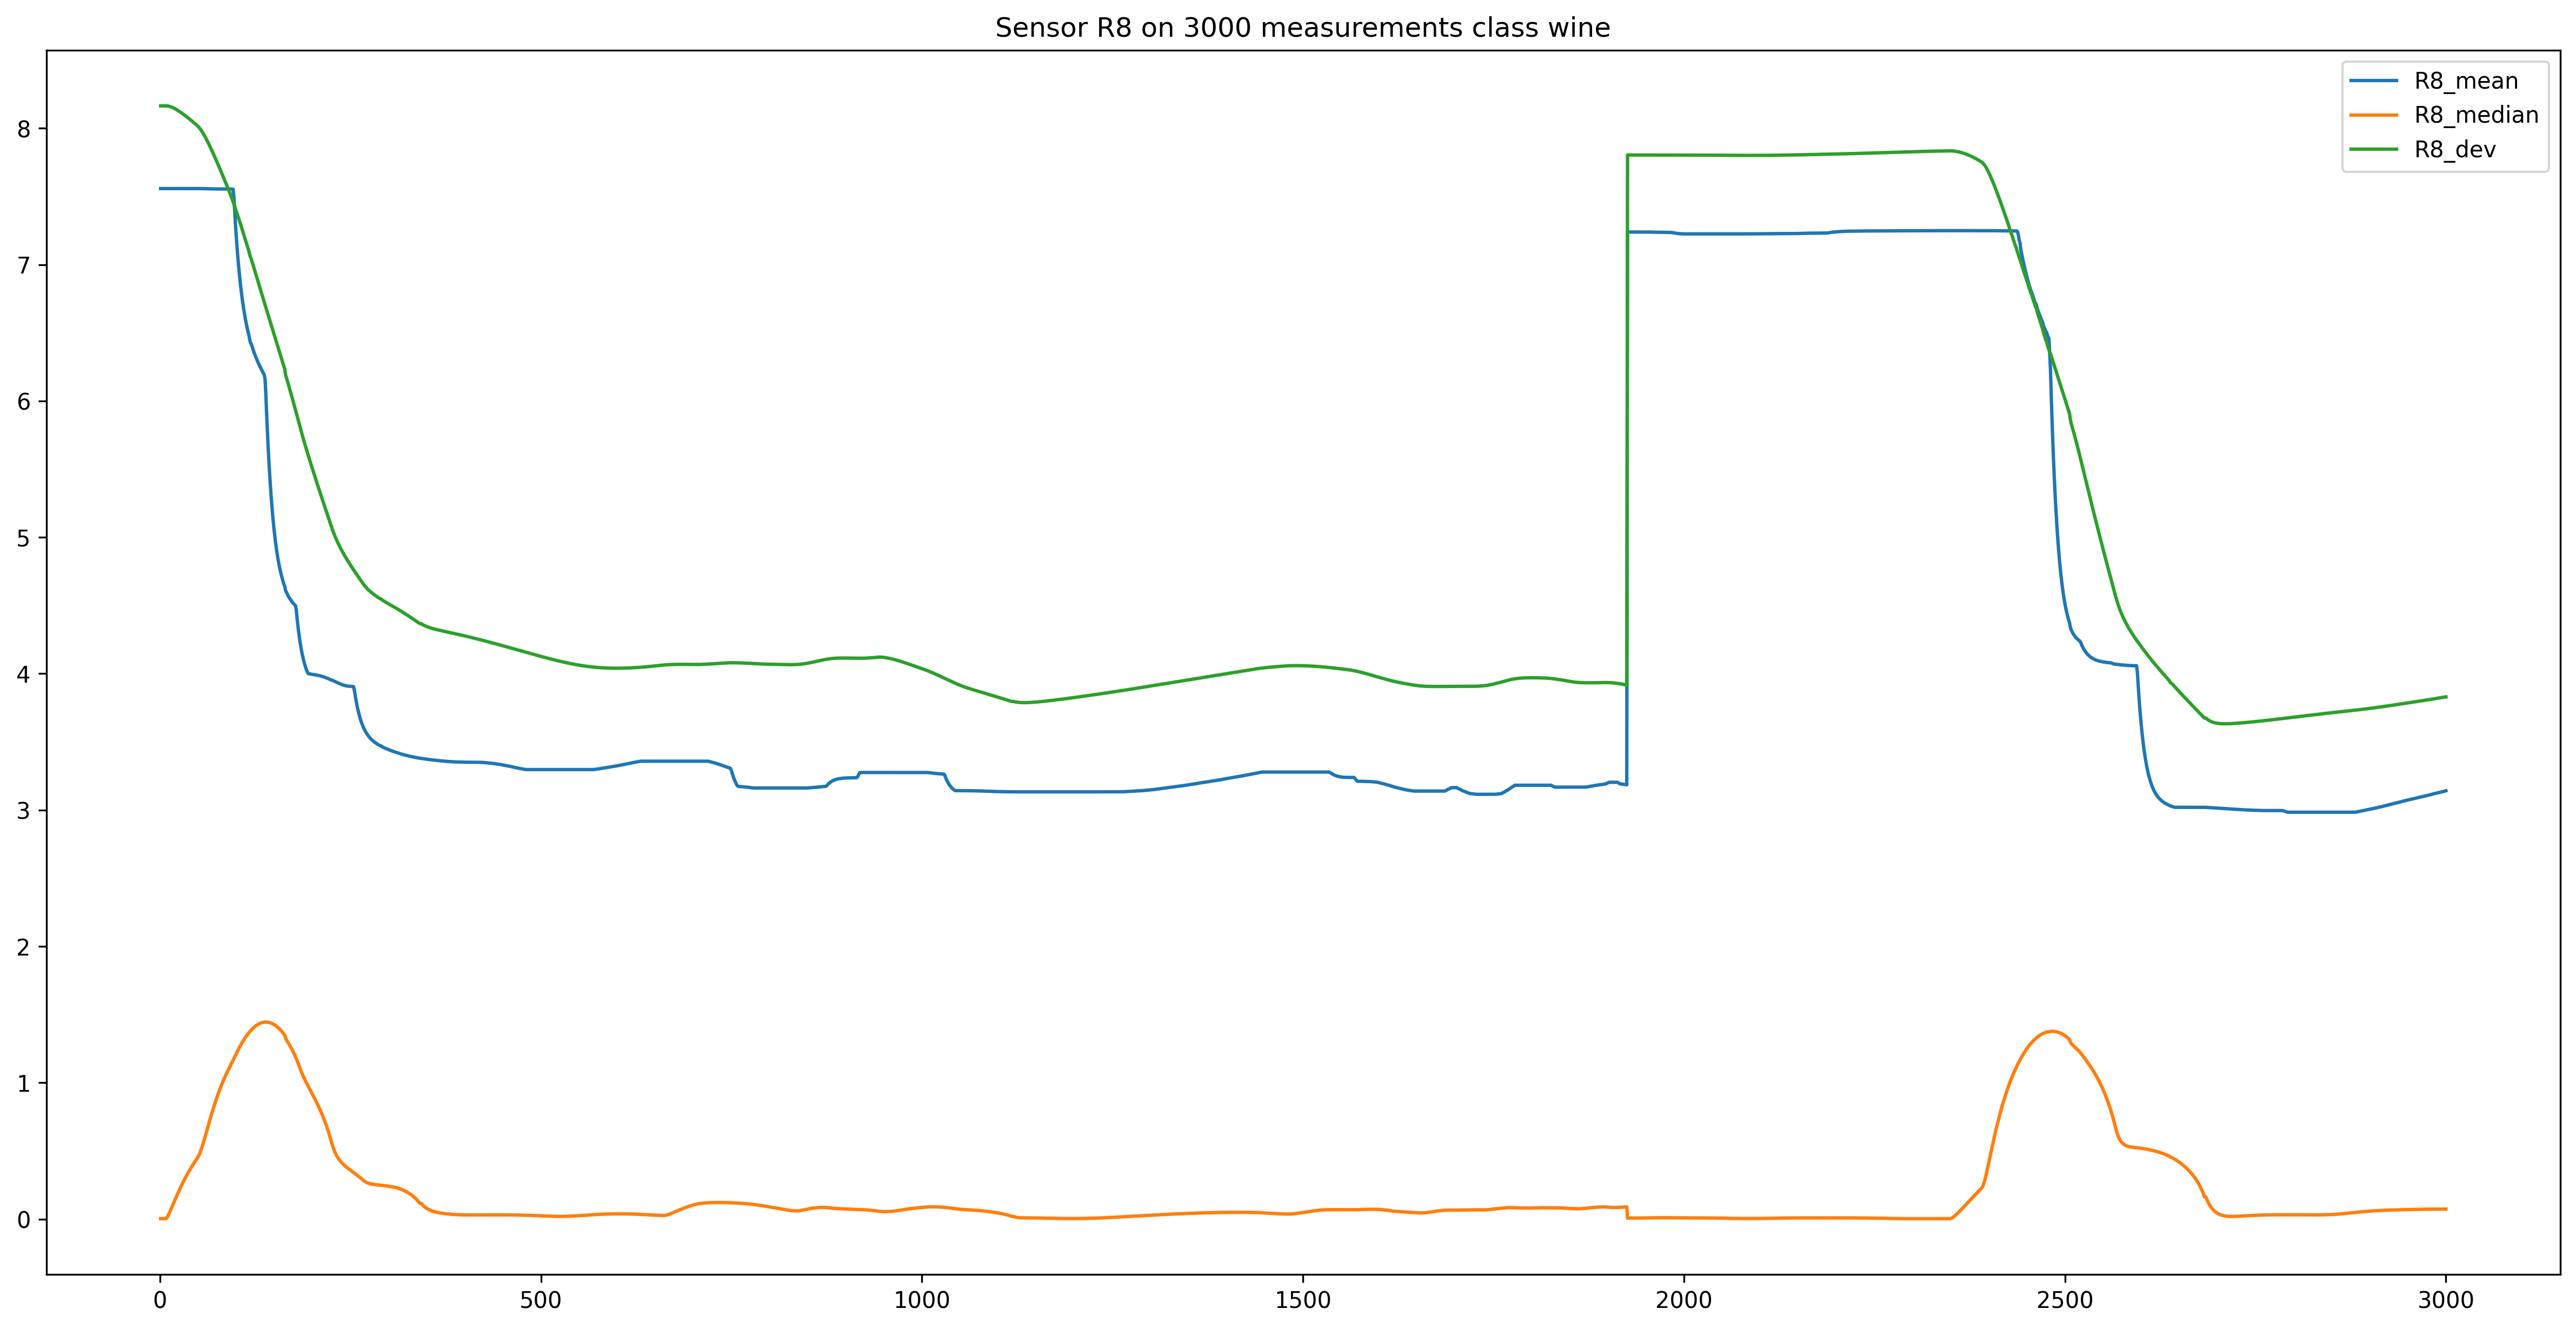

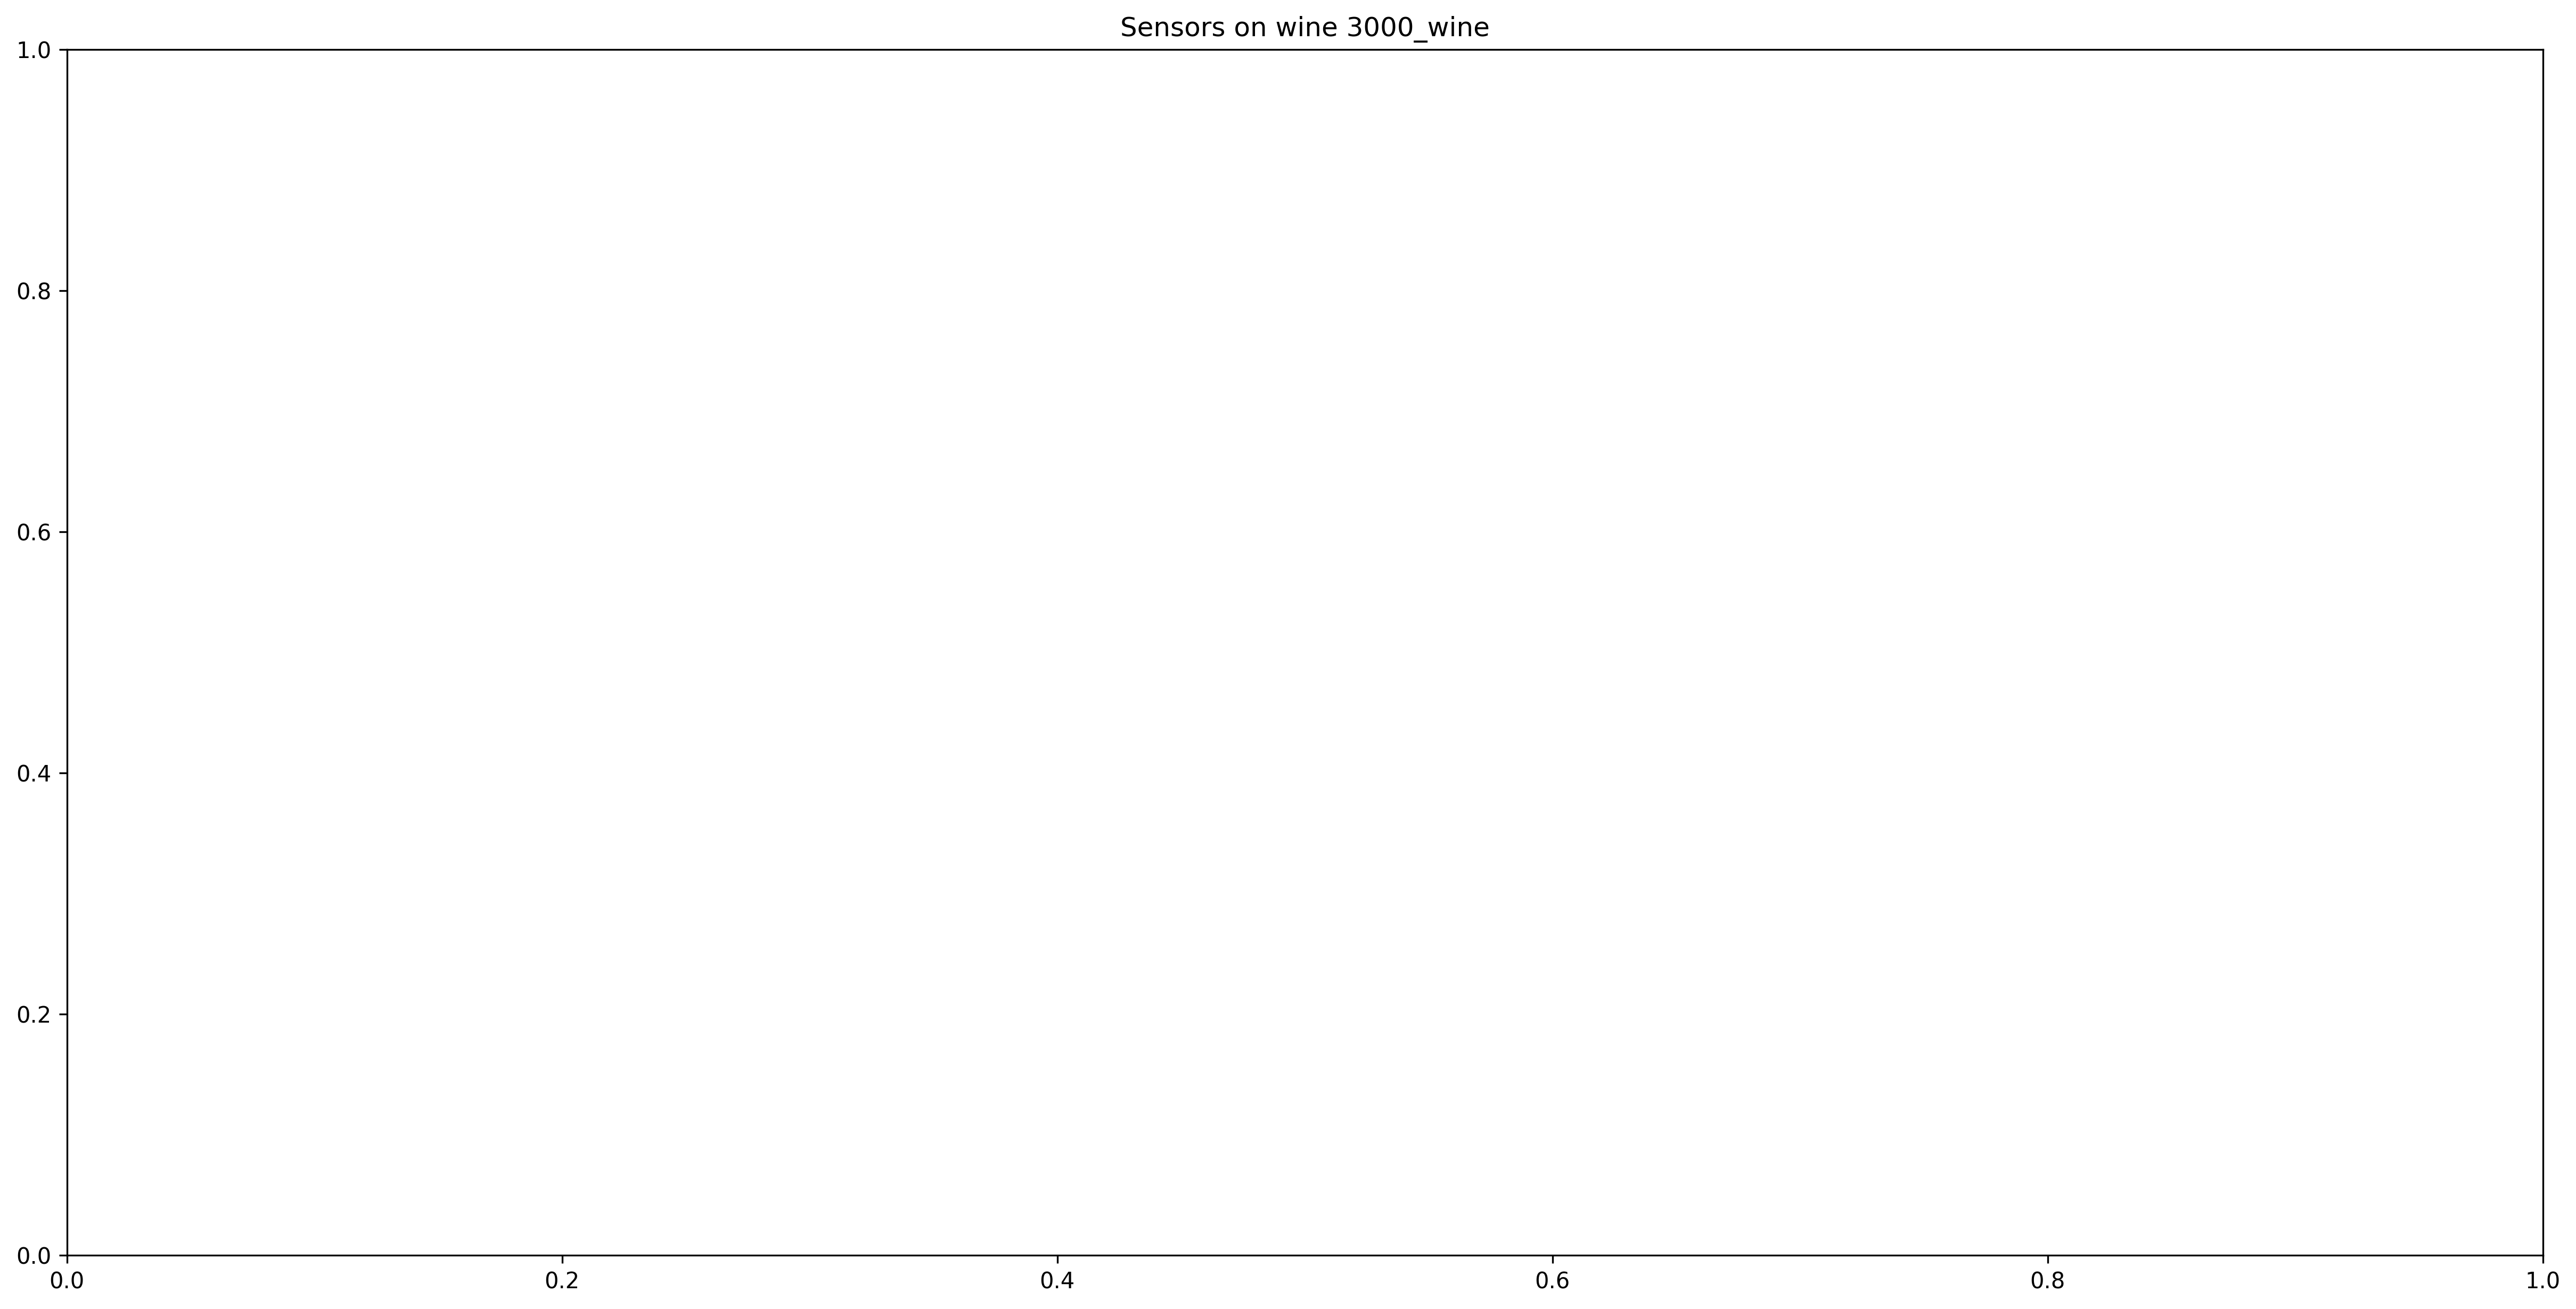

In [91]:
import os
class_column = df.iloc[:,-1] #obtenemos la columna de los valores
class_set = sorted(set(class_column)) #las hipótesis posibles
n_test = 3000
#plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 300
#obtengo el nombre y número de sesnores
sensors = [each for each in df.columns.values if len(each)<=2 and each[0]=="R"]
#obtengo las medidas obtenidas a cada sensor
medidas = [each[len(sensors[0]):] for each in df.columns if sensors[0] in each and each!=sensors[0]]

print(medidas)
print(sensors)
#si no existe la carpeta de imágenes la creo
if not os.path.exists("images"):
    os.makedirs("images")

for value in class_set: #para cada uno de ellos mostramos una gráfica
    #inicializamos las distintas x
    y=[]
    for i in range(len(sensors)):
        y.append([])
        for j in range(len(medidas)):
            y[i].append([])
    x = list(range(1, n_test+1))
    rows = df.loc[df["class"]==value][:n_test]
    #para cada una de las medidas de test
    #obtenemos los datos de cada sensor
    for index in range(n_test):
        #para cada uno de los sensores obtenemos los valores de sus medidas
        for i_s, sensor in enumerate(sensors):
            #para cada una de las medidas
            for i_m, medida in enumerate(medidas):
                aux = sensor+medida
                y[i_s][i_m].append(rows.iloc[index][aux])
    figure, axis = plt.subplots(len(sensors), len(medidas))
    for i_s, sensor in enumerate(sensors):
        for i_m, medida in enumerate(medidas):
            plt.figure(1)
            axis[i_s][i_m].plot(x, y[i_s][i_m], label=sensor+medida)
            axis[i_s][i_m].legend(loc='upper right')
            
            plt.figure(2)
            plt.plot(x, y[i_s][i_m], label=sensor+medida)
            plt.title("Sensor "  + sensor + " on " + str(n_test) + " measurements class " + value)
            plt.legend()
        #si no existe la carpeta de imágenes para ese valor, lo creo
        if not os.path.exists("images/" + value):
            os.makedirs("images/" + value)


        #plt.savefig('images/' + value + "/" + sensor + "_" + str(n_test) + ".jpg")
    
    plt.title("Sensors on " + value + " " + str(n_test) +"_"+ value)
    #plt.savefig('images/' + value + "/sensors_" + str(n_test) +"_"+ value + ".jpg")
    
    plt.show()
    
